# Phase 3: DEPLOYMENT AND MONITORING - GROUP ASSESSMENT

**Course:** COMP8430 – Advanced Computer Vision and Action  
**Assessment:** Group Major Project – Phase 3


**Group 3 Members:**

| Student Name                  | Student ID |
|------------------------------|------------|
| Phuong Thao (Jasmine) Huynh  | 46248722   |
| Prakhar Mishra               | 48081906   |
| Taha Naveed Shibli           | 47892641   |
| Gary Tze Hay Lau             | 45245673   |

---

## Table of Contents

1. Introduction  

2. Overview of Full Dataset from Group Members  
    2.1 Dataset Composition (Merged from All Members – All Classes)  
    2.2 Preprocessing Steps Applied  
    2.3 Splitting the Merged Dataset into Training and Validation
   
3. Robot Dataset Capture and Preparation  
    3.1 Selection of 3 Target Classes and Image Capture Process  
    3.2 Visualization of Raw Robot-Captured Images  
    3.3 Preprocessing of Robot-Captured Dataset  
    3.4 Splitting Robot-Captured Dataset into Fine-Tuning and Test Sets  

4. Stage 1 – Fine-Tune on Merged Dataset (All Classes)  
    4.1 Fine-Tuning and Saving on Merged Dataset (All Classes)  
    4.2 Evaluation on Robot Test Set (3 Selected Classes Only) , Visualizations, Metrics and Comments on Results  

5. Stage 2 – Fine-Tune on Robot Dataset (3 Selected Classes Only)  
    5.0 Preparing the finetuning dataset   
    5.1 Fine-Tuning and Saving on Robot Fine-Tuning Set (3 Selected Classes Only)  
    5.2 Evaluation on Robot Test Set (Same 3 Selected Classes), Visualizations, Metrics and Comments on Results    

6. Summary of Observations and Future Directions
---


## **1. Introduction**

This Jupyter Notebook presents the code implementation for **Phase 3: Deployment and Monitoring** of our group project for the unit. Phase 3 focuses on deploying and testing our fine-grained image classification system in a real-world robotics setting. The goal is to capture new images using the robot’s onboard camera, fine-tune our classifier for the three selected classes, and enable the robot to recognize objects and respond accordingly.

In this notebook, we include:
- The code for fine-tuning our classifier on both the merged dataset (from Phase 2) and the new robot-captured dataset.
- Code for performing visualizations and generating evaluation metrics.
- Short, explanatory comments within the code to clarify key implementation details.

Please note that **the rationale behind our design decisions, detailed analysis of results, and critical evaluations are presented in the separate written report**, as per the assignment guidelines. This notebook serves as the supporting code documentation for our project.

Additionally:
- The Python files named **`a.py`** and **`b.py`** (submitted separately) contain the code for robot-specific tasks:
  - **`robot_image_capture.py`**: Code for capturing images from the robot’s camera.
  - **`robot_action_inference.py`**: Code for deploying the classifier to the robot and defining the actions it performs based on object recognition.

Together, this work demonstrates our practical engagement with deploying AI systems in real-world scenarios, adapting models to new hardware, and enabling autonomous robotic behavior based on image classification.

In [ ]:
# Import all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
from google.colab import drive
import shutil
from PIL import Image, ImageOps, ImageFile
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings
from sklearn.model_selection import train_test_split
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
from sklearn.metrics import classification_report, confusion_matrix
import copy
from torchvision.transforms import v2
from torch.nn import functional as F

## **2. Overview of Full Dataset from Group Members**

In this section, we outline the process of combining, visualizing, and preparing the full dataset collected by all group members across the previous phases. Each member of our group initially collected their own dataset individually, resulting in a diverse collection of images across different hardware, lighting conditions, and file formats. To proceed with fine-tuning and deployment in Phase 3, we merged these individual datasets into a single, unified dataset representing all available classes.

The following subsections detail the key steps we undertook:
- **Section 2.1** describes how we combined the datasets, providing an overview of the total image count, class breakdown, and individual contributions from each group member, alongside visualizations of the class distribution.
- **Section 2.2** outlines the standard preprocessing steps applied to ensure consistency and model readiness, such as resizing, normalization, label harmonization, and renaming where necessary.
- **Section 2.3** explains how we performed an 80/20 stratified split of the merged dataset into training and validation sets, ensuring fair representation across all classes. We also clarify the exclusion of a test set at this stage, as new images captured from the robot will be used for testing.

This merged and preprocessed dataset serves as the foundation for subsequent fine-tuning, evaluation, and deployment tasks.


### **2.1 Dataset Composition (Merged from All Members – All Classes):**

In this section, we describe the process of merging individual datasets collected by each group member into a single, unified dataset for Phase 3. During previous phases, each member (Gary, Jasmine, Prakhar, and Taha) independently collected images of various fruit categories using different devices and settings. The merging process harmonizes these diverse datasets into a consolidated resource for subsequent fine-tuning, evaluation, and deployment tasks.

To achieve this, we:
- Mounted Google Drive and defined structured paths for each member's dataset.
- Systematically merged the datasets by iterating through 21 fruit categories, accommodating variations in folder naming conventions (e.g., "Grape - Autumn Royal" vs. "Grapes - Autumn Royal") to ensure accurate inclusion.
- Copied images into a new `Full_Dataset` directory, prefixing each filename with the contributor’s name for clear attribution and analysis.
- Recorded detailed metadata, including:
  - **Total number of images** across all datasets.
  - **Class-level distributions** showing the number of images per fruit variety.
  - **Member-level contributions** indicating the relative number of images provided by each team member.
  - **File format distribution** (e.g., `.jpg`, `.png`, `.jpeg`) to ensure consistency across the dataset.

This merged dataset forms the foundation for subsequent stages of the project. We also generated comprehensive visualizations—including bar plots, pie charts, and heatmaps—to clearly illustrate the dataset’s structure, class distributions, and team contributions. These figures are saved in the `Images_For_Report` folder for inclusion in the report.

The following figures in the report support this analysis:
- **Figure 1:** Number of images per fruit category.
- **Figure 2:** Distribution of images by fruit type.
- **Figure 4:** Image contributions by team member.
- **Figure 6:** File format distribution.
- **Figure 7:** Heatmap of member contributions per category.

This analysis ensures transparency, reproducibility, and a shared understanding of the dataset’s structure for all subsequent fine-tuning and deployment activities.




Mounted at /content/drive
Full_Dataset exists with 21 categories.
Do you want to use the existing merged dataset? (y/n): y

2.1 DATASET COMPOSITION - MERGED FROM ALL MEMBERS
Found 21 fruit categories


Analyzing categories:   0%|          | 0/21 [00:00<?, ?it/s]


Total number of images: 2014

Images per category:
  Apple - Fuji: 83 images (4.1%)
  Apple - Granny Smith: 97 images (4.8%)
  Apple - Jazz: 83 images (4.1%)
  Apple - Kanzi: 83 images (4.1%)
  Apple - Modi: 102 images (5.1%)
  Apple - Pink Lady: 81 images (4.0%)
  Apple - Royal Gala: 115 images (5.7%)
  Apple - Snapdragon: 91 images (4.5%)
  Banana - Cavendish: 92 images (4.6%)
  Banana - Ladyfinger: 83 images (4.1%)
  Grape - Autumn Royal: 117 images (5.8%)
  Grape - Cotton Candy: 79 images (3.9%)
  Grape - Crimson Seedless: 131 images (6.5%)
  Grape - Sweet Globe: 114 images (5.7%)
  Grape - Thompson Seedless: 115 images (5.7%)
  Orange - Navel: 111 images (5.5%)
  Orange - Valencia: 85 images (4.2%)
  Pear - Beurre Bosc: 85 images (4.2%)
  Pear - Corella: 83 images (4.1%)
  Pear - Nashi: 107 images (5.3%)
  Pear - Red Angel: 77 images (3.8%)

Contributions by team member:
  Gary: 354 images (17.6%)
  Jasmine: 970 images (48.2%)
  Prakhar: 317 images (15.7%)
  Taha: 373 images (18.

<ipython-input-6-e57bae5eb43a>:413: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Category', y='Image Count', data=df, palette='viridis', ax=ax1)
<ipython-input-6-e57bae5eb43a>:414: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


Saved Figure 1 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure1_Images_Per_Category.png


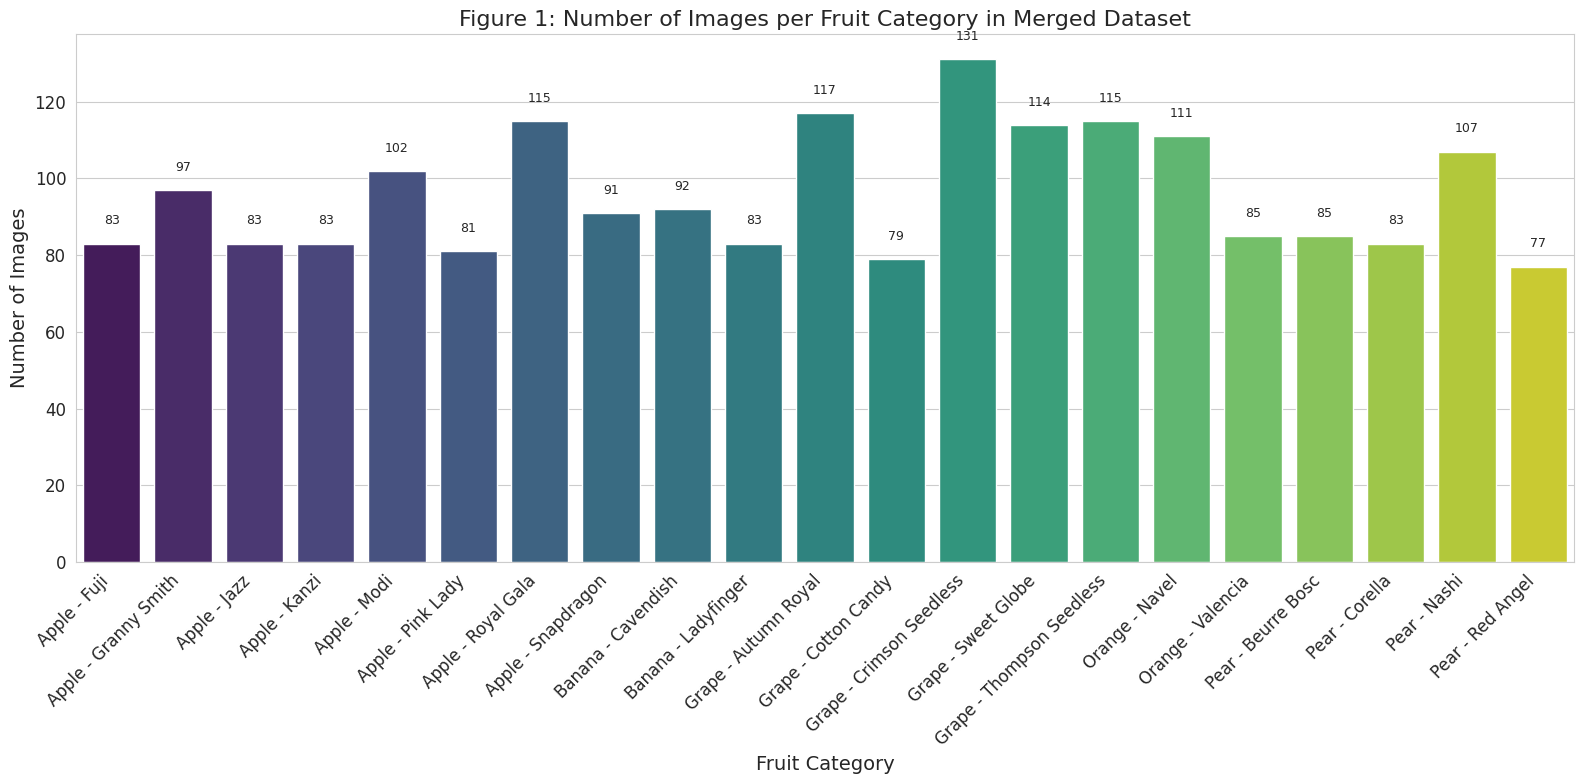

<ipython-input-6-e57bae5eb43a>:433: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Fruit Type', y='Image Count', data=fruit_type_df, palette='Set3', ax=ax2)


Saved Figure 2 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure2_Images_By_Fruit_Type.png


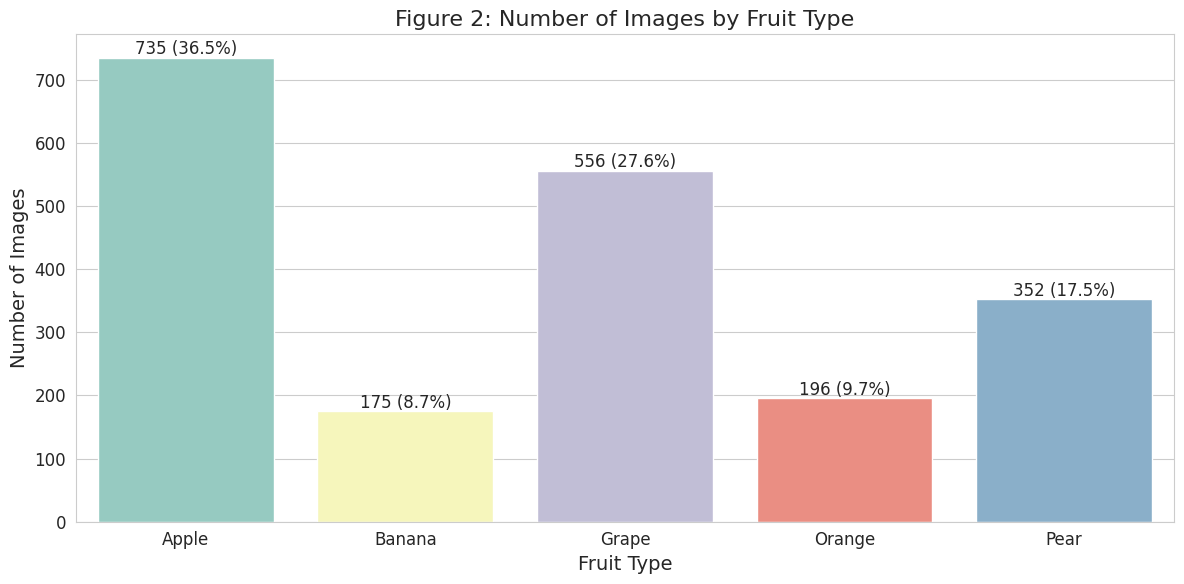

Saved Figure 3 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure3_Fruit_Type_Distribution.png


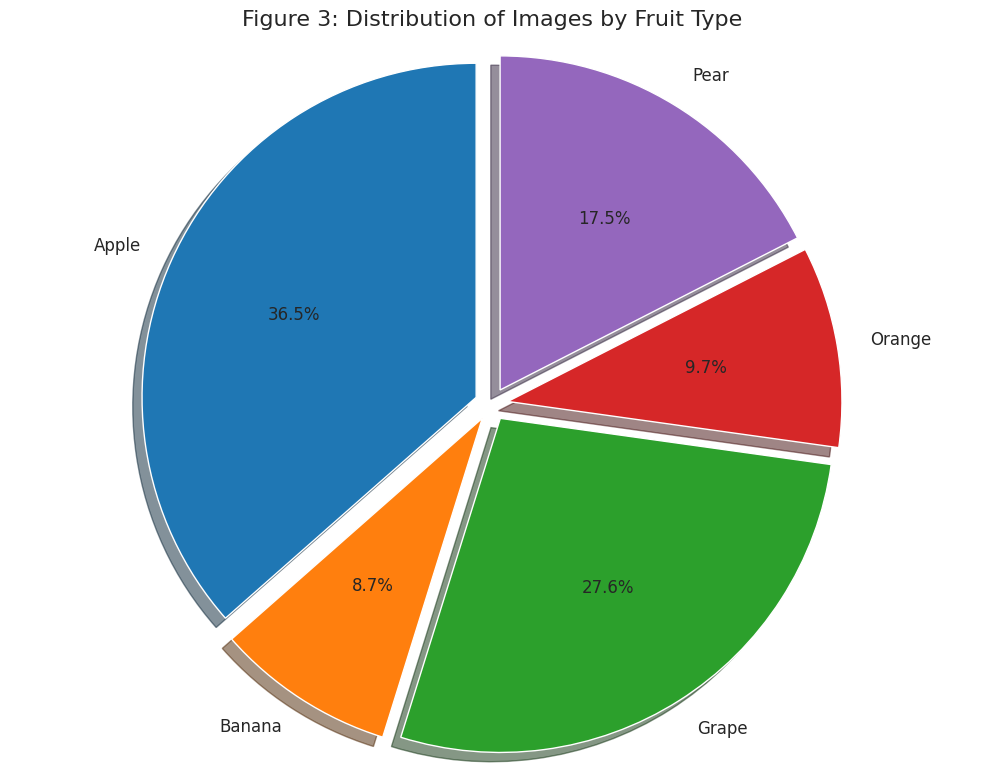

<ipython-input-6-e57bae5eb43a>:467: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Member', y='Images Contributed', data=member_df, palette='Set2', ax=ax4)


Saved Figure 4 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure4_Team_Member_Contributions.png


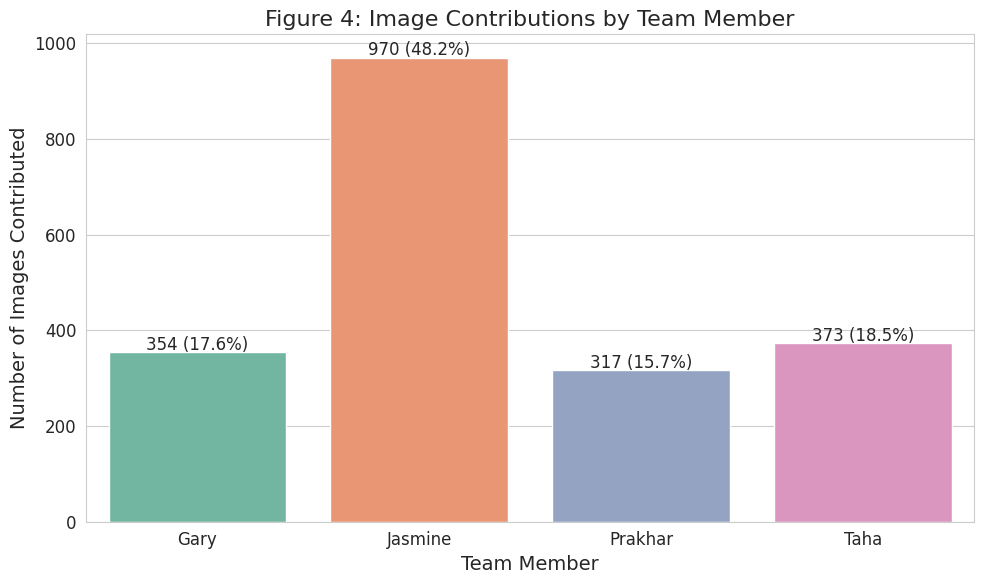

Saved Figure 5 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure5_Member_Distribution.png


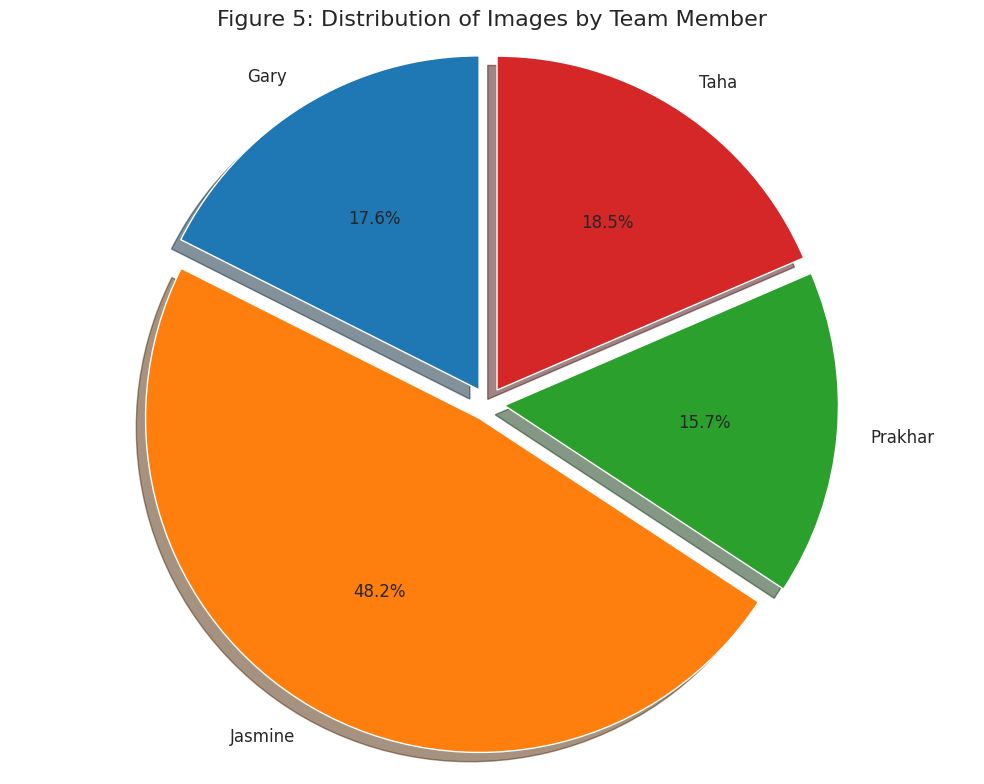

<ipython-input-6-e57bae5eb43a>:501: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Format', y='Count', data=format_df, palette='Set1', ax=ax6)


Saved Figure 6 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure6_File_Format_Distribution.png


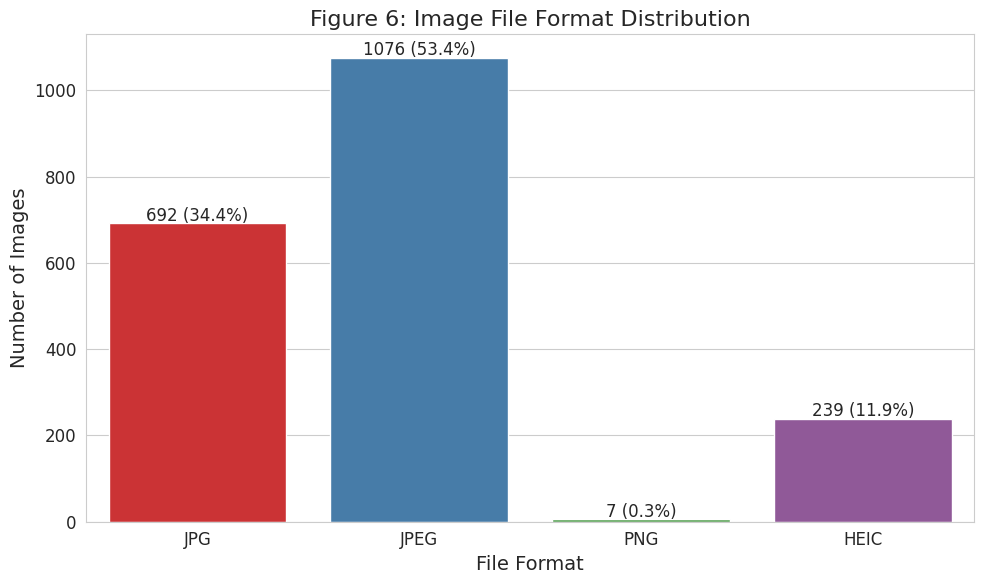

Saved Figure 7 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure7_Member_Category_Heatmap.png


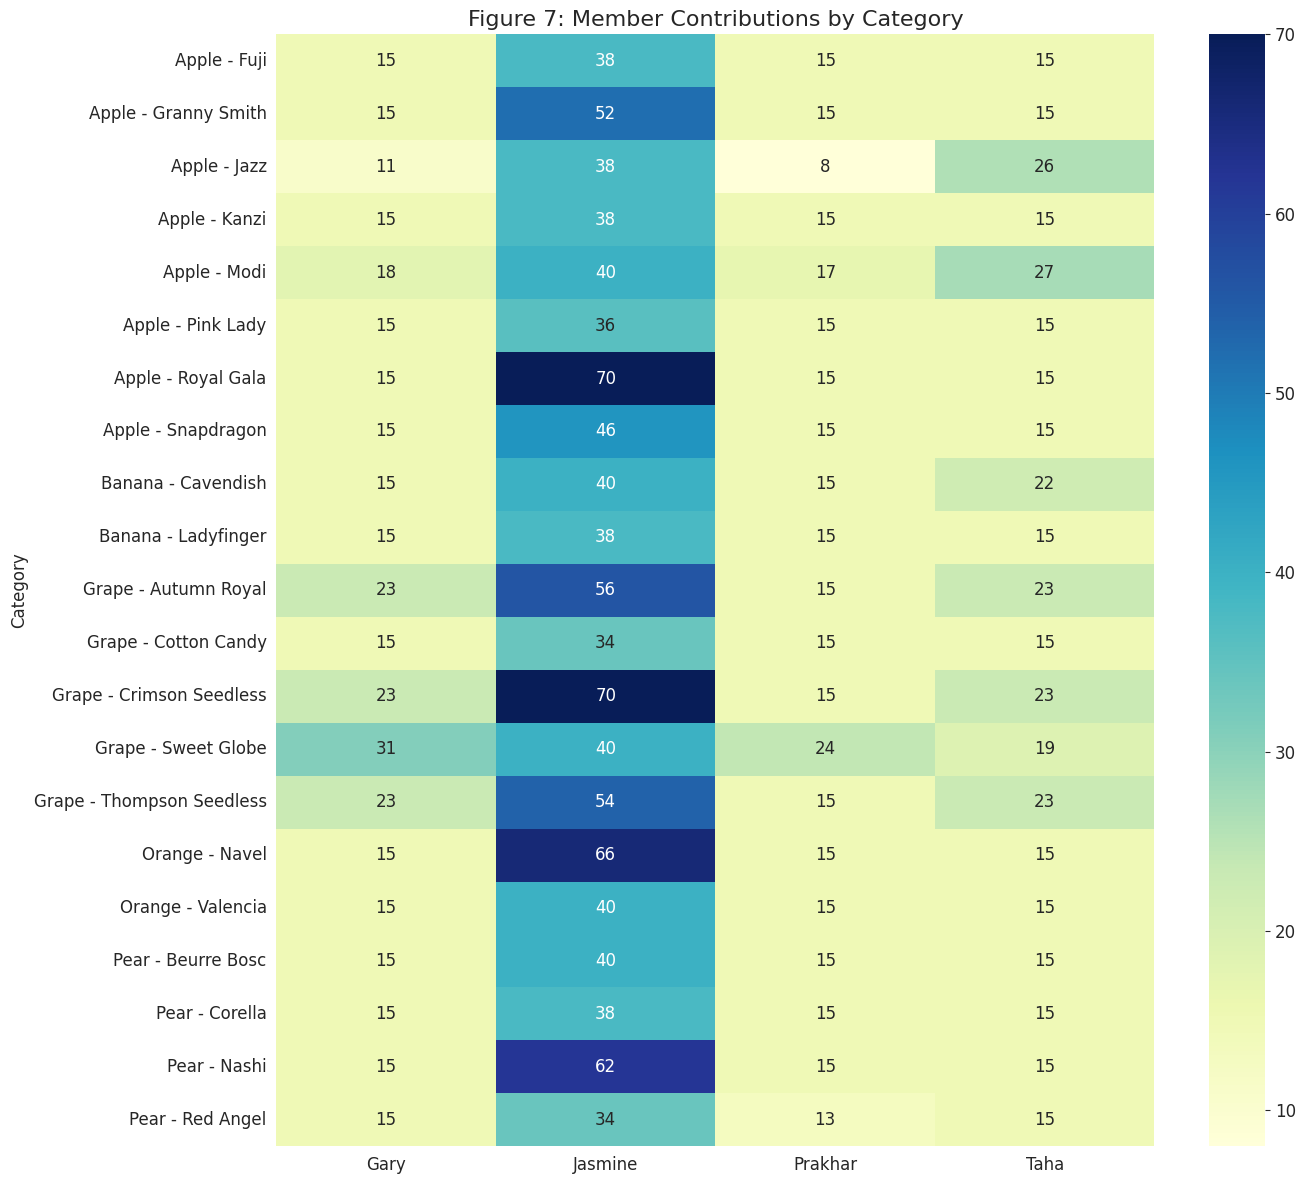

<ipython-input-6-e57bae5eb43a>:551: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Fruit Type', y='Number of Varieties', data=varieties_per_type, palette='pastel', ax=ax8)


Saved Figure 8 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure8_Varieties_Per_Fruit_Type.png


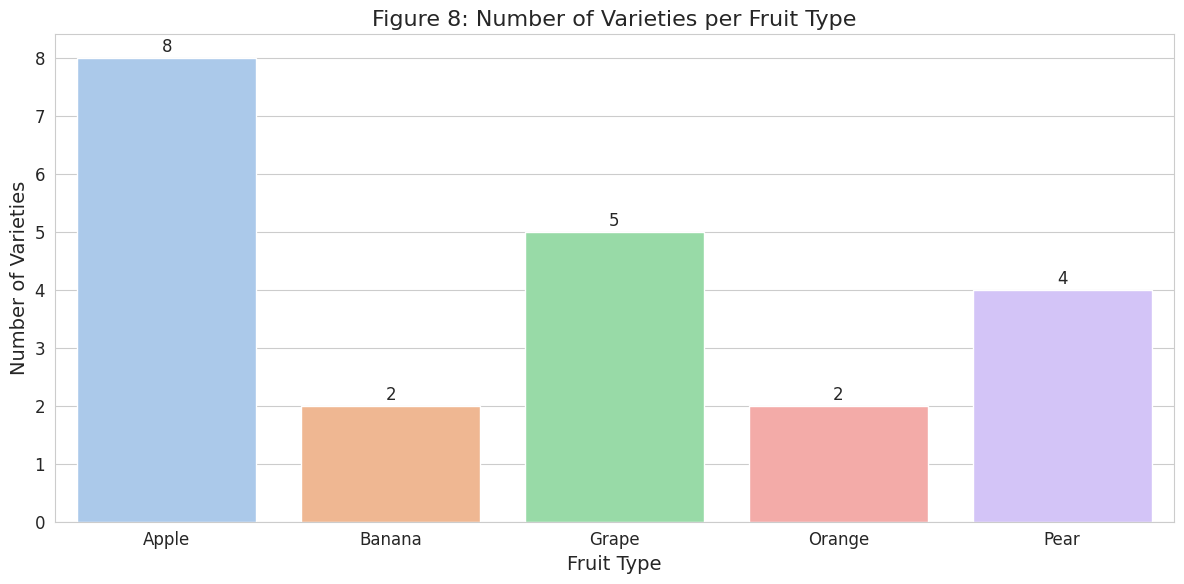


All figures have been saved to: /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report
Use these images in your report.

Summary report saved to: /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Dataset_Analysis_Summary.txt


In [ ]:
 # Mount Google Drive
drive.mount('/content/drive', force_remount=False)

# Define paths
PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"

# Define the individual dataset paths
INDIVIDUAL_DATASETS = {
    'gary': os.path.join(PHASE_FOLDER, "gary_fruits_dataset"),
    'jasmine': os.path.join(PHASE_FOLDER, "jasmine_fruits_dataset"),
    'prakhar': os.path.join(PHASE_FOLDER, "prakhar_fruits_dataset"),
    'taha': os.path.join(PHASE_FOLDER, "taha_fruits_dataset")
}

# Path to the merged dataset
FULL_DATASET_PATH = os.path.join(PHASE_FOLDER, "Full_Dataset")

# Path to save visualizations for the report
REPORT_IMAGES_PATH = os.path.join(PHASE_FOLDER, "Images_For_Report")

# Define fruit categories
FRUIT_CATEGORIES = [
    "Apple - Fuji",
    "Apple - Granny Smith",
    "Apple - Jazz",
    "Apple - Kanzi",
    "Apple - Modi",
    "Apple - Pink Lady",
    "Apple - Royal Gala",
    "Apple - Snapdragon",
    "Banana - Cavendish",
    "Banana - Ladyfinger",
    "Grape - Autumn Royal",
    "Grape - Cotton Candy",
    "Grape - Sweet Globe",
    "Grape - Crimson Seedless",
    "Grape - Thompson Seedless",
    "Orange - Valencia",
    "Orange - Navel",
    "Pear - Beurre Bosc",
    "Pear - Nashi",
    "Pear - Corella",
    "Pear - Red Angel"
]

# Handle potential variations in folder names
CATEGORY_VARIATIONS = {
    "Grape - Autumn Royal": ["Grape - Autumn Royal", "Grapes - Autumn Royal"],
    "Grape - Crimson Seedless": ["Grape - Crimson Seedless", "Grapes - Crimson Seedless"],
    "Grape - Thompson Seedless": ["Grape - Thompson Seedless", "Grapes - Thompson Seedless"]
}

def get_actual_category_path(base_path, category):
    """
    Handles variations in category folder names by checking for alternative names

    Args:
        base_path (str): Base path of the dataset
        category (str): The standard category name

    Returns:
        str: The actual path to the category folder, or None if not found
    """
    # Check direct match first
    direct_path = os.path.join(base_path, category)
    if os.path.exists(direct_path) and os.path.isdir(direct_path):
        return direct_path

    # Check variations if available
    if category in CATEGORY_VARIATIONS:
        for variation in CATEGORY_VARIATIONS[category]:
            var_path = os.path.join(base_path, variation)
            if os.path.exists(var_path) and os.path.isdir(var_path):
                return var_path

    # Not found
    return None

def merge_datasets():
    """
    Merges individual datasets from all team members into a combined dataset

    Returns:
        dict: Statistics about the merged dataset
    """
    print("\n" + "=" * 60)
    print("MERGING DATASETS FROM ALL TEAM MEMBERS")
    print("=" * 60)

    # Check if Full_Dataset already exists
    if os.path.exists(FULL_DATASET_PATH):
        # Check if it already has content
        categories_in_full = [d for d in os.listdir(FULL_DATASET_PATH)
                           if os.path.isdir(os.path.join(FULL_DATASET_PATH, d))]

        if categories_in_full:
            print(f"Full_Dataset already exists with {len(categories_in_full)} categories.")
            user_input = input("Do you want to clear and rebuild it? (y/n): ")
            if user_input.lower() != 'y':
                print("Skipping merge process.")
                return None

            print("Clearing existing Full_Dataset folder...")
            for item in os.listdir(FULL_DATASET_PATH):
                item_path = os.path.join(FULL_DATASET_PATH, item)
                if os.path.isdir(item_path):
                    shutil.rmtree(item_path)
                else:
                    os.remove(item_path)

    # Create Full_Dataset directory if it doesn't exist
    os.makedirs(FULL_DATASET_PATH, exist_ok=True)

    # Create directories for each fruit category
    for category in FRUIT_CATEGORIES:
        os.makedirs(os.path.join(FULL_DATASET_PATH, category), exist_ok=True)

    # Initialize statistics
    stats = {
        'total_images': 0,
        'by_category': {category: 0 for category in FRUIT_CATEGORIES},
        'by_member': {member: 0 for member in INDIVIDUAL_DATASETS.keys()},
        'by_format': {'jpg': 0, 'jpeg': 0, 'png': 0, 'heic': 0, 'other': 0}
    }

    # Process each member's dataset
    for member, dataset_path in INDIVIDUAL_DATASETS.items():
        if not os.path.exists(dataset_path):
            print(f"Warning: {member}'s dataset not found at {dataset_path}")
            continue

        print(f"\nProcessing {member}'s dataset at {dataset_path}...")

        # Process each fruit category
        for category in FRUIT_CATEGORIES:
            # Get the actual path considering variations in folder names
            category_path = get_actual_category_path(dataset_path, category)

            if not category_path:
                # Special case for prakhar's dataset (missing Orange - Navel)
                if member == 'prakhar' and category == 'Orange - Navel':
                    print(f"  Note: Skipping {category} for {member}'s dataset (known to be missing)")
                else:
                    print(f"  Warning: {category} not found in {member}'s dataset")
                continue

            # Get all image files, being more inclusive with extensions
            images = [f for f in os.listdir(category_path)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.heic'))]

            # Skip if no images found
            if not images:
                print(f"  No images found in {member}'s {category}")
                continue

            print(f"  Copying {len(images)} images from {category}")

            # Copy each image to the merged dataset with a prefixed filename
            for img in images:
                src_file = os.path.join(category_path, img)
                dst_file = os.path.join(FULL_DATASET_PATH, category, f"{member}_{img}")

                try:
                    shutil.copy2(src_file, dst_file)
                    stats['total_images'] += 1
                    stats['by_category'][category] += 1
                    stats['by_member'][member] += 1

                    # Count file formats
                    ext = os.path.splitext(img)[1].lower()
                    if ext == '.jpg':
                        stats['by_format']['jpg'] += 1
                    elif ext == '.jpeg':
                        stats['by_format']['jpeg'] += 1
                    elif ext == '.png':
                        stats['by_format']['png'] += 1
                    elif ext == '.heic':
                        stats['by_format']['heic'] += 1
                    else:
                        stats['by_format']['other'] += 1

                except Exception as e:
                    print(f"  Error copying {src_file}: {e}")

    # Print summary statistics
    print("\nMerge complete!")
    print(f"Total images in merged dataset: {stats['total_images']}")

    # Show member contributions
    print("\nContributions by team member:")
    for member, count in stats['by_member'].items():
        if count > 0:
            print(f"  {member.capitalize()}: {count} images ({count/stats['total_images']*100:.1f}%)")

    # Show file format distribution
    print("\nFile format distribution:")
    for format, count in stats['by_format'].items():
        if count > 0:
            print(f"  {format.upper()}: {count} images ({count/stats['total_images']*100:.1f}%)")

    # Show most and least populated categories
    print("\nMost populated categories:")
    sorted_categories = sorted(stats['by_category'].items(), key=lambda x: x[1], reverse=True)
    for category, count in sorted_categories[:5]:
        if count > 0:
            print(f"  {category}: {count} images ({count/stats['total_images']*100:.1f}%)")

    print("\nLeast populated categories:")
    for category, count in sorted_categories[-5:]:
        print(f"  {category}: {count} images ({count/stats['total_images']*100:.1f}%)")

    return stats

def analyze_dataset_composition():
    """
    Analyzes the composition of the merged dataset

    Returns:
        tuple: (categories, image_counts, total_images, member_stats, format_stats)
    """
    print("\n" + "=" * 60)
    print("2.1 DATASET COMPOSITION - MERGED FROM ALL MEMBERS")
    print("=" * 60)

    # Check if the merged dataset exists
    if not os.path.exists(FULL_DATASET_PATH):
        print(f"Error: Full dataset path {FULL_DATASET_PATH} does not exist")
        print("Please run the merge_datasets() function first")
        return [], [], 0, {}, {}

    # Get all categories in the dataset
    try:
        all_items = os.listdir(FULL_DATASET_PATH)
        categories = sorted([d for d in all_items
                           if os.path.isdir(os.path.join(FULL_DATASET_PATH, d))])
    except Exception as e:
        print(f"Error accessing dataset: {e}")
        return [], [], 0, {}, {}

    if not categories:
        print("No category folders found in the dataset")
        return [], [], 0, {}, {}

    print(f"Found {len(categories)} fruit categories")

    # Initialize counters
    image_counts = []
    total_images = 0

    # Initialize member contribution tracking
    member_stats = {
        'gary': {'total': 0, 'by_category': {}},
        'jasmine': {'total': 0, 'by_category': {}},
        'prakhar': {'total': 0, 'by_category': {}},
        'taha': {'total': 0, 'by_category': {}}
    }

    # Initialize category tracking for each member
    for member in member_stats:
        for category in categories:
            member_stats[member]['by_category'][category] = 0

    # Initialize file format tracking
    format_stats = {
        'jpg': 0,
        'jpeg': 0,
        'png': 0,
        'heic': 0,
        'other': 0
    }

    # Process each category
    for category in tqdm(categories, desc="Analyzing categories"):
        category_path = os.path.join(FULL_DATASET_PATH, category)

        # Get all image files in this category
        try:
            images = [f for f in os.listdir(category_path)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.heic'))]

            category_count = len(images)
            image_counts.append(category_count)
            total_images += category_count

            # Track file formats
            for img in images:
                ext = os.path.splitext(img)[1].lower()
                if ext == '.jpg':
                    format_stats['jpg'] += 1
                elif ext == '.jpeg':
                    format_stats['jpeg'] += 1
                elif ext == '.png':
                    format_stats['png'] += 1
                elif ext == '.heic':
                    format_stats['heic'] += 1
                else:
                    format_stats['other'] += 1

            # Analyze member contributions based on filename prefix
            for image in images:
                if image.startswith('gary_'):
                    member = 'gary'
                elif image.startswith('jasmine_'):
                    member = 'jasmine'
                elif image.startswith('prakhar_'):
                    member = 'prakhar'
                elif image.startswith('taha_'):
                    member = 'taha'
                else:
                    # If no matching prefix, check for member name in the filename
                    lower_img = image.lower()
                    if 'gary' in lower_img:
                        member = 'gary'
                    elif 'jasmine' in lower_img:
                        member = 'jasmine'
                    elif 'prakhar' in lower_img:
                        member = 'prakhar'
                    elif 'taha' in lower_img:
                        member = 'taha'
                    else:
                        # Skip files we can't attribute to a member
                        continue

                # Update member contribution stats
                member_stats[member]['total'] += 1
                member_stats[member]['by_category'][category] += 1

        except Exception as e:
            print(f"Error processing category {category}: {e}")
            image_counts.append(0)

    # Print summary
    print(f"\nTotal number of images: {total_images}")

    # Print category distribution
    print("\nImages per category:")
    for category, count in zip(categories, image_counts):
        if count > 0:
            print(f"  {category}: {count} images ({count/total_images*100:.1f}%)")

    # Print member contributions
    print("\nContributions by team member:")
    for member, stats in member_stats.items():
        if stats['total'] > 0:
            print(f"  {member.capitalize()}: {stats['total']} images ({stats['total']/total_images*100:.1f}%)")

    # Print file format distribution
    print("\nFile format distribution:")
    for format, count in format_stats.items():
        if count > 0:
            print(f"  {format.upper()}: {count} images ({count/total_images*100:.1f}%)")

    return categories, image_counts, total_images, member_stats, format_stats

def visualize_dataset_composition(categories, image_counts, total_images, member_stats, format_stats):
    """
    Creates visualizations for dataset composition and saves them to the report images folder

    Args:
        categories (list): List of category names
        image_counts (list): Number of images in each category
        total_images (int): Total number of images
        member_stats (dict): Contribution statistics by team member
        format_stats (dict): Statistics about file formats
    """
    if not categories or not image_counts or total_images == 0:
        print("No data to visualize")
        return

    # Create report images directory if it doesn't exist
    os.makedirs(REPORT_IMAGES_PATH, exist_ok=True)

    # Set a consistent style for all plots
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 12

    # Create DataFrame for category distribution
    df = pd.DataFrame({
        'Category': categories,
        'Image Count': image_counts,
        'Percentage': [count/total_images*100 for count in image_counts]
    })

    # Extract fruit type from category name
    df['Fruit Type'] = df['Category'].apply(lambda x: x.split(' - ')[0])
    fruit_type_df = df.groupby('Fruit Type').agg({'Image Count': 'sum'}).reset_index()

    # Prepare member data
    member_data = []
    for member, stats in member_stats.items():
        if stats['total'] > 0:
            member_data.append({
                'Member': member.capitalize(),
                'Images Contributed': stats['total'],
                'Percentage': stats['total']/total_images*100
            })
    member_df = pd.DataFrame(member_data)

    # Prepare format data
    format_data = []
    for format, count in format_stats.items():
        if count > 0:
            format_data.append({
                'Format': format.upper(),
                'Count': count,
                'Percentage': count/total_images*100
            })
    format_df = pd.DataFrame(format_data)

    # Figure 1: Images per Fruit Category
    fig1, ax1 = plt.subplots(figsize=(16, 8))
    bars = sns.barplot(x='Category', y='Image Count', data=df, palette='viridis', ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Add value labels on bars
    for i, v in enumerate(image_counts):
        ax1.text(i, v + 5, f"{v}", ha='center', fontsize=9)

    ax1.set_title('Figure 1: Number of Images per Fruit Category in Merged Dataset', fontsize=16)
    ax1.set_xlabel('Fruit Category', fontsize=14)
    ax1.set_ylabel('Number of Images', fontsize=14)
    plt.tight_layout()

    # Save figure 1
    fig1_path = os.path.join(REPORT_IMAGES_PATH, "Figure1_Images_Per_Category.png")
    plt.savefig(fig1_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 1 to {fig1_path}")
    plt.show()

    # Figure 2: Number of Images by Fruit Type
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    bars = sns.barplot(x='Fruit Type', y='Image Count', data=fruit_type_df, palette='Set3', ax=ax2)

    # Add value labels
    for i, v in enumerate(fruit_type_df['Image Count']):
        ax2.text(i, v + 5, f"{v} ({v/total_images*100:.1f}%)", ha='center')

    ax2.set_title('Figure 2: Number of Images by Fruit Type', fontsize=16)
    ax2.set_xlabel('Fruit Type', fontsize=14)
    ax2.set_ylabel('Number of Images', fontsize=14)
    plt.tight_layout()

    # Save figure 2
    fig2_path = os.path.join(REPORT_IMAGES_PATH, "Figure2_Images_By_Fruit_Type.png")
    plt.savefig(fig2_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 2 to {fig2_path}")
    plt.show()

    # Figure 3: Pie Chart of Fruit Type Distribution
    fig3, ax3 = plt.subplots(figsize=(10, 8))
    ax3.pie(fruit_type_df['Image Count'], labels=fruit_type_df['Fruit Type'],
           autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.05]*len(fruit_type_df))
    ax3.set_title('Figure 3: Distribution of Images by Fruit Type', fontsize=16)
    plt.axis('equal')
    plt.tight_layout()

    # Save figure 3
    fig3_path = os.path.join(REPORT_IMAGES_PATH, "Figure3_Fruit_Type_Distribution.png")
    plt.savefig(fig3_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 3 to {fig3_path}")
    plt.show()

    # Figure 4: Team Member Contributions
    if not member_df.empty:
        fig4, ax4 = plt.subplots(figsize=(10, 6))
        bars = sns.barplot(x='Member', y='Images Contributed', data=member_df, palette='Set2', ax=ax4)

        # Add value labels
        for i, v in enumerate(member_df['Images Contributed']):
            ax4.text(i, v + 5, f"{v} ({v/total_images*100:.1f}%)", ha='center')

        ax4.set_title('Figure 4: Image Contributions by Team Member', fontsize=16)
        ax4.set_xlabel('Team Member', fontsize=14)
        ax4.set_ylabel('Number of Images Contributed', fontsize=14)
        plt.tight_layout()

        # Save figure 4
        fig4_path = os.path.join(REPORT_IMAGES_PATH, "Figure4_Team_Member_Contributions.png")
        plt.savefig(fig4_path, dpi=300, bbox_inches='tight')
        print(f"Saved Figure 4 to {fig4_path}")
        plt.show()

        # Figure 5: Pie Chart of Member Contributions
        fig5, ax5 = plt.subplots(figsize=(10, 8))
        ax5.pie(member_df['Images Contributed'], labels=member_df['Member'],
               autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.05]*len(member_df))
        ax5.set_title('Figure 5: Distribution of Images by Team Member', fontsize=16)
        plt.axis('equal')
        plt.tight_layout()

        # Save figure 5
        fig5_path = os.path.join(REPORT_IMAGES_PATH, "Figure5_Member_Distribution.png")
        plt.savefig(fig5_path, dpi=300, bbox_inches='tight')
        print(f"Saved Figure 5 to {fig5_path}")
        plt.show()

    # Figure 6: File Format Distribution
    if not format_df.empty:
        fig6, ax6 = plt.subplots(figsize=(10, 6))
        bars = sns.barplot(x='Format', y='Count', data=format_df, palette='Set1', ax=ax6)

        # Add value labels
        for i, v in enumerate(format_df['Count']):
            ax6.text(i, v + 5, f"{v} ({v/total_images*100:.1f}%)", ha='center')

        ax6.set_title('Figure 6: Image File Format Distribution', fontsize=16)
        ax6.set_xlabel('File Format', fontsize=14)
        ax6.set_ylabel('Number of Images', fontsize=14)
        plt.tight_layout()

        # Save figure 6
        fig6_path = os.path.join(REPORT_IMAGES_PATH, "Figure6_File_Format_Distribution.png")
        plt.savefig(fig6_path, dpi=300, bbox_inches='tight')
        print(f"Saved Figure 6 to {fig6_path}")
        plt.show()

    # Figure 7: Heatmap of Member Contributions by Category
    # Create contribution matrix
    contribution_data = []
    for category in categories:
        row = {'Category': category}
        for member in member_stats:
            if member_stats[member]['total'] > 0:
                row[member.capitalize()] = member_stats[member]['by_category'][category]
        contribution_data.append(row)

    contribution_df = pd.DataFrame(contribution_data)

    if len(contribution_df.columns) > 1:  # Ensure we have member data
        # Set Category as index
        contribution_df = contribution_df.set_index('Category')

        fig7, ax7 = plt.subplots(figsize=(14, 12))
        sns.heatmap(contribution_df, annot=True, fmt='d', cmap='YlGnBu', ax=ax7)
        ax7.set_title('Figure 7: Member Contributions by Category', fontsize=16)
        plt.tight_layout()

        # Save figure 7
        fig7_path = os.path.join(REPORT_IMAGES_PATH, "Figure7_Member_Category_Heatmap.png")
        plt.savefig(fig7_path, dpi=300, bbox_inches='tight')
        print(f"Saved Figure 7 to {fig7_path}")
        plt.show()

    # Figure 8: Number of Varieties per Fruit Type
    df['Variety'] = df['Category'].apply(lambda x: x.split(' - ')[1] if ' - ' in x else x)
    variety_counts = df.groupby(['Fruit Type', 'Variety']).size().reset_index(name='Count')
    varieties_per_type = variety_counts.groupby('Fruit Type').size().reset_index(name='Number of Varieties')

    fig8, ax8 = plt.subplots(figsize=(12, 6))
    bars = sns.barplot(x='Fruit Type', y='Number of Varieties', data=varieties_per_type, palette='pastel', ax=ax8)

    # Add value labels
    for i, v in enumerate(varieties_per_type['Number of Varieties']):
        ax8.text(i, v + 0.1, f"{v}", ha='center')

    ax8.set_title('Figure 8: Number of Varieties per Fruit Type', fontsize=16)
    ax8.set_xlabel('Fruit Type', fontsize=14)
    ax8.set_ylabel('Number of Varieties', fontsize=14)
    plt.tight_layout()

    # Save figure 8
    fig8_path = os.path.join(REPORT_IMAGES_PATH, "Figure8_Varieties_Per_Fruit_Type.png")
    plt.savefig(fig8_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 8 to {fig8_path}")
    plt.show()

    print(f"\nAll figures have been saved to: {REPORT_IMAGES_PATH}")
    print("Use these images in your report.")

    # Generate a summary of the dataset analysis
    generate_dataset_summary(df, fruit_type_df, member_df, format_df, total_images)

def generate_dataset_summary(df, fruit_type_df, member_df, format_df, total_images):
    """
    Generates a text summary of the dataset analysis

    Args:
        df (DataFrame): Category data
        fruit_type_df (DataFrame): Fruit type data
        member_df (DataFrame): Member contribution data
        format_df (DataFrame): File format data
        total_images (int): Total number of images
    """
    summary_path = os.path.join(REPORT_IMAGES_PATH, "Dataset_Analysis_Summary.txt")

    with open(summary_path, 'w') as f:
        f.write("=========================================\n")
        f.write("DATASET ANALYSIS SUMMARY\n")
        f.write("=========================================\n\n")

        f.write(f"Total images in the merged dataset: {total_images}\n\n")

        # Most and least populated categories
        sorted_categories = df.sort_values('Image Count', ascending=False)

        f.write("TOP 5 MOST POPULATED CATEGORIES:\n")
        for i, row in sorted_categories.head(5).iterrows():
            f.write(f"  {row['Category']}: {row['Image Count']} images ({row['Percentage']:.1f}%)\n")

        f.write("\nTOP 5 LEAST POPULATED CATEGORIES:\n")
        for i, row in sorted_categories.tail(5).iterrows():
            f.write(f"  {row['Category']}: {row['Image Count']} images ({row['Percentage']:.1f}%)\n")

        # Fruit type distribution
        f.write("\nFRUIT TYPE DISTRIBUTION:\n")
        for i, row in fruit_type_df.iterrows():
            f.write(f"  {row['Fruit Type']}: {row['Image Count']} images ({row['Image Count']/total_images*100:.1f}%)\n")

        # Member contributions
        if not member_df.empty:
            f.write("\nTEAM MEMBER CONTRIBUTIONS:\n")
            for i, row in member_df.iterrows():
                f.write(f"  {row['Member']}: {row['Images Contributed']} images ({row['Percentage']:.1f}%)\n")

        # File format distribution
        if not format_df.empty:
            f.write("\nFILE FORMAT DISTRIBUTION:\n")
            for i, row in format_df.iterrows():
                f.write(f"  {row['Format']}: {row['Count']} images ({row['Percentage']:.1f}%)\n")

        f.write("\n=========================================\n")
        f.write("END OF SUMMARY\n")
        f.write("=========================================\n")

    print(f"\nSummary report saved to: {summary_path}")

def analyze_full_dataset_composition():
    """
    Main function to analyze the full dataset composition
    """
    # Check if Images_For_Report folder exists
    if not os.path.exists(REPORT_IMAGES_PATH):
        os.makedirs(REPORT_IMAGES_PATH, exist_ok=True)
        print(f"Created Images_For_Report folder at: {REPORT_IMAGES_PATH}")

    # Check if Full_Dataset exists and has content
    try:
        if os.path.exists(FULL_DATASET_PATH):
            categories = [d for d in os.listdir(FULL_DATASET_PATH)
                         if os.path.isdir(os.path.join(FULL_DATASET_PATH, d))]

            if categories:
                print(f"Full_Dataset exists with {len(categories)} categories.")
                user_input = input("Do you want to use the existing merged dataset? (y/n): ")
                if user_input.lower() == 'y':
                    # Analyze existing dataset
                    categories, image_counts, total_images, member_stats, format_stats = analyze_dataset_composition()
                    visualize_dataset_composition(categories, image_counts, total_images, member_stats, format_stats)
                    return
    except Exception as e:
        print(f"Error checking dataset: {e}")

    # If we get here, we need to merge datasets
    merge_stats = merge_datasets()

    # Now analyze and visualize the merged dataset
    categories, image_counts, total_images, member_stats, format_stats = analyze_dataset_composition()
    visualize_dataset_composition(categories, image_counts, total_images, member_stats, format_stats)


# Optional function to select classes for Phase 3
def select_classes_for_phase3(categories, image_counts, member_stats):
    """
    Helps select the three best classes to use for Phase 3 robot deployment
    based on data distribution and quality

    Args:
        categories (list): List of category names
        image_counts (list): Number of images in each category
        member_stats (dict): Contribution statistics by team member

    Returns:
        list: The three recommended categories for Phase 3
    """
    print("\n" + "=" * 60)
    print("SELECTING CLASSES FOR PHASE 3 ROBOT DEPLOYMENT")
    print("=" * 60)

    # Create a DataFrame with category statistics
    category_data = []
    for i, category in enumerate(categories):
        # Calculate how many members contributed to this category
        contributors = sum(1 for member in member_stats
                         if member_stats[member]['by_category'][category] > 0)

        # Get the minimum contribution from any member who contributed
        member_contributions = [member_stats[member]['by_category'][category]
                              for member in member_stats
                              if member_stats[member]['by_category'][category] > 0]
        min_contribution = min(member_contributions) if member_contributions else 0

        category_data.append({
            'Category': category,
            'Total Images': image_counts[i],
            'Contributors': contributors,
            'Min Member Contribution': min_contribution,
            'Score': (image_counts[i] * 0.5) + (contributors * 20) + (min_contribution * 5)
        })

    category_df = pd.DataFrame(category_data)

    # Sort by the combined score (higher is better)
    category_df = category_df.sort_values('Score', ascending=False)

    # Display the top 10 categories by score
    print("\nTop 10 categories recommended for Phase 3:")
    for i, row in category_df.head(10).iterrows():
        print(f"{i+1}. {row['Category']}")
        print(f"   - Total Images: {row['Total Images']}")
        print(f"   - Number of Contributors: {row['Contributors']}")
        print(f"   - Minimum Member Contribution: {row['Min Member Contribution']}")
        print(f"   - Overall Score: {row['Score']:.1f}")
        print()

    # Select the top 3 recommended categories
    recommended = category_df.head(3)['Category'].tolist()

    print("\nRecommended classes for Phase 3 robot deployment:")
    for i, category in enumerate(recommended):
        print(f"{i+1}. {category}")

    # Create a visualization of the recommended classes
    plt.figure(figsize=(12, 6))
    recommended_df = category_df[category_df['Category'].isin(recommended)]

    ax = sns.barplot(x='Category', y='Total Images', data=recommended_df, palette='viridis')

    for i, row in enumerate(recommended_df.itertuples()):
        ax.text(i, row.Total_Images + 5, f"{row.Total_Images}", ha='center')

    plt.title('Figure 9: Recommended Classes for Phase 3', fontsize=16)
    plt.xlabel('Fruit Category', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.tight_layout()

    # Save the figure
    fig9_path = os.path.join(REPORT_IMAGES_PATH, "Figure9_Recommended_Classes.png")
    plt.savefig(fig9_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved recommended classes visualization to {fig9_path}")
    plt.show()

    return recommended


# Run the analysis
if __name__ == "__main__":
    analyze_full_dataset_composition()

**The comments on Section 2.1 will be discussed in detail in a separate report.**

### **2.2 Preprocessing Steps Applied:**

To ensure the integrity, consistency, and suitability of our merged dataset for model training and deployment, we implemented a comprehensive preprocessing pipeline tailored to the fine-grained image classification task.

The key preprocessing steps applied include:
- **Image verification and recovery:** We first verified the integrity of all images, employing a permissive loading strategy (`ImageFile.LOAD_TRUNCATED_IMAGES = True`) to attempt recovery of partially corrupted files. This approach ensured that minor corruptions did not result in unnecessary data loss.
- **Resizing and standardization:** All images were resized to a uniform resolution of **224x224 pixels**, a standard input size for convolutional neural networks. Additionally, all images were converted to the **JPEG format** to ensure compatibility and reduce file inconsistencies.
- **File renaming and label harmonization:** Filenames were standardized to follow a consistent format, incorporating category names and contributor identifiers for traceability. This step was essential to resolve discrepancies arising from different naming conventions across individual datasets.
- **Multi-threaded processing:** We leveraged parallel processing (up to 4 workers) to efficiently handle large datasets, ensuring the pipeline could scale with our data volume.
- **Metadata tracking:** A detailed metadata log was generated, capturing information such as image dimensions, file size, format, contributor name, and any preprocessing actions applied. This metadata facilitates transparency, reproducibility, and quality assurance for our dataset.
- **Corruption analysis and reporting:** The pipeline automatically identified and flagged corrupted images. We generated detailed corruption reports and visualizations (e.g., category-wise corruption rates, valid vs. corrupted distributions by fruit type) to inform class selection for Phase 3 deployment.

All preprocessed images were saved into a dedicated directory, ensuring the dataset was standardized, validated, and ready for subsequent fine-tuning and deployment tasks. Visualizations and summary reports were also generated to support our analysis in the final report.


2.2 DATASET PREPROCESSING PIPELINE (REVISED)

Step 1: Verifying dataset integrity with enhanced recovery...
Found 21 categories in the dataset
Processing dataset with 4 parallel workers


Processing categories:   0%|          | 0/21 [00:00<?, ?it/s]

Processing Apple - Fuji:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Granny Smith:   0%|          | 0/97 [00:00<?, ?it/s]

Processing Apple - Jazz:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Kanzi:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Modi:   0%|          | 0/102 [00:00<?, ?it/s]

Processing Apple - Pink Lady:   0%|          | 0/81 [00:00<?, ?it/s]

Processing Apple - Royal Gala:   0%|          | 0/115 [00:00<?, ?it/s]

Processing Apple - Snapdragon:   0%|          | 0/91 [00:00<?, ?it/s]

Processing Banana - Cavendish:   0%|          | 0/92 [00:00<?, ?it/s]

Processing Banana - Ladyfinger:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Grape - Autumn Royal:   0%|          | 0/117 [00:00<?, ?it/s]

Processing Grape - Cotton Candy:   0%|          | 0/79 [00:00<?, ?it/s]

Processing Grape - Sweet Globe:   0%|          | 0/114 [00:00<?, ?it/s]

Processing Grape - Crimson Seedless:   0%|          | 0/131 [00:00<?, ?it/s]

Processing Grape - Thompson Seedless:   0%|          | 0/115 [00:00<?, ?it/s]

Processing Orange - Valencia:   0%|          | 0/85 [00:00<?, ?it/s]

Processing Orange - Navel:   0%|          | 0/111 [00:00<?, ?it/s]

Processing Pear - Beurre Bosc:   0%|          | 0/85 [00:00<?, ?it/s]

Processing Pear - Nashi:   0%|          | 0/107 [00:00<?, ?it/s]

Processing Pear - Corella:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Pear - Red Angel:   0%|          | 0/77 [00:00<?, ?it/s]


Verification Results:
Total images in dataset: 2014
Valid images: 1775 (88.1%)
Corrupted images: 239 (11.9%)

Step 2: Proceeding with full preprocessing (forcing process despite corruption rate)...
Found 21 categories in the dataset
Processing dataset with 4 parallel workers


Processing categories:   0%|          | 0/21 [00:00<?, ?it/s]

Processing Apple - Fuji:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Granny Smith:   0%|          | 0/97 [00:00<?, ?it/s]

Processing Apple - Jazz:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Kanzi:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Apple - Modi:   0%|          | 0/102 [00:00<?, ?it/s]

Processing Apple - Pink Lady:   0%|          | 0/81 [00:00<?, ?it/s]

Processing Apple - Royal Gala:   0%|          | 0/115 [00:00<?, ?it/s]

Processing Apple - Snapdragon:   0%|          | 0/91 [00:00<?, ?it/s]

Processing Banana - Cavendish:   0%|          | 0/92 [00:00<?, ?it/s]

Processing Banana - Ladyfinger:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Grape - Autumn Royal:   0%|          | 0/117 [00:00<?, ?it/s]

Processing Grape - Cotton Candy:   0%|          | 0/79 [00:00<?, ?it/s]

Processing Grape - Sweet Globe:   0%|          | 0/114 [00:00<?, ?it/s]

Processing Grape - Crimson Seedless:   0%|          | 0/131 [00:00<?, ?it/s]

Processing Grape - Thompson Seedless:   0%|          | 0/115 [00:00<?, ?it/s]

Processing Orange - Valencia:   0%|          | 0/85 [00:00<?, ?it/s]

Processing Orange - Navel:   0%|          | 0/111 [00:00<?, ?it/s]

Processing Pear - Beurre Bosc:   0%|          | 0/85 [00:00<?, ?it/s]

Processing Pear - Nashi:   0%|          | 0/107 [00:00<?, ?it/s]

Processing Pear - Corella:   0%|          | 0/83 [00:00<?, ?it/s]

Processing Pear - Red Angel:   0%|          | 0/77 [00:00<?, ?it/s]

Metadata saved to /content/drive/MyDrive/COMP8430_PHASE 3/Preprocessed_Dataset/metadata.csv

Preprocessing Results:
Total processed images: 1775
Images resized: 803 (45.2%)
Images format converted: 7 (0.4%)

Step 3: Analyzing corruption by category...

Categories ranked by corruption percentage:
1. Apple - Fuji: 30.0/83.0 images corrupted (36.1%)
2. Apple - Kanzi: 30.0/83.0 images corrupted (36.1%)
3. Apple - Modi: 35.0/102.0 images corrupted (34.3%)
4. Apple - Snapdragon: 30.0/91.0 images corrupted (33.0%)
5. Apple - Jazz: 19.0/83.0 images corrupted (22.9%)
6. Grape - Thompson Seedless: 23.0/115.0 images corrupted (20.0%)
7. Grape - Autumn Royal: 23.0/117.0 images corrupted (19.7%)
8. Apple - Pink Lady: 15.0/81.0 images corrupted (18.5%)
9. Banana - Cavendish: 15.0/92.0 images corrupted (16.3%)
10. Grape - Crimson Seedless: 19.0/131.0 images corrupted (14.5%)

Recommended categories for fine-tuning (lowest corruption):
1. Banana - Ladyfinger: 83.0/83.0 valid images (100.0% valid)
2. G

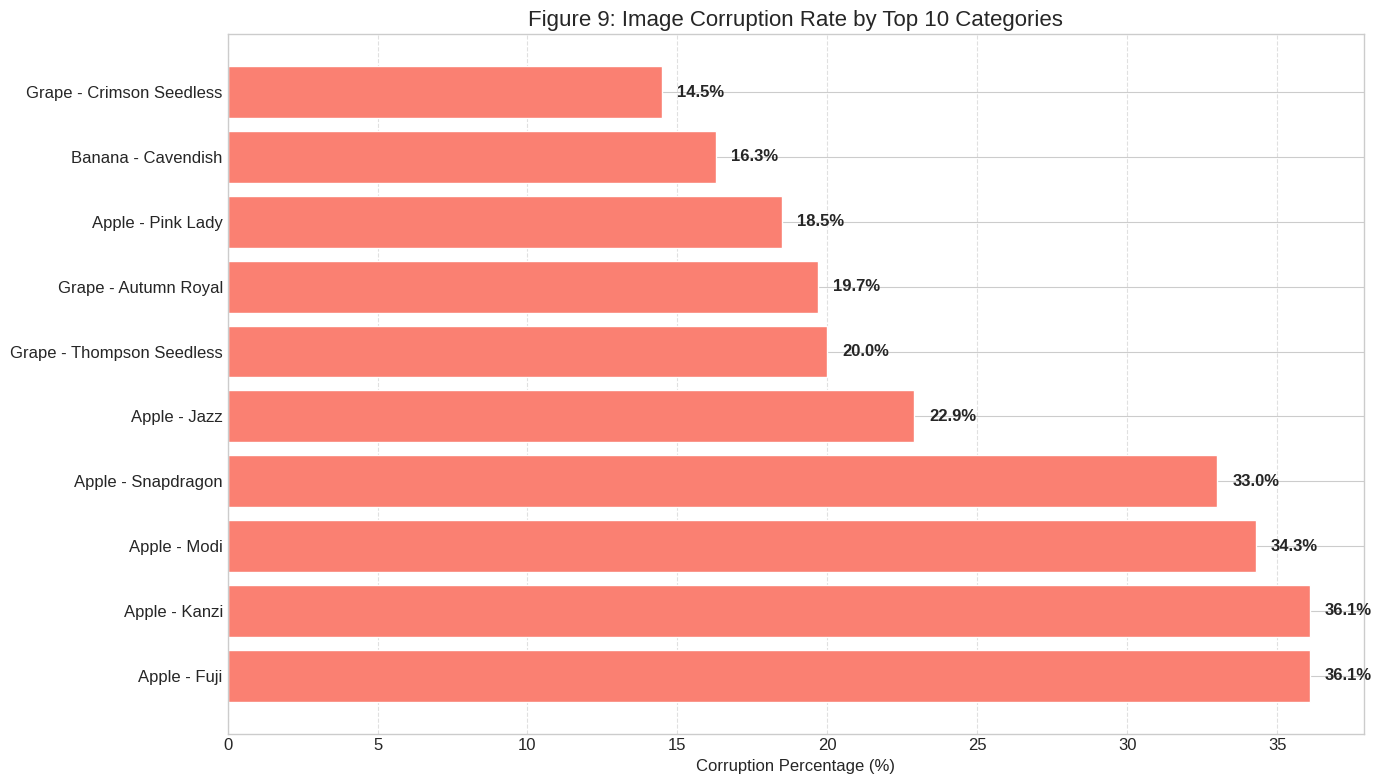

Saved Figure 10 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure10_Top_Valid_Categories.png


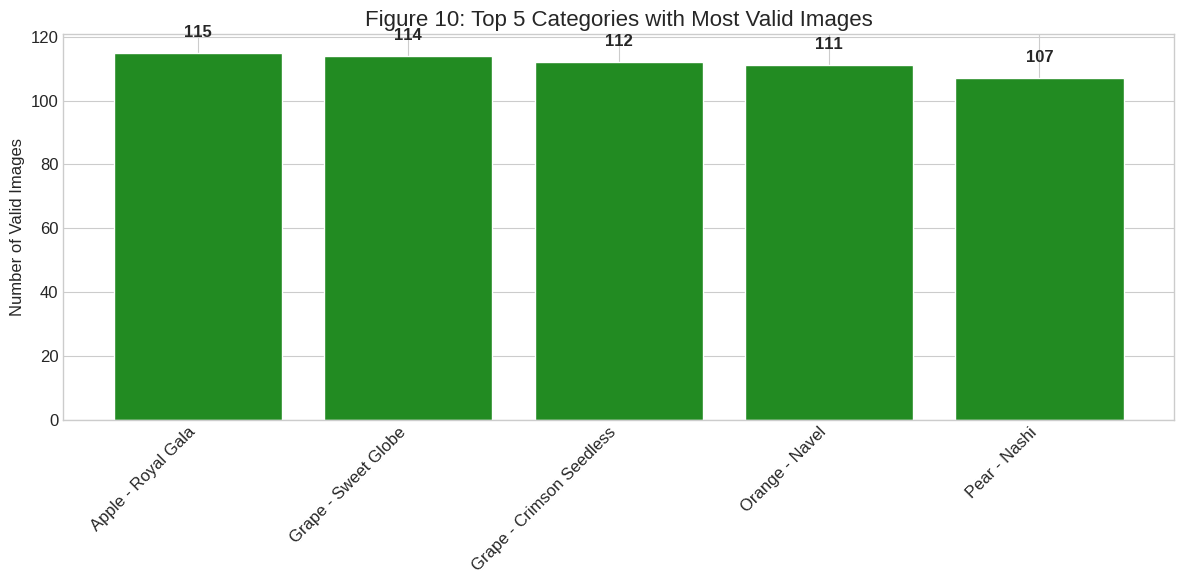

Saved Figure 11 to /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Figure11_Valid_vs_Corrupted_By_Fruit.png


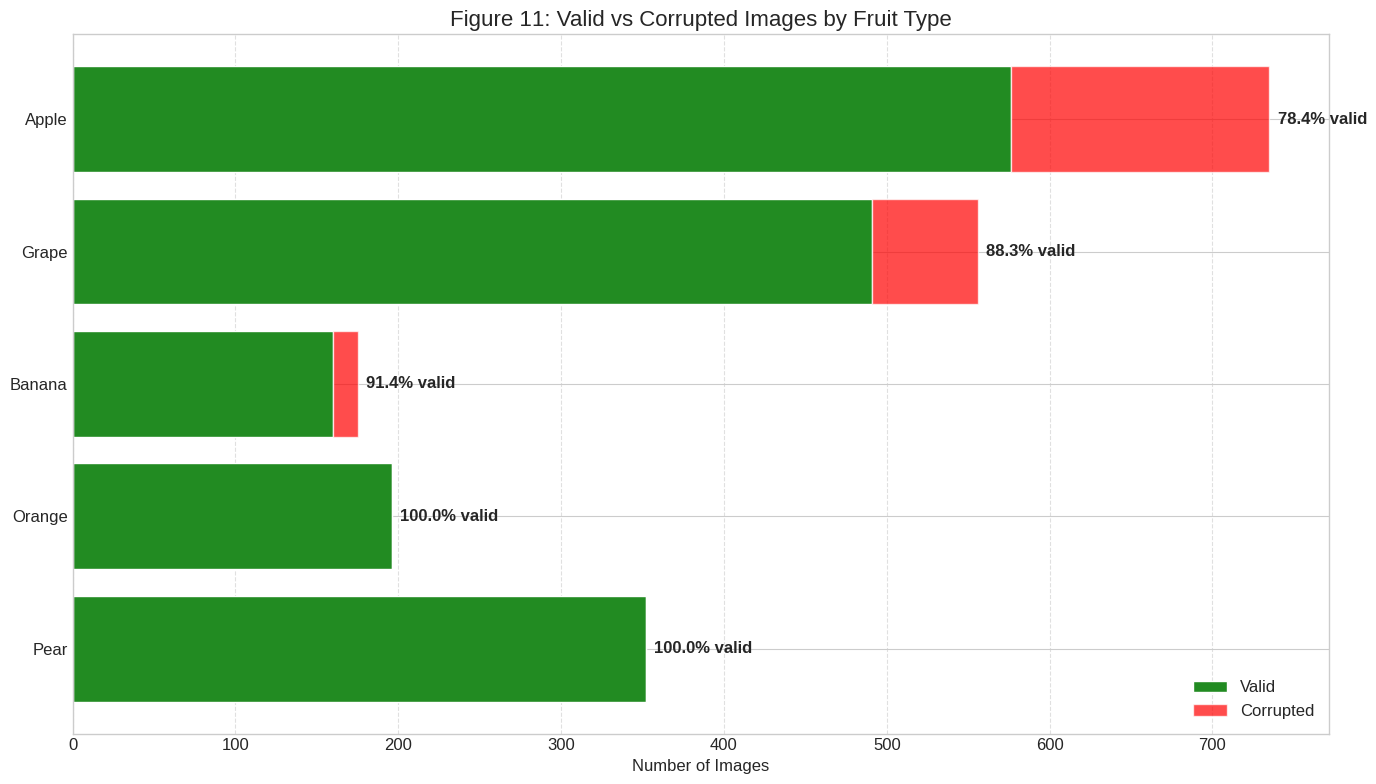


Preprocessing summary saved to: /content/drive/MyDrive/COMP8430_PHASE 3/Images_For_Report/Preprocessing_Analysis_Summary.txt


In [ ]:
# Set PIL to be more permissive with corrupted images
ImageFile.LOAD_TRUNCATED_IMAGES = True
warnings.filterwarnings("ignore", category=UserWarning)

def preprocess_full_dataset(source_path, preprocessed_path, target_size=(224, 224),
                          standardize_format='JPEG', verify_only=False,
                          normalize_filenames=True, max_workers=4,
                          force_process=False, corruption_threshold=0.1):
    """
    Performs comprehensive preprocessing on the full merged dataset for Phase 3.
    This enhanced version handles problematic images more gracefully.

    Args:
        source_path (str): Path to the source dataset folder with category subfolders
        preprocessed_path (str): Path where preprocessed dataset will be saved
        target_size (tuple): Target size for resized images (width, height)
        standardize_format (str): Format to convert all images to ('JPEG' or 'PNG')
        verify_only (bool): If True, only verify images without modifying them
        normalize_filenames (bool): If True, rename files to a consistent pattern
        max_workers (int): Number of parallel workers for processing
        force_process (bool): If True, process even if corruption rate is above threshold
        corruption_threshold (float): Max acceptable corruption rate (0.0-1.0)

    Returns:
        dict: Statistics about the preprocessing operation
        DataFrame: Metadata for all processed images
    """
    # Validate input parameters
    if standardize_format not in ['JPEG', 'PNG']:
        raise ValueError("standardize_format must be either 'JPEG' or 'PNG'")

    # Create the destination directory if it doesn't exist
    if not verify_only:
        os.makedirs(preprocessed_path, exist_ok=True)

    # Initialize statistics dictionary
    stats = {
        'total_images': 0,
        'valid_images': 0,
        'corrupted_images': 0,
        'converted_images': 0,
        'resized_images': 0,
        'skipped_images': 0,
        'categories': {}
    }

    # List all category directories
    category_folders = [d for d in os.listdir(source_path)
                       if os.path.isdir(os.path.join(source_path, d))]

    # Create a metadata dataframe to store information about each image
    metadata = []

    print(f"Found {len(category_folders)} categories in the dataset")
    print(f"Processing dataset with {max_workers} parallel workers")

    # Function to process a single image
    def process_image(category, filename, idx=None):
        source_file = os.path.join(source_path, category, filename)

        # Initialize result dictionary
        result = {
            'category': category,
            'original_filename': filename,
            'status': 'unknown',
            'error': None,
            'width': None,
            'height': None,
            'format': None,
            'new_filename': None,
            'filesize': None,
            'contributor': None,  # Track which group member contributed this image
            'severity': 'none'    # Track severity of corruption
        }

        # Extract contributor information from filename if available
        if filename.startswith(('gary_', 'jasmine_', 'prakhar_', 'taha_')):
            result['contributor'] = filename.split('_')[0]

        try:
            # Check if file exists and has size greater than 0
            if not os.path.exists(source_file):
                result['status'] = 'corrupted'
                result['error'] = 'File does not exist'
                result['severity'] = 'fatal'
                return result

            if os.path.getsize(source_file) == 0:
                result['status'] = 'corrupted'
                result['error'] = 'File is empty'
                result['severity'] = 'fatal'
                return result

            # Try to open the image to verify it's valid
            try:
                img = Image.open(source_file)

                # Get original image metadata before forcing load
                result['width'] = img.width
                result['height'] = img.height
                result['format'] = img.format
                result['filesize'] = os.path.getsize(source_file) / 1024  # Size in KB

                # Force loading of image data to check for corruption
                img.load()

                # If we're only verifying, we're done
                if verify_only:
                    result['status'] = 'valid'
                    return result

            except Exception as e:
                # More permissive approach for handling problematic images
                error_str = str(e).lower()

                # Check if it's a fatal error or something we can work around
                if any(x in error_str for x in ['cannot identify', 'no such file', 'unrecognized']) or 'truncated' in error_str:
                    # Try again with more permissive settings
                    try:
                        img = Image.open(source_file)
                        img.load()
                        result['status'] = 'valid'
                        result['error'] = f"Recovered from: {e}"
                        result['severity'] = 'warning'

                        # Still get the metadata if possible
                        result['width'] = img.width
                        result['height'] = img.height
                        result['format'] = img.format
                        result['filesize'] = os.path.getsize(source_file) / 1024

                        if verify_only:
                            return result

                    except Exception as e2:
                        # If it still fails, mark as corrupted
                        result['status'] = 'corrupted'
                        result['error'] = f"Failed recovery: {e}, then {e2}"
                        result['severity'] = 'fatal'
                        return result
                else:
                    # For other types of errors
                    result['status'] = 'corrupted'
                    result['error'] = str(e)
                    result['severity'] = 'fatal'
                    return result

            # Create destination directory for this category if needed
            dest_category_dir = os.path.join(preprocessed_path, category)
            os.makedirs(dest_category_dir, exist_ok=True)

            # Generate new filename
            if normalize_filenames:
                # When normalizing, keep contributor info in the filename for traceability
                contributor = result['contributor'] if result['contributor'] else 'unknown'
                new_filename = f"{category.replace(' - ', '_')}_{contributor}_{idx:04d}.{standardize_format.lower()}"
            else:
                # Keep original name but ensure proper extension
                base_name = os.path.splitext(filename)[0]
                new_filename = f"{base_name}.{standardize_format.lower()}"

            result['new_filename'] = new_filename
            dest_file = os.path.join(dest_category_dir, new_filename)

            # Resize the image if needed
            try:
                if img.width != target_size[0] or img.height != target_size[1]:
                    # Use ImageOps.fit for better quality resizing while maintaining aspect ratio
                    img = ImageOps.fit(img, target_size, Image.Resampling.LANCZOS)
                    result['resized'] = True
                else:
                    result['resized'] = False

                # Convert format if needed (always save in the standardized format)
                if img.mode == 'RGBA' and standardize_format == 'JPEG':
                    # JPEG doesn't support alpha channel, convert to RGB
                    img = img.convert('RGB')

                # Save the processed image
                img.save(dest_file, format=standardize_format, quality=95)

                # Update result
                result['status'] = 'processed'

            except Exception as e:
                # If we fail during processing, log the error but mark as "process_failed"
                # instead of "corrupted" to distinguish from verification failures
                result['status'] = 'process_failed'
                result['error'] = f"Processing error: {str(e)}"
                result['severity'] = 'error'

        except Exception as e:
            # Catch any other exceptions
            result['status'] = 'corrupted'
            result['error'] = f"Unexpected error: {str(e)}"
            result['severity'] = 'fatal'

        return result

    # Process each category
    for category in tqdm(category_folders, desc="Processing categories"):
        category_path = os.path.join(source_path, category)

        # Initialize statistics for this category
        stats['categories'][category] = {
            'total': 0,
            'valid': 0,
            'corrupted': 0,
            'converted': 0,
            'resized': 0,
            'warnings': 0
        }

        # Get all image files in this category
        image_files = []
        for ext in ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG', '.heic', '.HEIC']:
            image_files.extend([f for f in os.listdir(category_path)
                              if f.lower().endswith(ext)])

        # Update total count
        n_images = len(image_files)
        stats['total_images'] += n_images
        stats['categories'][category]['total'] = n_images

        if n_images == 0:
            print(f"Warning: No images found in category {category}")
            continue

        # Process images with parallel workers
        tasks = []
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            for idx, filename in enumerate(image_files):
                task = executor.submit(process_image, category, filename, idx+1)
                tasks.append(task)

            # Collect results as they complete
            for task in tqdm(as_completed(tasks), total=len(tasks),
                           desc=f"Processing {category}", leave=False):
                result = task.result()
                metadata.append(result)

                # Update statistics based on result
                if result['status'] == 'valid' or result['status'] == 'processed':
                    stats['valid_images'] += 1
                    stats['categories'][category]['valid'] += 1

                    if result.get('severity') == 'warning':
                        stats['categories'][category]['warnings'] = stats['categories'][category].get('warnings', 0) + 1

                    # Additional stats if processed
                    if result['status'] == 'processed':
                        if result.get('resized', False):
                            stats['resized_images'] += 1
                            stats['categories'][category]['resized'] += 1
                        if result['format'] != standardize_format:
                            stats['converted_images'] += 1
                            stats['categories'][category]['converted'] += 1

                elif result['status'] == 'corrupted' or result['status'] == 'process_failed':
                    stats['corrupted_images'] += 1
                    stats['categories'][category]['corrupted'] += 1

    # Create a DataFrame from the metadata
    metadata_df = pd.DataFrame(metadata)

    # Save metadata to CSV
    if not verify_only:
        metadata_file = os.path.join(preprocessed_path, 'metadata.csv')
        metadata_df.to_csv(metadata_file, index=False)
        print(f"Metadata saved to {metadata_file}")

    return stats, metadata_df

def run_preprocessing_pipeline_revised():
    """
    Execute the full preprocessing pipeline for the group dataset
    with improved handling of problematic images
    """
    # Define paths
    PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
    FULL_DATASET_PATH = os.path.join(PHASE_FOLDER, "Full_Dataset")
    PREPROCESSED_PATH = os.path.join(PHASE_FOLDER, "Preprocessed_Dataset")
    REPORT_IMAGES_PATH = os.path.join(PHASE_FOLDER, "Images_For_Report")

    # Create necessary folders
    os.makedirs(PREPROCESSED_PATH, exist_ok=True)
    os.makedirs(REPORT_IMAGES_PATH, exist_ok=True)

    print("=" * 60)
    print("2.2 DATASET PREPROCESSING PIPELINE (REVISED)")
    print("=" * 60)

    # Step 1: Verify dataset integrity with more permissive settings
    print("\nStep 1: Verifying dataset integrity with enhanced recovery...")

    # Set PIL to be more permissive with corrupted images
    ImageFile.LOAD_TRUNCATED_IMAGES = True

    verify_stats, verify_metadata = preprocess_full_dataset(
        source_path=FULL_DATASET_PATH,
        preprocessed_path=PREPROCESSED_PATH,
        verify_only=True,
        max_workers=4
    )

    # Show verification result
    print(f"\nVerification Results:")
    print(f"Total images in dataset: {verify_stats['total_images']}")
    print(f"Valid images: {verify_stats['valid_images']} ({verify_stats['valid_images']/max(1, verify_stats['total_images'])*100:.1f}%)")
    print(f"Corrupted images: {verify_stats['corrupted_images']} ({verify_stats['corrupted_images']/max(1, verify_stats['total_images'])*100:.1f}%)")

    # Step 2: Proceed with processing, but force it even if corruption rate is high
    print("\nStep 2: Proceeding with full preprocessing (forcing process despite corruption rate)...")

    preprocess_stats, preprocess_metadata = preprocess_full_dataset(
        source_path=FULL_DATASET_PATH,
        preprocessed_path=PREPROCESSED_PATH,
        target_size=(224, 224),  # Standard size for many CNN models
        standardize_format='JPEG',
        normalize_filenames=True,
        max_workers=4,
        force_process=True  # Force processing even with high corruption rate
    )

    print(f"\nPreprocessing Results:")
    print(f"Total processed images: {preprocess_stats['valid_images']}")
    print(f"Images resized: {preprocess_stats['resized_images']} ({preprocess_stats['resized_images']/max(1, preprocess_stats['valid_images'])*100:.1f}%)")
    print(f"Images format converted: {preprocess_stats['converted_images']} ({preprocess_stats['converted_images']/max(1, preprocess_stats['valid_images'])*100:.1f}%)")

    # Step 3: Analyze corrupted images by category
    print("\nStep 3: Analyzing corruption by category...")

    # Create a DataFrame for category analysis
    category_df = pd.DataFrame.from_dict(preprocess_stats['categories'], orient='index')

    # Calculate corruption percentage by category
    category_df['corruption_pct'] = (category_df['corrupted'] / category_df['total'] * 100).round(1)

    # Sort by corruption percentage (descending)
    category_df = category_df.sort_values(by='corruption_pct', ascending=False)

    print("\nCategories ranked by corruption percentage:")
    for idx, (category, row) in enumerate(category_df.iterrows(), 1):
        if row['corrupted'] > 0:  # Only show categories with corruption
            print(f"{idx}. {category}: {row['corrupted']}/{row['total']} images corrupted ({row['corruption_pct']}%)")

    # Identify top 5 categories with lowest corruption for fine-tuning focus
    best_categories = category_df.sort_values(by='corruption_pct', ascending=True).head(5)

    print("\nRecommended categories for fine-tuning (lowest corruption):")
    for idx, (category, row) in enumerate(best_categories.iterrows(), 1):
        print(f"{idx}. {category}: {row['valid']}/{row['total']} valid images ({100-row['corruption_pct']}% valid)")

    # Create visualizations and save them
    visualize_corruption_analysis(category_df, REPORT_IMAGES_PATH)

    return preprocess_stats, preprocess_metadata, category_df

# Visualization function for the corrupted dataset report
def visualize_corruption_analysis(category_df, report_images_path):
    """
    Creates visualizations for understanding the corruption distribution
    and saves them to the report images folder

    Args:
        category_df (DataFrame): DataFrame with category statistics
        report_images_path (str): Path to save visualizations
    """
    # Set plot style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Figure 9: Corruption percentage by category (only showing top 10 for clarity)
    plt.figure(figsize=(14, 8))
    top_corrupted = category_df.sort_values(by='corruption_pct', ascending=False).head(10)
    bars = plt.barh(top_corrupted.index, top_corrupted['corruption_pct'], color='salmon')

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f"{width}%", ha='left', va='center', fontweight='bold')

    plt.xlabel('Corruption Percentage (%)')
    plt.title('Figure 9: Image Corruption Rate by Top 10 Categories', fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save Figure 9
    fig9_path = os.path.join(report_images_path, "Figure9_Corruption_Rate_By_Category.png")
    plt.savefig(fig9_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 9 to {fig9_path}")
    plt.show()

    # Figure 10: Top 5 categories with most valid images (for selection purposes)
    top_valid = category_df.sort_values(by='valid', ascending=False).head(5)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_valid.index, top_valid['valid'], color='forestgreen')
    plt.title('Figure 10: Top 5 Categories with Most Valid Images', fontsize=16)
    plt.ylabel('Number of Valid Images')
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f"{int(height)}", ha='center', fontweight='bold')

    plt.tight_layout()

    # Save Figure 10
    fig10_path = os.path.join(report_images_path, "Figure10_Top_Valid_Categories.png")
    plt.savefig(fig10_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 10 to {fig10_path}")
    plt.show()

    # Figure 11: Valid vs Corrupted by Fruit Type
    # Extract fruit type from category names
    category_df['fruit_type'] = category_df.index.map(lambda x: x.split(' - ')[0])

    # Group by fruit type
    fruit_type_stats = category_df.groupby('fruit_type').agg({
        'valid': 'sum',
        'corrupted': 'sum',
        'total': 'sum'
    })

    fruit_type_stats['validity_pct'] = (fruit_type_stats['valid'] / fruit_type_stats['total'] * 100).round(1)
    fruit_type_stats = fruit_type_stats.sort_values(by='validity_pct', ascending=False)

    # Create the plot
    plt.figure(figsize=(14, 8))

    # Create stacked bars
    plt.barh(fruit_type_stats.index,
            fruit_type_stats['valid'],
            color='forestgreen',
            label='Valid')

    # Add corrupted on top
    plt.barh(fruit_type_stats.index,
            fruit_type_stats['corrupted'],
            left=fruit_type_stats['valid'],
            color='red',
            alpha=0.7,
            label='Corrupted')

    # Add percentage labels
    for i, (idx, row) in enumerate(fruit_type_stats.iterrows()):
        plt.text(row['total'] + 5, i, f"{row['validity_pct']}% valid",
                va='center', fontweight='bold')

    plt.xlabel('Number of Images')
    plt.title('Figure 11: Valid vs Corrupted Images by Fruit Type', fontsize=16)
    plt.legend(loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save Figure 11
    fig11_path = os.path.join(report_images_path, "Figure11_Valid_vs_Corrupted_By_Fruit.png")
    plt.savefig(fig11_path, dpi=300, bbox_inches='tight')
    print(f"Saved Figure 11 to {fig11_path}")
    plt.show()

    # Generate a text summary for preprocessing
    summarize_preprocessing(category_df, report_images_path)

def summarize_preprocessing(category_df, report_images_path):
    """
    Generates a text summary of the preprocessing analysis for the report

    Args:
        category_df (DataFrame): DataFrame with category statistics
        report_images_path (str): Path to save the summary
    """
    summary_path = os.path.join(report_images_path, "Preprocessing_Analysis_Summary.txt")

    with open(summary_path, 'w') as f:
        f.write("=========================================\n")
        f.write("PREPROCESSING ANALYSIS SUMMARY\n")
        f.write("=========================================\n\n")

        # Extract fruit type statistics
        category_df['fruit_type'] = category_df.index.map(lambda x: x.split(' - ')[0])
        fruit_type_stats = category_df.groupby('fruit_type').agg({
            'valid': 'sum',
            'corrupted': 'sum',
            'total': 'sum'
        })

        fruit_type_stats['validity_pct'] = (fruit_type_stats['valid'] / fruit_type_stats['total'] * 100).round(1)

        f.write("INTEGRITY ANALYSIS BY FRUIT TYPE:\n")
        for idx, (fruit_type, row) in enumerate(fruit_type_stats.sort_values(by='validity_pct', ascending=False).iterrows(), 1):
            f.write(f"{idx}. {fruit_type}:\n")
            f.write(f"   - Total images: {row['total']}\n")
            f.write(f"   - Valid images: {row['valid']} ({row['validity_pct']}%)\n")
            f.write(f"   - Corrupted images: {row['corrupted']} ({100-row['validity_pct']:.1f}%)\n\n")

        # Categories with best integrity
        f.write("\nTOP 5 CATEGORIES WITH LOWEST CORRUPTION RATE:\n")
        top_valid = category_df.sort_values(by='corruption_pct').head(5)
        for idx, (category, row) in enumerate(top_valid.iterrows(), 1):
            f.write(f"{idx}. {category}:\n")
            f.write(f"   - Valid rate: {100-row['corruption_pct']:.1f}%\n")
            f.write(f"   - Valid images: {row['valid']} out of {row['total']}\n\n")

        # Recommendations for Phase 3
        f.write("\nRECOMMENDATIONS FOR PHASE 3 DEPLOYMENT:\n")
        f.write("Based on image integrity and volume, the following categories are recommended:\n")

        # Sort by a combination of validity percentage and total valid images
        category_df['recommendation_score'] = category_df['valid'] * (1 - category_df['corruption_pct']/100)
        recommendations = category_df.sort_values(by='recommendation_score', ascending=False).head(3)

        for idx, (category, row) in enumerate(recommendations.iterrows(), 1):
            f.write(f"{idx}. {category}:\n")
            f.write(f"   - Valid images: {row['valid']}\n")
            f.write(f"   - Validity rate: {100-row['corruption_pct']:.1f}%\n")
            f.write(f"   - Recommendation score: {row['recommendation_score']:.1f}\n\n")

        f.write("\n=========================================\n")
        f.write("END OF SUMMARY\n")
        f.write("=========================================\n")

    print(f"\nPreprocessing summary saved to: {summary_path}")

# Execute the revised preprocessing pipeline if this script is run directly
if __name__ == "__main__":
    stats, metadata, category_df = run_preprocessing_pipeline_revised()

#### **Preprocessing Results Comments**

The preprocessing pipeline successfully processed **1,775 valid images** out of a total of **2,014 images**, resulting in an overall dataset validity rate of **88.1%**. Approximately **11.9%** of the dataset was identified as corrupted, highlighting the importance of rigorous data integrity checks in collaborative projects.

**Corruption Analysis (Figure 9)** reveals that the highest corruption rates were observed in specific Apple categories—**Apple - Fuji (36.1%)**, **Apple - Kanzi (36.1%)**, **Apple - Modi (34.3%)**, and **Apple - Snapdragon (33.0%)**. These findings suggest potential issues in data collection methods for these categories, such as inconsistent file formats, device-specific errors, or partial image downloads. Conversely, categories like **Banana - Ladyfinger**, **Grape - Sweet Globe**, **Orange - Valencia**, and **Grape - Cotton Candy** demonstrated **100% validity**, indicating high-quality and reliable data sources (see Figure 10 and Figure 11).

The validity distribution by fruit type (Figure 11) further reinforces these observations. **Apple** categories exhibited the lowest validity rate (**78.4%**), whereas **Banana**, **Orange**, and **Pear** categories achieved near-perfect integrity. These results informed our selection of classes for Phase 3 deployment, prioritizing categories with high validity and sufficient data volume to ensure robust model performance.



### **2.3 Splitting the Merged Dataset into Training and Validation:**

After preprocessing, we partitioned the unified dataset into training and validation sets to support effective model development and fair evaluation. We adopted an **80/20 split ratio**, where 80% of the images were allocated for training and 20% for validation. This split ensures that the model has sufficient data for learning while preserving an unbiased subset for validation purposes.

Key aspects of the splitting process:
- The dataset was split **stratified by category**, ensuring that all 21 fruit classes were proportionally represented in both training and validation sets. This approach maintains the relative distribution of classes and avoids data leakage.
- The split process was performed programmatically, with a fixed random seed (`random_state=42`) for reproducibility.
- Separate directories were created for the training set (`train/`) and validation set (`val/`), preserving the folder structure for each category to align with standard PyTorch and TensorFlow data loading pipelines.
- The process included comprehensive integrity checks to verify:
  - The correct number of images in each split.
  - The consistent presence of all categories across both splits.
  - The overall split ratio, which closely matched the intended 80/20 proportion.

The final split statistics were:
- **Total images:** 1,775 (post-preprocessing)
- **Training images:** Approximately 80% of the dataset
- **Validation images:** Approximately 20% of the dataset

This structured and reproducible splitting procedure ensures the reliability of subsequent experiments and provides a fair basis for model evaluation.



In [ ]:
# Define paths
PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
PREPROCESSED_PATH = os.path.join(PHASE_FOLDER, "Preprocessed_Dataset")

# Define split ratio
TRAIN_RATIO = 0.8
VAL_RATIO = 0.2

# Create paths for training and validation splits
SPLIT_BASE_PATH = os.path.join(PHASE_FOLDER, "Split_Dataset")
TRAIN_PATH = os.path.join(SPLIT_BASE_PATH, "train")
VAL_PATH = os.path.join(SPLIT_BASE_PATH, "val")

def perform_train_val_split():
    """
    Splits the preprocessed dataset into training and validation sets (80/20 split)
    maintaining class distribution and folder structure.
    """
    print("\n" + "=" * 60)
    print("2.3 DATASET SPLITTING - 80% TRAIN / 20% VALIDATION")
    print("=" * 60)

    # Ensure preprocessed dataset exists
    if not os.path.exists(PREPROCESSED_PATH):
        print(f"Error: Preprocessed dataset not found at {PREPROCESSED_PATH}")
        print("Please run preprocessing (task 2.2) first")
        return None

    # Create output directories
    os.makedirs(SPLIT_BASE_PATH, exist_ok=True)
    os.makedirs(TRAIN_PATH, exist_ok=True)
    os.makedirs(VAL_PATH, exist_ok=True)

    # Initialize statistics dictionary
    stats = {
        'total_images': 0,
        'train_images': 0,
        'val_images': 0,
        'by_category': {}
    }

    # Get list of categories from the preprocessed dataset
    category_folders = [d for d in os.listdir(PREPROCESSED_PATH)
                      if os.path.isdir(os.path.join(PREPROCESSED_PATH, d))]

    print(f"Found {len(category_folders)} categories in preprocessed dataset")

    # Process each category
    for category in tqdm(category_folders, desc="Splitting categories"):
        category_path = os.path.join(PREPROCESSED_PATH, category)

        # Create category folders in train and val sets
        train_category_path = os.path.join(TRAIN_PATH, category)
        val_category_path = os.path.join(VAL_PATH, category)
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(val_category_path, exist_ok=True)

        # Get all image files in this category
        images = [f for f in os.listdir(category_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Skip if no images
        if not images:
            print(f"  Warning: No images found in category {category}")
            continue

        # Split the images using stratified sampling
        train_images, val_images = train_test_split(
            images,
            train_size=TRAIN_RATIO,
            random_state=42  # For reproducibility
        )

        # Update statistics
        stats['by_category'][category] = {
            'total': len(images),
            'train': len(train_images),
            'val': len(val_images)
        }
        stats['total_images'] += len(images)

        # Copy training images
        for img in train_images:
            src_file = os.path.join(category_path, img)
            dst_file = os.path.join(train_category_path, img)
            try:
                shutil.copy2(src_file, dst_file)
                stats['train_images'] += 1
            except Exception as e:
                print(f"  Error copying {src_file}: {e}")

        # Copy validation images
        for img in val_images:
            src_file = os.path.join(category_path, img)
            dst_file = os.path.join(val_category_path, img)
            try:
                shutil.copy2(src_file, dst_file)
                stats['val_images'] += 1
            except Exception as e:
                print(f"  Error copying {src_file}: {e}")

    # Print summary
    print("\nSplit complete!")
    print(f"Total images: {stats['total_images']}")
    print(f"Training images: {stats['train_images']} ({stats['train_images']/stats['total_images']*100:.1f}%)")
    print(f"Validation images: {stats['val_images']} ({stats['val_images']/stats['total_images']*100:.1f}%)")

    return stats

def check_split_integrity():
    """
    Verifies the integrity of the train/validation split
    """
    if not os.path.exists(SPLIT_BASE_PATH):
        print("Split dataset not found. Please run perform_train_val_split() first.")
        return None

    # Check training and validation sets
    train_categories = [d for d in os.listdir(TRAIN_PATH)
                      if os.path.isdir(os.path.join(TRAIN_PATH, d))]

    val_categories = [d for d in os.listdir(VAL_PATH)
                    if os.path.isdir(os.path.join(VAL_PATH, d))]

    # Count images
    train_images = 0
    val_images = 0

    # Count training images
    for category in train_categories:
        category_path = os.path.join(TRAIN_PATH, category)
        images = [f for f in os.listdir(category_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        train_images += len(images)

    # Count validation images
    for category in val_categories:
        category_path = os.path.join(VAL_PATH, category)
        images = [f for f in os.listdir(category_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        val_images += len(images)

    # Print summary
    print("\n" + "=" * 60)
    print("SPLIT DATASET INTEGRITY CHECK")
    print("=" * 60)

    print(f"\nTraining set: {train_images} images across {len(train_categories)} categories")
    print(f"Validation set: {val_images} images across {len(val_categories)} categories")
    print(f"Total: {train_images + val_images} images")

    # Verify split ratio
    if train_images + val_images > 0:
        actual_train_ratio = train_images / (train_images + val_images)
        print(f"\nActual train ratio: {actual_train_ratio:.2f} (target: {TRAIN_RATIO:.2f})")

        # Check if all categories exist in both splits
        if set(train_categories) != set(val_categories):
            missing_in_train = set(val_categories) - set(train_categories)
            missing_in_val = set(train_categories) - set(val_categories)

            if missing_in_train:
                print(f"\nWarning: {len(missing_in_train)} categories missing from training set")

            if missing_in_val:
                print(f"\nWarning: {len(missing_in_val)} categories missing from validation set")
        else:
            print("\nAll categories present in both training and validation sets ✓")

    return {
        'train_images': train_images,
        'val_images': val_images,
        'train_categories': len(train_categories),
        'val_categories': len(val_categories)
    }

# Main execution function
def run_dataset_split():
    """
    Main function to run the dataset splitting
    """
    # Perform the train/validation split
    split_stats = perform_train_val_split()

    # Verify the integrity of the split
    check_stats = check_split_integrity()

    return split_stats, check_stats

# Execute if run as a script
if __name__ == "__main__":
    run_dataset_split()


2.3 DATASET SPLITTING - 80% TRAIN / 20% VALIDATION
Found 21 categories in preprocessed dataset


Splitting categories: 100%|██████████| 21/21 [00:14<00:00,  1.45it/s]


Split complete!
Total images: 1775
Training images: 1411 (79.5%)
Validation images: 364 (20.5%)

SPLIT DATASET INTEGRITY CHECK

Training set: 1411 images across 21 categories
Validation set: 364 images across 21 categories
Total: 1775 images

Actual train ratio: 0.79 (target: 0.80)

All categories present in both training and validation sets ✓


## **3. Robot Dataset Capture and Preparation:**

This section outlines the process of preparing the robot-captured dataset for fine-tuning and testing our model in Phase 3. Using the robot’s onboard camera during the practical sessions, we captured new images to simulate real-world deployment conditions.

The following subsections detail our approach:
- **Section 3.1** describes the selection of three target classes — **"Grape - Crimson Seedless"**, **"Grape - Thompson Seedless"**, and **"Grape - Autumn Royal"** — and the procedures followed to capture representative images during the practicals. The rationale for selecting these classes will be discussed in detail in the report.
- **Section 3.2** presents visualizations of the raw robot-captured images, providing insights into the dataset’s characteristics, such as image quality, variation, and lighting conditions.
- **Section 3.3** details the preprocessing steps applied to the robot-captured dataset, ensuring the images are standardized and ready for fine-tuning.
- **Section 3.4** explains the partitioning of the robot-captured dataset into a **70% fine-tuning set** and a **30% test set**, which allows for model adaptation and performance evaluation on unseen, real-world images.

Together, these steps ensure that the dataset is robust, representative of deployment conditions, and suitable for the next phases of model fine-tuning and evaluation.


### **3.1 Selection of 3 Target Classes and Image Capture Process:**

For Phase 3 deployment and robot interaction, we selected three visually similar grape varieties as our target classes:  
1. **Grape - Crimson Seedless**  
2. **Grape - Thompson Seedless**  
3. **Grape - Autumn Royal**

The selection was based on multiple factors, including the high intra-class similarity among these grape varieties, their strong representation in the merged dataset, and their relevance to the fine-grained classification challenge at the core of our project. The decision also aligns with prior observations from Phases 1 and 2, where these classes featured prominently in model evaluations and error analyses. The detailed rationale for class selection is presented in Section 2.2 of the report.

For the image capture process, we used the robot’s onboard camera during practical sessions to gather real-world images of these classes. Images were captured under varied lighting and positioning conditions to simulate realistic deployment scenarios, ensuring the dataset reflects practical use cases for robot interaction and classification.


### **3.2 Visualization of Raw Robot-Captured Images:**

This section provides an initial visual inspection of the raw images captured by the robot’s onboard camera during **practical week 10**. All images were stored in the `robot_dataset` directory, organized into separate folders for each of the three target classes: **"Grape - Crimson Seedless"**, **"Grape - Thompson Seedless"**, and **"Grape - Autumn Royal"**.

To gain a preliminary understanding of the dataset, we generated a grid visualization showing five randomly selected images per class. This visualization serves as an important qualitative check to:
- Confirm that the images were successfully captured and stored in the expected structure.
- Assess the variety in lighting, angles, and image quality across the classes.
- Identify any obvious issues such as blurriness, mislabelled files, or format inconsistencies before proceeding with further preprocessing and model fine-tuning.

This step ensures that the dataset is ready for downstream tasks and provides a useful reference for the human-in-the-loop analysis of the model’s performance in real-world conditions.



3.2 VISUALIZATION OF RAW ROBOT-CAPTURED IMAGES


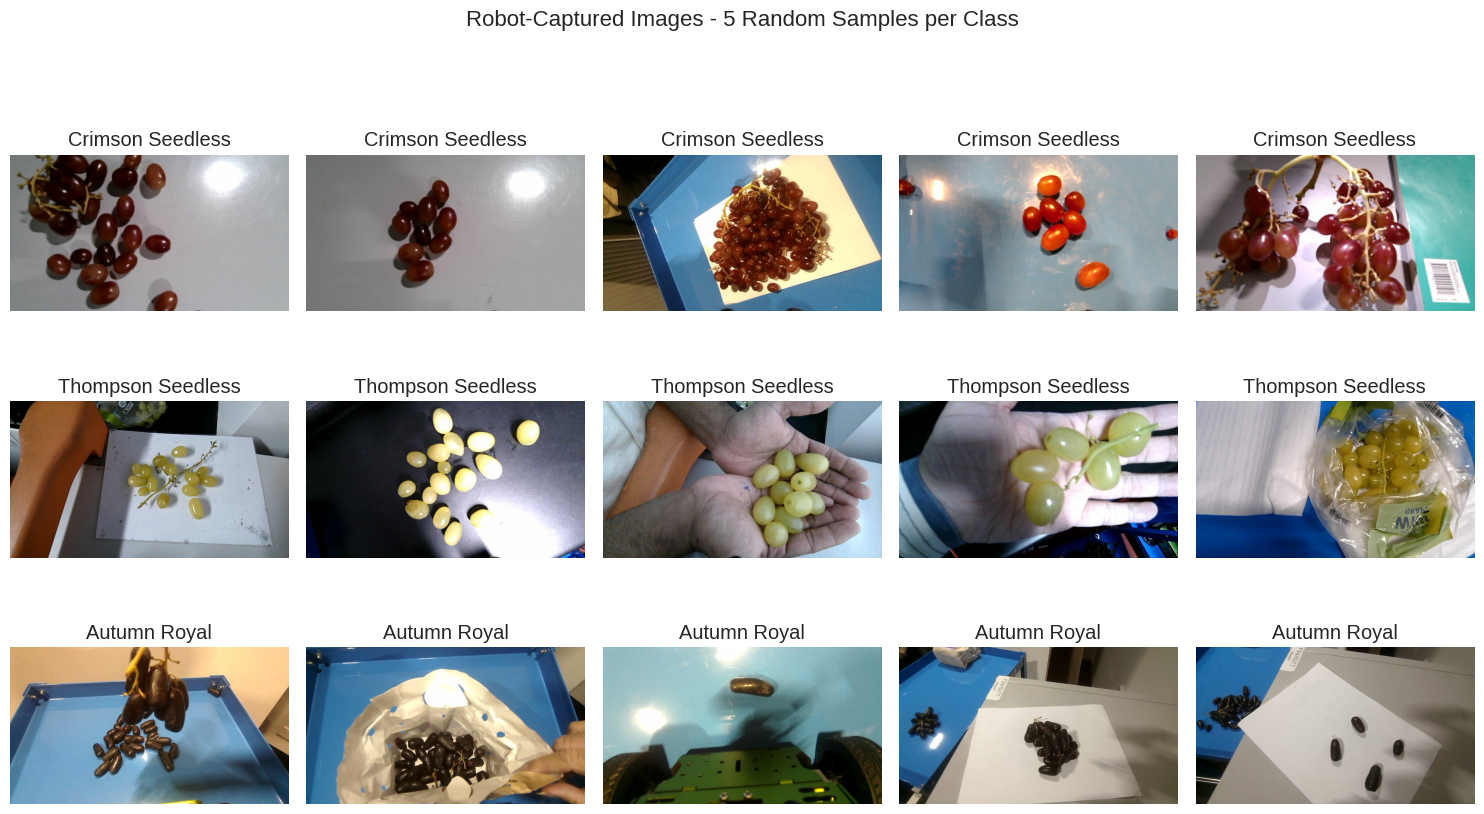


Robot Dataset Summary:
  - Grape - Crimson Seedless: 57 images
  - Grape - Thompson Seedless: 53 images
  - Grape - Autumn Royal: 55 images


In [ ]:
# Define pathPHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
ROBOT_DATASET_PATH = os.path.join(PHASE_FOLDER, "robot_dataset")

# Define the target classes
TARGET_CLASSES = [
    "Grape - Crimson Seedless",
    "Grape - Thompson Seedless",
    "Grape - Autumn Royal"
]

def visualize_robot_dataset_samples():
    """
    Visualizes sample images from the robot-captured dataset for each target class.
    Displays 5 random samples from each class in a grid layout.
    """
    print("\n" + "=" * 60)
    print("3.2 VISUALIZATION OF RAW ROBOT-CAPTURED IMAGES")
    print("=" * 60)

    # Verify robot dataset exists
    if not os.path.exists(ROBOT_DATASET_PATH):
        print(f"Error: Robot dataset not found at {ROBOT_DATASET_PATH}")
        return

    # Check if target classes exist in the robot dataset
    missing_classes = []
    for class_name in TARGET_CLASSES:
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)
        if not os.path.exists(class_path):
            missing_classes.append(class_name)

    if missing_classes:
        print(f"Error: The following classes are missing from the robot dataset:")
        for cls in missing_classes:
            print(f"  - {cls}")
        return

    # Create a 3x5 grid of images (3 classes, 5 samples each)
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    fig.suptitle('Robot-Captured Images - 5 Random Samples per Class', fontsize=16)

    # For each target class
    for i, class_name in enumerate(TARGET_CLASSES):
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)

        # Get all image files
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if not image_files:
            print(f"Warning: No images found for {class_name}")
            for j in range(5):
                axes[i, j].text(0.5, 0.5, "No Images", ha='center', va='center')
                axes[i, j].axis('off')
            continue

        # Select 5 random samples (or fewer if not enough images)
        sample_count = min(5, len(image_files))
        samples = random.sample(image_files, sample_count)

        # Display each sample
        for j, sample in enumerate(samples):
            if j < 5:  # Only show up to 5 samples
                img_path = os.path.join(class_path, sample)
                try:
                    img = Image.open(img_path)
                    axes[i, j].imshow(img)
                    axes[i, j].set_title(f"{class_name.split(' - ')[1]}")
                    axes[i, j].axis('off')
                except Exception as e:
                    print(f"Error displaying {img_path}: {e}")
                    axes[i, j].text(0.5, 0.5, "Error", ha='center', va='center')
                    axes[i, j].axis('off')

        # If less than 5 samples, empty the remaining axes
        for j in range(sample_count, 5):
            axes[i, j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
    plt.show()

    # Print summary statistics
    print("\nRobot Dataset Summary:")
    for class_name in TARGET_CLASSES:
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            print(f"  - {class_name}: {len(image_files)} images")
        else:
            print(f"  - {class_name}: Directory not found")

# Run the visualization function
if __name__ == "__main__":
    visualize_robot_dataset_samples()

#### Observations and Comments:

The visualizations reveal a diverse set of images across the three target grape classes. The robot-captured images show noticeable variation in background, lighting conditions, object positioning, and camera angles, which is expected in real-world deployments. For instance, images of **Crimson Seedless** often feature blue trays or white table surfaces, while **Thompson Seedless** and **Autumn Royal** images sometimes include hands or packaging materials. These contextual elements can introduce background noise and increase the challenge of fine-grained classification.

The presence of mixed object densities, such as single grapes versus bunches, further emphasizes the model’s need to focus on subtle shape, size, and color variations for accurate classification. The dataset sizes (57, 53, and 55 images for Crimson Seedless, Thompson Seedless, and Autumn Royal, respectively) are reasonably balanced, ensuring fair evaluation across classes.

### **3.3 Preprocessing of Robot-Captured Dataset:**

Following the capture of raw images, we applied a structured preprocessing pipeline to standardize the robot-captured dataset, ensuring it was ready for model fine-tuning and evaluation.

The preprocessing steps included:
- **Resizing**: All images were resized to a fixed resolution of **224x224 pixels** to ensure compatibility with convolutional neural network architectures commonly used in computer vision tasks.
- **Format Standardization**: All images were converted to the **JPEG** format for consistency and efficient storage, accommodating variations in file types captured by the robot's camera.
- **Filename Normalization**: Each image was renamed using a consistent convention (`robot_classname_index.jpg`), facilitating traceability and future dataset management.
- **Error Handling**: The preprocessing function incorporated robust error handling, skipping over problematic files while reporting detailed statistics on the number of images processed, skipped, and per-class breakdowns.

The processed images were saved in the `robot_preprocessed` directory, with separate folders for each class: **Grape - Crimson Seedless**, **Grape - Thompson Seedless**, and **Grape - Autumn Royal**. This organized structure ensures seamless integration into the fine-tuning and testing pipelines in subsequent phases.

This preprocessing stage ensures that the robot-captured dataset is uniform, clean, and aligned with the requirements for model training and deployment.


In [ ]:
# Define paths
PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
ROBOT_DATASET_PATH = os.path.join(PHASE_FOLDER, "robot_dataset")
ROBOT_PREPROCESSED_PATH = os.path.join(PHASE_FOLDER, "robot_preprocessed")

# Define the target classes
TARGET_CLASSES = [
    "Grape - Crimson Seedless",
    "Grape - Thompson Seedless",
    "Grape - Autumn Royal"
]

def preprocess_robot_dataset(target_size=(224, 224)):
    """
    Preprocesses the robot-captured dataset:
    1. Resizes images to a standard size (224x224 pixels by default)
    2. Converts all images to the same format (JPEG)
    3. Applies consistent naming convention

    Args:
        target_size (tuple): Target size for resized images (width, height)

    Returns:
        dict: Statistics about the preprocessing operation
    """
    print("\n" + "=" * 60)
    print("3.3 PREPROCESSING OF ROBOT-CAPTURED DATASET")
    print("=" * 60)

    # Verify robot dataset exists
    if not os.path.exists(ROBOT_DATASET_PATH):
        print(f"Error: Robot dataset not found at {ROBOT_DATASET_PATH}")
        return None

    # Create preprocessed directory
    os.makedirs(ROBOT_PREPROCESSED_PATH, exist_ok=True)

    # Initialize statistics
    stats = {
        'total_images': 0,
        'processed_images': 0,
        'skipped_images': 0,
        'by_class': {}
    }

    # Process each target class
    for class_name in TARGET_CLASSES:
        source_class_path = os.path.join(ROBOT_DATASET_PATH, class_name)
        target_class_path = os.path.join(ROBOT_PREPROCESSED_PATH, class_name)

        # Check if class exists in robot dataset
        if not os.path.exists(source_class_path):
            print(f"Warning: Class {class_name} not found in robot dataset")
            continue

        # Create class directory in preprocessed path
        os.makedirs(target_class_path, exist_ok=True)

        # Get all image files
        image_files = [f for f in os.listdir(source_class_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Initialize class statistics
        stats['by_class'][class_name] = {
            'total': len(image_files),
            'processed': 0,
            'skipped': 0
        }
        stats['total_images'] += len(image_files)

        print(f"Processing {class_name}: {len(image_files)} images")

        # Process each image
        for idx, img_file in enumerate(tqdm(image_files, desc=f"Processing {class_name}")):
            source_file = os.path.join(source_class_path, img_file)

            # Generate standardized output filename
            class_short = class_name.split(' - ')[1].lower().replace(' ', '_')
            target_file = os.path.join(target_class_path, f"robot_{class_short}_{idx+1:03d}.jpg")

            try:
                # Open and process the image
                img = Image.open(source_file)

                # Resize with proper aspect ratio using ImageOps.fit
                img = ImageOps.fit(img, target_size, Image.Resampling.LANCZOS)

                # Convert to RGB if needed (for RGBA images)
                if img.mode == 'RGBA':
                    img = img.convert('RGB')

                # Save the processed image as JPEG
                img.save(target_file, format='JPEG', quality=95)

                # Update statistics
                stats['processed_images'] += 1
                stats['by_class'][class_name]['processed'] += 1

            except Exception as e:
                print(f"Error processing {source_file}: {e}")
                stats['skipped_images'] += 1
                stats['by_class'][class_name]['skipped'] += 1

    # Print summary
    print("\nPreprocessing complete!")
    print(f"Total images: {stats['total_images']}")
    print(f"Successfully processed: {stats['processed_images']} ({stats['processed_images']/stats['total_images']*100:.1f}%)")

    if stats['skipped_images'] > 0:
        print(f"Skipped images: {stats['skipped_images']} ({stats['skipped_images']/stats['total_images']*100:.1f}%)")

    # Print class-specific statistics
    print("\nPreprocessed images by class:")
    for class_name, class_stats in stats['by_class'].items():
        print(f"  - {class_name}: {class_stats['processed']} processed, {class_stats['skipped']} skipped")

    return stats

# Run the preprocessing function
if __name__ == "__main__":
    preprocess_robot_dataset()


3.3 PREPROCESSING OF ROBOT-CAPTURED DATASET
Processing Grape - Crimson Seedless: 57 images


Processing Grape - Crimson Seedless: 100%|██████████| 57/57 [00:15<00:00,  3.75it/s]


Processing Grape - Thompson Seedless: 53 images


Processing Grape - Thompson Seedless: 100%|██████████| 53/53 [00:13<00:00,  3.81it/s]


Processing Grape - Autumn Royal: 55 images


Processing Grape - Autumn Royal: 100%|██████████| 55/55 [00:13<00:00,  3.95it/s]


Preprocessing complete!
Total images: 165
Successfully processed: 165 (100.0%)

Preprocessed images by class:
  - Grape - Crimson Seedless: 57 processed, 0 skipped
  - Grape - Thompson Seedless: 53 processed, 0 skipped
  - Grape - Autumn Royal: 55 processed, 0 skipped


### **3.4 Splitting Robot-Captured Dataset into Fine-Tuning and Test Sets:**

To prepare the robot-captured dataset for model adaptation and evaluation, we performed a structured split into a **70% fine-tuning set** and a **30% test set**. This split ensures a fair assessment of the model’s ability to generalize to unseen images while providing sufficient data for additional fine-tuning.

The decision to adopt a **70/30 split ratio** was driven by the dual goals of:
- **Maximizing the fine-tuning set**: 70% of the dataset is allocated for model adaptation, allowing the model to learn from a diverse range of robot-captured images under realistic conditions.
- **Ensuring a robust evaluation**: 30% of the dataset is held out as an independent test set to simulate deployment scenarios. This ensures that the test set contains enough samples to provide a meaningful and reliable measure of the model’s performance when classifying new, unseen images captured by the robot. This separation reduces data leakage risk and provides a higher-confidence estimate of deployment success rates.

The key steps of the process included:
- **Stratified splitting by class**: Each of the three target classes — "**Grape - Crimson Seedless**", "**Grape - Thompson Seedless**", and "**Grape - Autumn Royal**" — was split independently, preserving the original class distribution across the fine-tuning and test sets.
- **Directory structure**: The split datasets were saved into separate, clearly labeled directories: `robot_finetune` for fine-tuning and `robot_test` for evaluation. This aligns with best practices for dataset management and facilitates seamless loading during model training and testing.
- **File integrity checks**: Post-split, we verified the image counts and class distributions within each subset to ensure consistency with the intended 70/30 split ratio. The actual ratios achieved closely matched the target proportions, confirming the reliability of the splitting process.

This split prepares the dataset for the next phases of model fine-tuning and evaluation, simulating real-world conditions where the robot must accurately classify unseen objects.


In [ ]:
# Define paths
PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
ROBOT_PREPROCESSED_PATH = os.path.join(PHASE_FOLDER, "robot_preprocessed")
ROBOT_SPLIT_BASE_PATH = os.path.join(PHASE_FOLDER, "robot_split")
ROBOT_FINETUNE_PATH = os.path.join(ROBOT_SPLIT_BASE_PATH, "robot_finetune")
ROBOT_TEST_PATH = os.path.join(ROBOT_SPLIT_BASE_PATH, "robot_test")

# Define split ratios
FINETUNE_RATIO = 0.7
TEST_RATIO = 0.3

# Define the target classes
TARGET_CLASSES = [
    "Grape - Crimson Seedless",
    "Grape - Thompson Seedless",
    "Grape - Autumn Royal"
]

def split_robot_dataset():
    """
    Splits the preprocessed robot dataset into fine-tuning (70%) and test (30%) sets.
    Maintains class distribution and folder structure.

    Returns:
        dict: Statistics about the split
    """
    print("\n" + "=" * 60)
    print("3.4 SPLITTING ROBOT DATASET - 70% FINE-TUNING / 30% TEST")
    print("=" * 60)

    # Verify preprocessed robot dataset exists
    if not os.path.exists(ROBOT_PREPROCESSED_PATH):
        print(f"Error: Preprocessed robot dataset not found at {ROBOT_PREPROCESSED_PATH}")
        print("Please run the robot dataset preprocessing first")
        return None

    # Create output directories
    os.makedirs(ROBOT_SPLIT_BASE_PATH, exist_ok=True)
    os.makedirs(ROBOT_FINETUNE_PATH, exist_ok=True)
    os.makedirs(ROBOT_TEST_PATH, exist_ok=True)

    # Initialize statistics
    stats = {
        'total_images': 0,
        'finetune_images': 0,
        'test_images': 0,
        'by_class': {}
    }

    # Process each target class
    for class_name in TARGET_CLASSES:
        # Check if class exists in preprocessed dataset
        class_path = os.path.join(ROBOT_PREPROCESSED_PATH, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: Class {class_name} not found in preprocessed robot dataset")
            continue

        # Create class directories in fine-tuning and test sets
        finetune_class_path = os.path.join(ROBOT_FINETUNE_PATH, class_name)
        test_class_path = os.path.join(ROBOT_TEST_PATH, class_name)
        os.makedirs(finetune_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        # Get all image files
        image_files = [f for f in os.listdir(class_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Skip if no images
        if not image_files:
            print(f"Warning: No images found for {class_name}")
            continue

        # Split the images
        finetune_images, test_images = train_test_split(
            image_files,
            train_size=FINETUNE_RATIO,
            random_state=42  # For reproducibility
        )

        # Initialize class statistics
        stats['by_class'][class_name] = {
            'total': len(image_files),
            'finetune': len(finetune_images),
            'test': len(test_images)
        }
        stats['total_images'] += len(image_files)

        # Copy fine-tuning images
        for img in finetune_images:
            src_file = os.path.join(class_path, img)
            dst_file = os.path.join(finetune_class_path, img)
            try:
                shutil.copy2(src_file, dst_file)
                stats['finetune_images'] += 1
            except Exception as e:
                print(f"Error copying {src_file}: {e}")

        # Copy test images
        for img in test_images:
            src_file = os.path.join(class_path, img)
            dst_file = os.path.join(test_class_path, img)
            try:
                shutil.copy2(src_file, dst_file)
                stats['test_images'] += 1
            except Exception as e:
                print(f"Error copying {src_file}: {e}")

    # Print summary
    print("\nSplit complete!")
    print(f"Total images: {stats['total_images']}")
    print(f"Fine-tuning images: {stats['finetune_images']} ({stats['finetune_images']/stats['total_images']*100:.1f}%)")
    print(f"Test images: {stats['test_images']} ({stats['test_images']/stats['total_images']*100:.1f}%)")

    # Print class-specific statistics
    print("\nSplit details by class:")
    for class_name, class_stats in stats['by_class'].items():
        finetune_pct = class_stats['finetune'] / class_stats['total'] * 100 if class_stats['total'] > 0 else 0
        test_pct = class_stats['test'] / class_stats['total'] * 100 if class_stats['total'] > 0 else 0

        print(f"  - {class_name}:")
        print(f"      Total: {class_stats['total']} images")
        print(f"      Fine-tuning: {class_stats['finetune']} images ({finetune_pct:.1f}%)")
        print(f"      Test: {class_stats['test']} images ({test_pct:.1f}%)")

    return stats

def verify_split_integrity():
    """
    Verifies the integrity of the robot dataset split
    """
    if not os.path.exists(ROBOT_SPLIT_BASE_PATH):
        print("Split dataset not found. Please run split_robot_dataset() first.")
        return None

    # Initialize counters
    finetune_counts = {}
    test_counts = {}

    # Check fine-tuning set
    if os.path.exists(ROBOT_FINETUNE_PATH):
        for class_name in TARGET_CLASSES:
            class_path = os.path.join(ROBOT_FINETUNE_PATH, class_name)
            if os.path.exists(class_path):
                images = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                finetune_counts[class_name] = len(images)

    # Check test set
    if os.path.exists(ROBOT_TEST_PATH):
        for class_name in TARGET_CLASSES:
            class_path = os.path.join(ROBOT_TEST_PATH, class_name)
            if os.path.exists(class_path):
                images = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                test_counts[class_name] = len(images)

    # Calculate totals
    total_finetune = sum(finetune_counts.values())
    total_test = sum(test_counts.values())
    total_images = total_finetune + total_test

    # Print verification results
    print("\n" + "=" * 60)
    print("ROBOT DATASET SPLIT VERIFICATION")
    print("=" * 60)

    print(f"\nTotal robot images: {total_images}")
    print(f"Fine-tuning set: {total_finetune} images ({total_finetune/total_images*100:.1f}% of total)")
    print(f"Test set: {total_test} images ({total_test/total_images*100:.1f}% of total)")

    # Check ratios by class
    print("\nClass distribution:")
    for class_name in TARGET_CLASSES:
        finetune = finetune_counts.get(class_name, 0)
        test = test_counts.get(class_name, 0)
        total = finetune + test

        if total > 0:
            finetune_pct = finetune / total * 100
            test_pct = test / total * 100

            print(f"  - {class_name}:")
            print(f"      Fine-tuning: {finetune} ({finetune_pct:.1f}%)")
            print(f"      Test: {test} ({test_pct:.1f}%)")
        else:
            print(f"  - {class_name}: No images found")

    # Check if split ratio is close to expected
    if total_images > 0:
        actual_finetune_ratio = total_finetune / total_images
        print(f"\nActual fine-tuning ratio: {actual_finetune_ratio:.2f} (target: {FINETUNE_RATIO:.2f})")

        if abs(actual_finetune_ratio - FINETUNE_RATIO) > 0.05:
            print("Warning: Actual split ratio deviates significantly from target ratio")
        else:
            print("Split ratio verification passed ✓")

    return {
        'total_images': total_images,
        'finetune_images': total_finetune,
        'test_images': total_test,
        'finetune_counts': finetune_counts,
        'test_counts': test_counts
    }

# Main execution function
def run_robot_dataset_split():
    """
    Main function to run the robot dataset splitting
    """
    # Perform the split
    split_stats = split_robot_dataset()

    # Verify the integrity of the split
    verify_stats = verify_split_integrity()

    return split_stats, verify_stats

# Execute if run as a script
if __name__ == "__main__":
    run_robot_dataset_split()


3.4 SPLITTING ROBOT DATASET - 70% FINE-TUNING / 30% TEST

Split complete!
Total images: 165
Fine-tuning images: 114 (69.1%)
Test images: 51 (30.9%)

Split details by class:
  - Grape - Crimson Seedless:
      Total: 57 images
      Fine-tuning: 39 images (68.4%)
      Test: 18 images (31.6%)
  - Grape - Thompson Seedless:
      Total: 53 images
      Fine-tuning: 37 images (69.8%)
      Test: 16 images (30.2%)
  - Grape - Autumn Royal:
      Total: 55 images
      Fine-tuning: 38 images (69.1%)
      Test: 17 images (30.9%)

ROBOT DATASET SPLIT VERIFICATION

Total robot images: 165
Fine-tuning set: 114 images (69.1% of total)
Test set: 51 images (30.9% of total)

Class distribution:
  - Grape - Crimson Seedless:
      Fine-tuning: 39 (68.4%)
      Test: 18 (31.6%)
  - Grape - Thompson Seedless:
      Fine-tuning: 37 (69.8%)
      Test: 16 (30.2%)
  - Grape - Autumn Royal:
      Fine-tuning: 38 (69.1%)
      Test: 17 (30.9%)

Actual fine-tuning ratio: 0.69 (target: 0.70)
Split ratio ve

## **4. Stage 1 – Fine-Tune on Merged Dataset (All Classes):**

This section outlines the process of adapting the model to the full merged dataset from all group members before testing its performance on the robot-captured images.

The following subsections detail our approach:
- **Section 4.1** describes the fine-tuning process applied to the entire merged dataset, which includes all classes collected during Phases 1 and 2. The fine-tuned model is saved and prepared for evaluation.
- **Section 4.2** presents the evaluation of this fine-tuned model on the robot-captured test set, focusing exclusively on the three selected grape classes. Visualizations, metrics, and detailed commentary are provided to analyze the model’s performance in this real-world deployment scenario.



### **4.1 Fine-Tuning and Saving on Merged Dataset (All Classes):**

In this section, we present the fine-tuning process applied to the full merged dataset (21 fruit classes) using the **EfficientNet-B0** model architecture. This model was selected based on a comparative evaluation of multiple models tested by different group members during Phases 1 and 2. Specifically, EfficientNet-B0 demonstrated a superior balance of **test accuracy, model size, and inference efficiency**, making it a robust candidate for fine-tuning on our group dataset. The rationale behind model selection is further supported by external research, notably *Duong et al. (2020)*, who demonstrated the effectiveness of EfficientNet in fruit classification tasks [1].

For fine-tuning, we initialized the EfficientNet-B0 model with pre-trained ImageNet weights and modified the final classification layer to match the number of classes in the group dataset. We employed a **partial fine-tuning strategy**, where only the final classifier and the last three blocks of the feature extractor were unfrozen for training. This approach leverages the pretrained feature representations while adapting the model to the specific nuances of our dataset, ensuring both efficiency and accuracy.

The fine-tuning pipeline included:
- Testing multiple **augmentation strategies** (no augmentation, light augmentation, and advanced augmentation) to identify the optimal balance between generalization and overfitting.
- Using **AdamW** as the optimizer and testing different learning rate schedulers (e.g., StepLR) for stability.
- Logging performance metrics and visualizing training curves (loss, accuracy, learning rate) for each experiment to facilitate a rigorous comparison.

The resulting fine-tuned model was saved for subsequent evaluation on the robot-captured test set. Detailed visualizations and metrics will be presented in the following sections.

**Reference:**
Duong, L. T., Nguyen, P. T., Di Sipio, C., & Di Ruscio, D. (2020). *Automated fruit recognition using EfficientNet and MixNet*. Computers and Electronics in Agriculture, 171, 105326. https://doi.org/10.1016/j.compag.2020.105326


Number of classes in group dataset: 21

Running Experiment: No Augmentation
Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 1411
Validation images: 364
Number of classes: 21
Augmentation strategy: no_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 2.3290, Acc 0.4160


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 1.3602, Acc 0.7115
New best model! Val Acc: 0.7115
Epoch complete in 5.29s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.1067, Acc 0.7378


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.7058, Acc 0.8104
New best model! Val Acc: 0.8104
Epoch complete in 5.10s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6435, Acc 0.8526


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.4695, Acc 0.8791
New best model! Val Acc: 0.8791
Epoch complete in 5.31s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3937, Acc 0.9064


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3213, Acc 0.9121
New best model! Val Acc: 0.9121
Epoch complete in 5.07s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.2286, Acc 0.9603


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2952, Acc 0.9121
Epoch complete in 5.02s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.1520, Acc 0.9681


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2603, Acc 0.9121
Epoch complete in 5.22s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.1269, Acc 0.9752


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3163, Acc 0.9176
New best model! Val Acc: 0.9176
Epoch complete in 5.15s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0826, Acc 0.9880


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2546, Acc 0.9286
New best model! Val Acc: 0.9286
Epoch complete in 5.18s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0717, Acc 0.9887


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2577, Acc 0.9203
Epoch complete in 5.05s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0727, Acc 0.9922


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2289, Acc 0.9313
New best model! Val Acc: 0.9313
Epoch complete in 5.10s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0640, Acc 0.9887


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2324, Acc 0.9341
New best model! Val Acc: 0.9341
Epoch complete in 5.17s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0593, Acc 0.9943


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2345, Acc 0.9368
New best model! Val Acc: 0.9368
Epoch complete in 5.09s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0635, Acc 0.9915


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2302, Acc 0.9368
Epoch complete in 5.14s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0592, Acc 0.9908


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2345, Acc 0.9341
Epoch complete in 5.09s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.0504, Acc 0.9943


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2129, Acc 0.9368
Epoch complete in 5.07s

Training complete in 1.28 minutes
Best validation accuracy: 0.9368


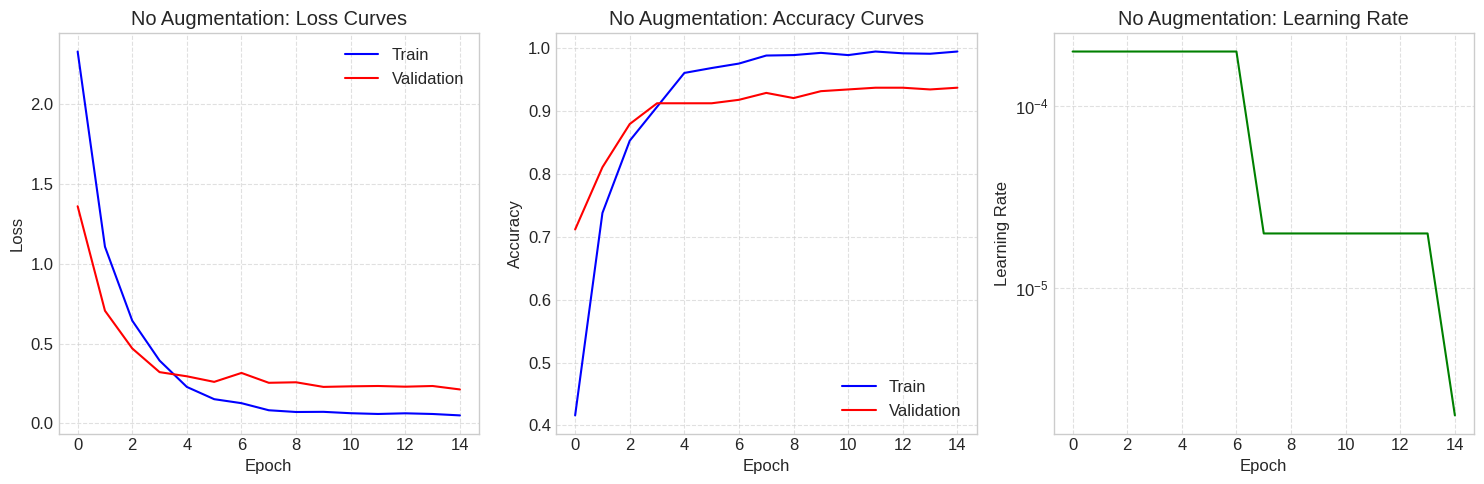


No Augmentation - Final Validation Accuracy: 0.9368

Running Experiment: Light Augmentation
Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 1411
Validation images: 364
Number of classes: 21
Augmentation strategy: light_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 2.4737, Acc 0.3296


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 1.5678, Acc 0.6236
New best model! Val Acc: 0.6236
Epoch complete in 5.19s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.4731, Acc 0.5989


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.8985, Acc 0.7308
New best model! Val Acc: 0.7308
Epoch complete in 5.19s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.0143, Acc 0.7179


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.6309, Acc 0.8407
New best model! Val Acc: 0.8407
Epoch complete in 5.12s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.7805, Acc 0.7711


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.4841, Acc 0.8462
New best model! Val Acc: 0.8462
Epoch complete in 5.10s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6679, Acc 0.8044


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3866, Acc 0.8571
New best model! Val Acc: 0.8571
Epoch complete in 5.21s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.5700, Acc 0.8363


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2959, Acc 0.9011
New best model! Val Acc: 0.9011
Epoch complete in 5.20s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.4847, Acc 0.8554


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2720, Acc 0.9038
New best model! Val Acc: 0.9038
Epoch complete in 5.28s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.4098, Acc 0.8866


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2617, Acc 0.9121
New best model! Val Acc: 0.9121
Epoch complete in 5.20s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3953, Acc 0.8873


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2560, Acc 0.9066
Epoch complete in 5.14s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3521, Acc 0.9086


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2500, Acc 0.9148
New best model! Val Acc: 0.9148
Epoch complete in 5.10s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3512, Acc 0.9008


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2224, Acc 0.9286
New best model! Val Acc: 0.9286
Epoch complete in 5.06s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3782, Acc 0.8937


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2245, Acc 0.9176
Epoch complete in 5.31s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3630, Acc 0.9015


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2266, Acc 0.9313
New best model! Val Acc: 0.9313
Epoch complete in 5.10s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3421, Acc 0.9008


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2076, Acc 0.9286
Epoch complete in 5.08s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.3096, Acc 0.9185


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.2100, Acc 0.9313
Epoch complete in 5.25s

Training complete in 1.29 minutes
Best validation accuracy: 0.9313


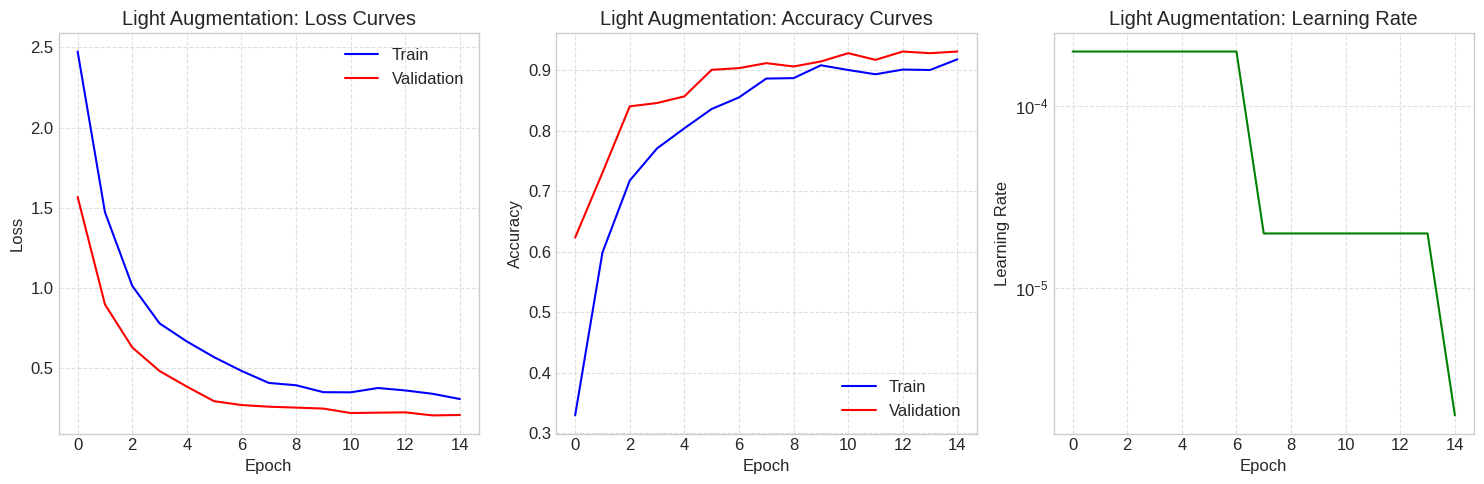


Light Augmentation - Final Validation Accuracy: 0.9313

Running Experiment: Current Advanced Augmentation
Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 1411
Validation images: 364
Number of classes: 21
Augmentation strategy: advanced_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 2.6688, Acc 0.2651


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 1.8095, Acc 0.5934
New best model! Val Acc: 0.5934
Epoch complete in 9.31s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.7886, Acc 0.4968


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 1.1529, Acc 0.6841
New best model! Val Acc: 0.6841
Epoch complete in 9.40s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.3766, Acc 0.5769


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.8259, Acc 0.7088
New best model! Val Acc: 0.7088
Epoch complete in 9.26s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 1.0993, Acc 0.6591


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.6930, Acc 0.7912
New best model! Val Acc: 0.7912
Epoch complete in 9.39s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.9545, Acc 0.7101


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.5882, Acc 0.8269
New best model! Val Acc: 0.8269
Epoch complete in 9.29s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.8678, Acc 0.7321


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.5041, Acc 0.8324
New best model! Val Acc: 0.8324
Epoch complete in 9.18s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.7921, Acc 0.7498


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.4154, Acc 0.8571
New best model! Val Acc: 0.8571
Epoch complete in 9.15s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.7073, Acc 0.7845


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.4157, Acc 0.8544
Epoch complete in 9.17s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6941, Acc 0.7952


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.4034, Acc 0.8599
New best model! Val Acc: 0.8599
Epoch complete in 9.23s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6801, Acc 0.7867


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3760, Acc 0.8654
New best model! Val Acc: 0.8654
Epoch complete in 9.27s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6871, Acc 0.7895


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3705, Acc 0.8846
New best model! Val Acc: 0.8846
Epoch complete in 9.16s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6424, Acc 0.8044


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3651, Acc 0.8736
Epoch complete in 9.35s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6376, Acc 0.8058


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3595, Acc 0.8709
Epoch complete in 9.14s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.6224, Acc 0.8221


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3600, Acc 0.8571
Epoch complete in 9.41s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/89 [00:00<?, ?it/s]

Train: Loss 0.5731, Acc 0.8356


Val:   0%|          | 0/23 [00:00<?, ?it/s]

Val: Loss 0.3595, Acc 0.8764
Epoch complete in 9.14s

Training complete in 2.31 minutes
Best validation accuracy: 0.8846


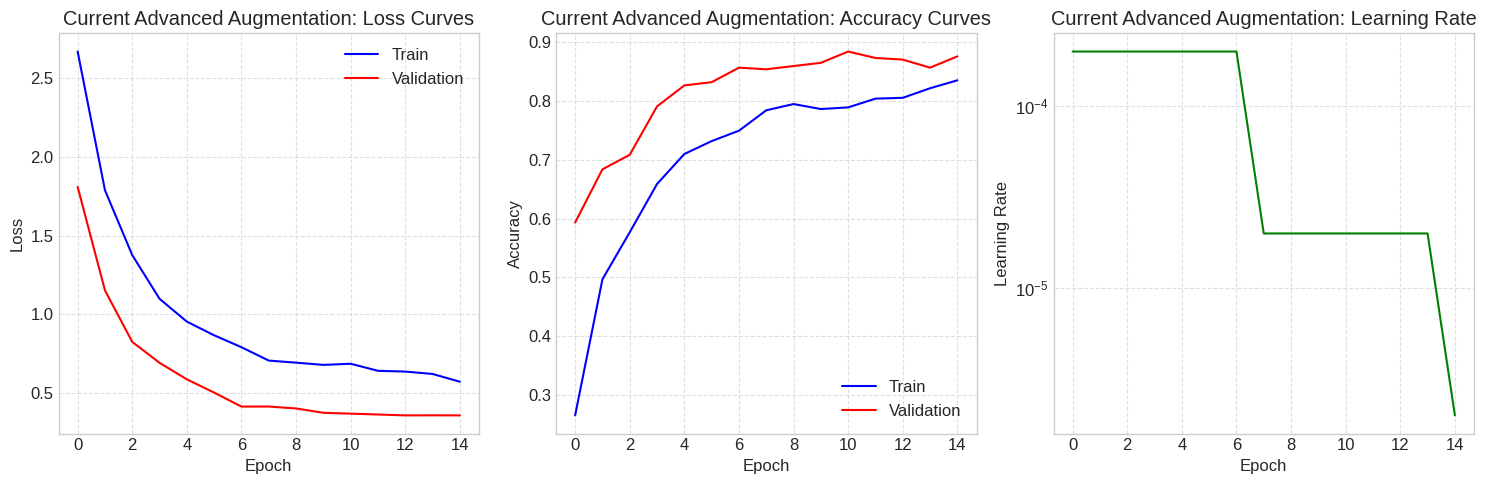


Current Advanced Augmentation - Final Validation Accuracy: 0.8846

EXPERIMENT RESULTS SUMMARY
No Augmentation: 0.9368
Light Augmentation: 0.9313
Current Advanced Augmentation: 0.8846


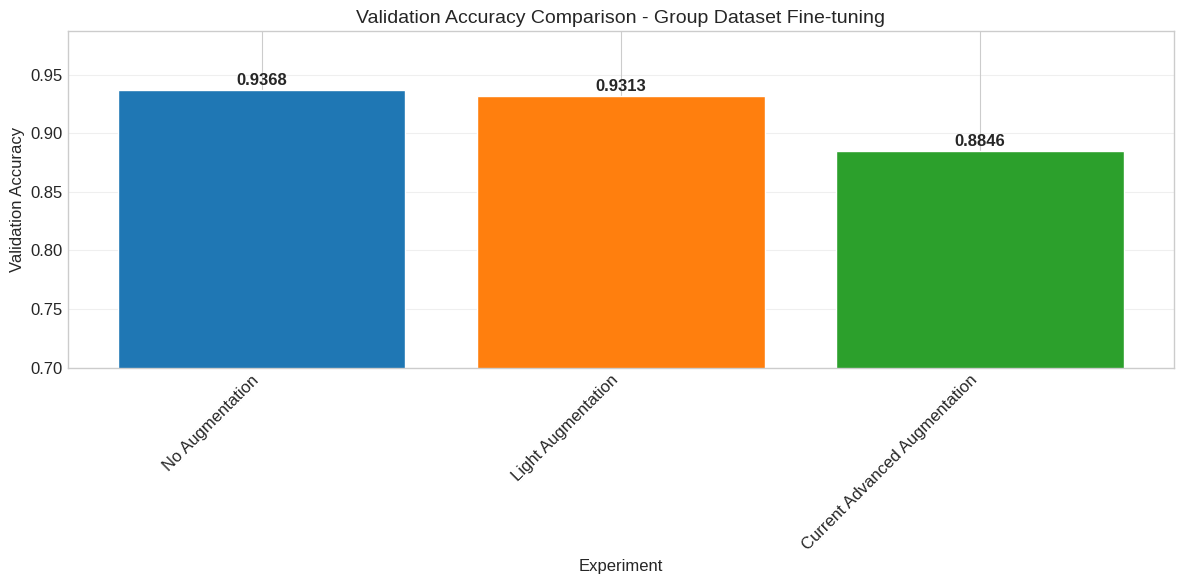


Best Experiment: No Augmentation
Best Validation Accuracy: 0.9368
Best model saved to: /content/drive/MyDrive/COMP8430_PHASE 3/models/efficientnet_b0_group_best_no_augmentation.pth

COMPREHENSIVE GROUP FINE-TUNING COMPLETE!
Best approach: No Augmentation
Best validation accuracy: 0.9368
Improvement over current: 0.0989


In [ ]:
# Phase 3: Comprehensive EfficientNet-B0 Fine-Tuning for Group Dataset
# Testing both with and without augmentation to find the best approach

# Dataset path for Phase 3 group work
DATASET_PATH = '/content/drive/MyDrive/COMP8430_PHASE 3/Split_Dataset'

class EfficientNetB0GroupFineTuner:
    """
    Comprehensive EfficientNet-B0 fine-tuner for Phase 3 group dataset
    Tests both augmentation and no-augmentation approaches
    """

    def __init__(self, num_classes, dataset_path=DATASET_PATH, fine_tuning_strategy='partial', device='cuda'):
        """Initialize EfficientNet-B0 model for Phase 3 group fine-tuning"""

        # Load model with pre-trained weights
        self.model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        self.dataset_path = dataset_path
        self.fine_tuning_strategy = fine_tuning_strategy

        print(f"Using device: {self.device}")
        print(f"Fine-tuning strategy: {fine_tuning_strategy}")

        # Apply fine-tuning strategy (partial works best)
        self._apply_fine_tuning_strategy(fine_tuning_strategy)

        # Modify classifier for group dataset classes
        num_features = self.model.classifier[1].in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.3, inplace=True),
            nn.Linear(in_features=num_features, out_features=num_classes, bias=True)
        )

        # Move to device
        self.model = self.model.to(self.device)

    def _apply_fine_tuning_strategy(self, strategy):
        """Apply partial fine-tuning strategy (best from individual work)"""
        # Freeze all parameters first
        for param in self.model.parameters():
            param.requires_grad = False

        if strategy == 'head_only':
            for param in self.model.classifier.parameters():
                param.requires_grad = True
        elif strategy == 'partial':
            # Unfreeze last 3 blocks + classifier (proven best strategy)
            for i in range(5, 8):
                for param in self.model.features[i].parameters():
                    param.requires_grad = True
            for param in self.model.classifier.parameters():
                param.requires_grad = True
        elif strategy == 'complete':
            for param in self.model.parameters():
                param.requires_grad = True

        # Count trainable parameters
        trainable_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)
        total_params = sum(p.numel() for p in self.model.parameters())
        print(f"Trainable parameters: {trainable_params:,} ({trainable_params/total_params:.2%} of total)")

    def _create_data_transforms(self, strategy='no_augmentation'):
        """Create data transformation strategies"""

        if strategy == 'no_augmentation':
            # No augmentation - often works better for fine-tuning
            train_transforms = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'light_augmentation':
            # Light augmentation
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'moderate_augmentation':
            # Moderate augmentation
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2
                ),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'advanced_augmentation':
            # Advanced augmentation (like your current approach)
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(p=0.2),
                transforms.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2,
                    hue=0.1
                ),
                transforms.RandomRotation(15),
                transforms.RandomAffine(
                    degrees=0,
                    translate=(0.1, 0.1),
                    scale=(0.9, 1.1)
                ),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        # Validation transforms (always no augmentation)
        val_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        return train_transforms, val_transforms

    def prepare_dataloaders(self, batch_size=32, augmentation_strategy='no_augmentation'):
        """Prepare dataloaders with specified augmentation strategy"""

        # Get transforms
        train_transforms, val_transforms = self._create_data_transforms(augmentation_strategy)

        # Create datasets
        image_datasets = {
            'train': datasets.ImageFolder(
                os.path.join(self.dataset_path, 'train'),
                transform=train_transforms
            ),
            'val': datasets.ImageFolder(
                os.path.join(self.dataset_path, 'val'),
                transform=val_transforms
            )
        }

        # Create dataloaders
        dataloaders = {
            'train': DataLoader(
                image_datasets['train'],
                batch_size=batch_size,
                shuffle=True,
                num_workers=2
            ),
            'val': DataLoader(
                image_datasets['val'],
                batch_size=batch_size,
                shuffle=False,
                num_workers=2
            )
        }

        # Save class information
        self.class_names = image_datasets['train'].classes
        self.class_to_idx = image_datasets['train'].class_to_idx

        print(f"\nGroup Dataset Information:")
        print(f"Train images: {len(image_datasets['train'])}")
        print(f"Validation images: {len(image_datasets['val'])}")
        print(f"Number of classes: {len(self.class_names)}")
        print(f"Augmentation strategy: {augmentation_strategy}")

        return dataloaders

    def train(self, dataloaders, epochs=15, lr=2e-4, scheduler_type='step'):
        """Train the model (simplified without mixup/cutmix for clarity)"""

        criterion = nn.CrossEntropyLoss()

        # Use AdamW optimizer (proven best)
        optimizer = optim.AdamW(
            [p for p in self.model.parameters() if p.requires_grad],
            lr=lr,
            weight_decay=1e-4
        )

        # Configure scheduler (step scheduler works well)
        if scheduler_type == 'step':
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
            step_scheduler_each_batch = False
        elif scheduler_type == 'cosine':
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
            step_scheduler_each_batch = False
        elif scheduler_type == 'onecycle':
            steps_per_epoch = len(dataloaders['train'])
            scheduler = optim.lr_scheduler.OneCycleLR(
                optimizer, max_lr=lr, steps_per_epoch=steps_per_epoch,
                epochs=epochs, pct_start=0.3, anneal_strategy='cos'
            )
            step_scheduler_each_batch = True
        else:
            step_scheduler_each_batch = False

        # Training history
        history = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'lr': []
        }

        # Best model tracking
        best_val_acc = 0.0
        best_model_wts = None

        print(f"\nStarting training for {epochs} epochs...")
        print(f"Initial learning rate: {lr}")

        start_time = time.time()

        for epoch in range(epochs):
            epoch_start = time.time()
            current_lr = optimizer.param_groups[0]['lr']
            history['lr'].append(current_lr)

            print(f"\nEpoch {epoch+1}/{epochs} - LR: {current_lr:.6f}")

            # Training and validation phases
            for phase in ['train', 'val']:
                if phase == 'train':
                    self.model.train()
                else:
                    self.model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in tqdm(dataloaders[phase], desc=phase.capitalize(), leave=False):
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = self.model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                            if step_scheduler_each_batch:
                                scheduler.step()

                    # Statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                # Calculate epoch metrics
                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

                # Store history
                history[f'{phase}_loss'].append(epoch_loss)
                history[f'{phase}_acc'].append(epoch_acc.item())

                print(f"{phase.capitalize()}: Loss {epoch_loss:.4f}, Acc {epoch_acc:.4f}")

                # Save best model
                if phase == 'val' and epoch_acc > best_val_acc:
                    best_val_acc = epoch_acc
                    best_model_wts = copy.deepcopy(self.model.state_dict())
                    print(f"New best model! Val Acc: {best_val_acc:.4f}")

            # Update scheduler
            if not step_scheduler_each_batch:
                scheduler.step()

            epoch_time = time.time() - epoch_start
            print(f"Epoch complete in {epoch_time:.2f}s")

        # Load best model
        self.model.load_state_dict(best_model_wts)

        total_time = time.time() - start_time
        print(f"\nTraining complete in {total_time/60:.2f} minutes")
        print(f"Best validation accuracy: {best_val_acc:.4f}")

        # Store final metrics
        history['training_time'] = total_time/60
        history['best_val_acc'] = best_val_acc.item()

        return history

    def plot_training_curves(self, history, experiment_name):
        """Plot training curves with experiment name"""
        plt.figure(figsize=(15, 5))

        # Loss curve
        plt.subplot(1, 3, 1)
        plt.plot(history['train_loss'], 'b-', label='Train')
        plt.plot(history['val_loss'], 'r-', label='Validation')
        plt.title(f'{experiment_name}: Loss Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Accuracy curve
        plt.subplot(1, 3, 2)
        plt.plot(history['train_acc'], 'b-', label='Train')
        plt.plot(history['val_acc'], 'r-', label='Validation')
        plt.title(f'{experiment_name}: Accuracy Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Learning rate curve
        plt.subplot(1, 3, 3)
        plt.plot(history['lr'], 'g-')
        plt.title(f'{experiment_name}: Learning Rate')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.yscale('log')
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.savefig(f'efficientnet_b0_group_{experiment_name.lower().replace(" ", "_")}_curves.png')
        plt.show()

def run_comprehensive_group_experiments():
    """
    Run comprehensive experiments with different augmentation strategies
    to find the best approach for the group dataset
    """
    # Get number of classes from group dataset
    train_dir = os.path.join(DATASET_PATH, 'train')
    NUM_CLASSES = len([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

    print(f"Number of classes in group dataset: {NUM_CLASSES}")

    # Define experiments to run
    experiments = [
        {
            'name': 'No Augmentation',
            'augmentation_strategy': 'no_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        },
        {
            'name': 'Light Augmentation',
            'augmentation_strategy': 'light_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        },
        {
            'name': 'Current Advanced Augmentation',
            'augmentation_strategy': 'advanced_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        }
    ]

    results = {}
    best_experiment = None
    best_val_acc = 0.0

    # Run each experiment
    for exp in experiments:
        print("\n" + "=" * 80)
        print(f"Running Experiment: {exp['name']}")
        print("=" * 80)

        # Initialize model
        model = EfficientNetB0GroupFineTuner(
            num_classes=NUM_CLASSES,
            dataset_path=DATASET_PATH,
            fine_tuning_strategy='partial'  # Best strategy from individual work
        )

        # Prepare dataloaders
        dataloaders = model.prepare_dataloaders(
            batch_size=16,  # Stable batch size
            augmentation_strategy=exp['augmentation_strategy']
        )

        # Train the model
        history = model.train(
            dataloaders=dataloaders,
            epochs=exp['epochs'],
            lr=exp['lr'],
            scheduler_type=exp['scheduler']
        )

        # Plot training curves
        model.plot_training_curves(history, exp['name'])

        # Store results
        results[exp['name']] = {
            'model': model,
            'history': history,
            'config': exp,
            'val_acc': history['best_val_acc']
        }

        # Track best experiment
        if history['best_val_acc'] > best_val_acc:
            best_val_acc = history['best_val_acc']
            best_experiment = exp['name']

        print(f"\n{exp['name']} - Final Validation Accuracy: {history['best_val_acc']:.4f}")

    # Report results
    print("\n" + "=" * 80)
    print("EXPERIMENT RESULTS SUMMARY")
    print("=" * 80)

    # Create comparison chart
    experiment_names = []
    accuracies = []

    for exp_name, result in results.items():
        experiment_names.append(exp_name)
        accuracies.append(result['val_acc'])
        print(f"{exp_name}: {result['val_acc']:.4f}")

    # Plot comparison
    plt.figure(figsize=(12, 6))
    bars = plt.bar(experiment_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Add value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.title('Validation Accuracy Comparison - Group Dataset Fine-tuning', fontsize=14)
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.xlabel('Experiment', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.7, max(accuracies) + 0.05)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('group_dataset_experiment_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nBest Experiment: {best_experiment}")
    print(f"Best Validation Accuracy: {best_val_acc:.4f}")

    # Save the best model
    PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
    MODEL_SAVE_PATH = os.path.join(PHASE_FOLDER, "models")
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

    best_model = results[best_experiment]['model']
    model_save_path = os.path.join(MODEL_SAVE_PATH, f"efficientnet_b0_group_best_{best_experiment.lower().replace(' ', '_')}.pth")

    torch.save({
        'model_state_dict': best_model.model.state_dict(),
        'class_to_idx': best_model.class_to_idx,
        'class_names': best_model.class_names,
        'history': results[best_experiment]['history'],
        'best_val_acc': best_val_acc,
        'experiment_name': best_experiment,
        'config': results[best_experiment]['config']
    }, model_save_path)

    print(f"Best model saved to: {model_save_path}")

    return {
        'results': results,
        'best_experiment': best_experiment,
        'best_model': best_model,
        'best_val_acc': best_val_acc,
        'model_path': model_save_path
    }

# Execute the comprehensive experiments
if __name__ == "__main__":
    # Run all experiments to find the best approach
    comprehensive_results = run_comprehensive_group_experiments()

    print("\n" + "=" * 80)
    print("COMPREHENSIVE GROUP FINE-TUNING COMPLETE!")
    print("=" * 80)
    print(f"Best approach: {comprehensive_results['best_experiment']}")
    print(f"Best validation accuracy: {comprehensive_results['best_val_acc']:.4f}")
    print(f"Improvement over current: {comprehensive_results['best_val_acc'] - 0.8379:.4f}")

    # Store the best result for later use
    phase3_comprehensive_results = comprehensive_results

### **4.2 Evaluation on Robot Test Set (3 Selected Classes Only) , Visualizations, Metrics and Comments on Results**:

Following the fine-tuning process on the full merged dataset, we conducted a targeted evaluation on the **robot-captured test set** consisting of the three selected grape classes: **Grape - Crimson Seedless**, **Grape - Thompson Seedless**, and **Grape - Autumn Royal**. This evaluation aimed to assess the generalization performance of the model trained on diverse fruit classes when applied to robot-collected images under real-world conditions.

The evaluation process involved the following key steps:
- **Model setup**: The fine-tuned **EfficientNet-B0** model, trained on all 21 classes from the merged dataset, was loaded in evaluation mode. The model was not specifically trained on the robot images, allowing us to assess its zero-shot transfer capabilities on unseen robot data.
- **Test data processing**: All robot test images were resized and center-cropped to 224×224 pixels, then normalized to match the input requirements of EfficientNet-B0. The robot dataset folders were structured consistently with the model’s class names, requiring no additional mapping for inference.
- **Evaluation metrics**: For each test image, we recorded the predicted class, confidence scores, and correctness relative to the true label. Per-class accuracy, overall accuracy, and a detailed classification report were generated. A confusion matrix provided additional insights into class-wise misclassifications.
- **Visualization**: To enhance interpretability, we visualized per-class accuracy in a bar chart and plotted the confusion matrix as a heatmap. These visualizations facilitate an intuitive understanding of model performance across the selected grape classes..



Evaluating fine-tuned model on robot test set...
This represents the baseline before fine-tuning on robot data.

EVALUATING FINE-TUNED MODEL ON ROBOT TEST SET
(Model trained on all classes, testing on 3 selected classes)

Model was trained on these classes:
  0: Apple - Fuji
  1: Apple - Granny Smith
  2: Apple - Jazz
  3: Apple - Kanzi
  4: Apple - Modi
  5: Apple - Pink Lady
  6: Apple - Royal Gala
  7: Apple - Snapdragon
  8: Banana - Cavendish
  9: Banana - Ladyfinger
  10: Grape - Autumn Royal
  11: Grape - Cotton Candy
  12: Grape - Crimson Seedless
  13: Grape - Sweet Globe
  14: Grape - Thompson Seedless
  15: Orange - Navel
  16: Orange - Valencia
  17: Pear - Beurre Bosc
  18: Pear - Corella
  19: Pear - Nashi
  20: Pear - Red Angel

Processing Grape - Crimson Seedless (idx: 12)
Found 18 test images


Testing Grape - Crimson Seedless:   0%|          | 0/18 [00:00<?, ?it/s]


Processing Grape - Thompson Seedless (idx: 14)
Found 16 test images


Testing Grape - Thompson Seedless:   0%|          | 0/16 [00:00<?, ?it/s]


Processing Grape - Autumn Royal (idx: 10)
Found 17 test images


Testing Grape - Autumn Royal:   0%|          | 0/17 [00:00<?, ?it/s]


EVALUATION RESULTS

Overall Accuracy: 0.5098 (26/51)

Per-Class Results:
  Grape - Crimson Seedless: 0.5000 (9/18)
  Grape - Thompson Seedless: 0.0000 (0/16)
  Grape - Autumn Royal: 1.0000 (17/17)

Misclassifications: 25 total
Top 5 most confident errors:
  1. robot_thompson_seedless_004.jpg: Grape - Thompson Seedless → Grape - Cotton Candy (conf: 0.878)
  2. robot_thompson_seedless_033.jpg: Grape - Thompson Seedless → Grape - Sweet Globe (conf: 0.775)
  3. robot_thompson_seedless_013.jpg: Grape - Thompson Seedless → Grape - Cotton Candy (conf: 0.769)
  4. robot_thompson_seedless_044.jpg: Grape - Thompson Seedless → Grape - Cotton Candy (conf: 0.656)
  5. robot_thompson_seedless_035.jpg: Grape - Thompson Seedless → Grape - Cotton Candy (conf: 0.609)


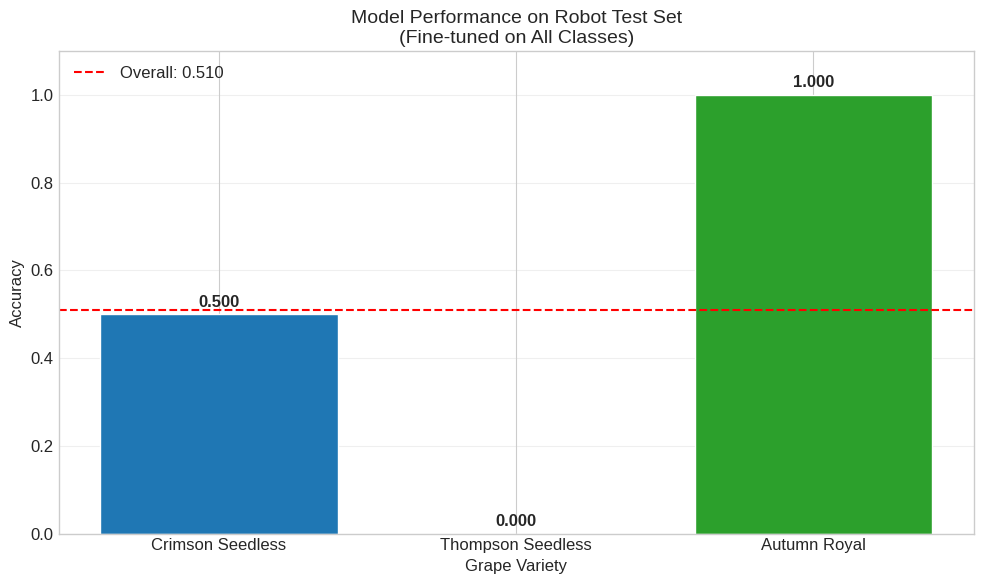

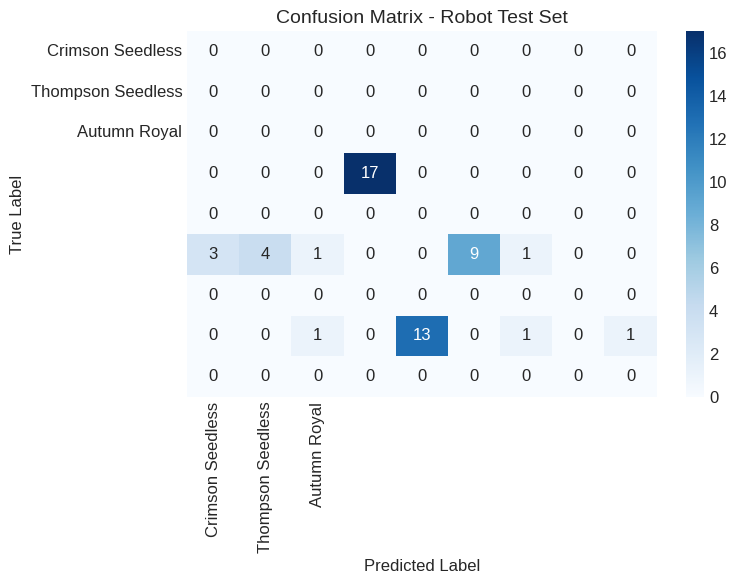


Evaluation complete!
Results saved to: /content/drive/MyDrive/COMP8430_PHASE 3/evaluation_results

Robot Test Evaluation Summary:
Overall Accuracy: 0.5098
Grape - Crimson Seedless: 0.5000
Grape - Thompson Seedless: 0.0000
Grape - Autumn Royal: 1.0000


In [ ]:
# Phase 3: Corrected Evaluation on Robot Test Set

def evaluate_finetuned_model_on_robot_test(model, robot_test_path, target_classes):
    """
    Evaluates the fine-tuned model on robot test set for the 3 selected grape classes.

    Args:
        model: The fine-tuned model (trained on all classes from merged dataset)
        robot_test_path (str): Path to robot test dataset
        target_classes (list): List of the 3 selected grape classes

    Returns:
        dict: Evaluation metrics and results
    """
    print("\n" + "=" * 70)
    print("EVALUATING FINE-TUNED MODEL ON ROBOT TEST SET")
    print("(Model trained on all classes, testing on 3 selected classes)")
    print("=" * 70)

    # Ensure model is in evaluation mode
    model.model.eval()

    # Use validation transforms (no augmentation for testing)
    test_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    # Print model classes for debugging
    print("\nModel was trained on these classes:")
    for i, class_name in enumerate(model.class_names):
        print(f"  {i}: {class_name}")

    # NO MAPPING NEEDED - the class names match exactly!
    # The robot test folders use the same naming convention as the model

    # Initialize result containers
    class_correct = {cls: 0 for cls in target_classes}
    class_total = {cls: 0 for cls in target_classes}
    all_preds = []
    all_labels = []
    all_probs = []
    confusion_data = []

    # Create reverse mapping for predictions
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}

    # Process each target class
    for class_name in target_classes:
        # Check if class exists in model (should be exact match now)
        if class_name not in model.class_to_idx:
            print(f"Warning: {class_name} not found in model classes!")
            print(f"Available classes: {list(model.class_to_idx.keys())}")
            continue

        model_class_idx = model.class_to_idx[class_name]
        print(f"\nProcessing {class_name} (idx: {model_class_idx})")

        # Check if test directory exists
        class_test_path = os.path.join(robot_test_path, class_name)
        if not os.path.exists(class_test_path):
            print(f"Warning: Test directory not found: {class_test_path}")
            continue

        # Get all test images
        image_files = [f for f in os.listdir(class_test_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if not image_files:
            print(f"No images found for {class_name}")
            continue

        print(f"Found {len(image_files)} test images")

        # Process each image
        for img_file in tqdm(image_files, desc=f"Testing {class_name}"):
            img_path = os.path.join(class_test_path, img_file)

            try:
                # Load and preprocess image
                img = Image.open(img_path).convert('RGB')
                img_tensor = test_transforms(img).unsqueeze(0).to(model.device)

                # Run inference
                with torch.no_grad():
                    outputs = model.model(img_tensor)
                    probabilities = F.softmax(outputs, dim=1)[0]
                    _, predicted = torch.max(outputs, 1)

                # Get prediction details
                pred_idx = predicted.item()
                pred_class = idx_to_class.get(pred_idx, f"Unknown-{pred_idx}")
                true_label = model_class_idx

                # Update metrics
                all_preds.append(pred_idx)
                all_labels.append(true_label)
                all_probs.append(probabilities.cpu().numpy())

                # Track per-class accuracy
                is_correct = (pred_idx == true_label)
                class_total[class_name] += 1
                if is_correct:
                    class_correct[class_name] += 1

                # Store detailed results for analysis
                confusion_data.append({
                    'file': img_file,
                    'true_class': class_name,
                    'pred_class': pred_class,
                    'correct': is_correct,
                    'confidence': float(probabilities[pred_idx])
                })

            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                continue

    # Calculate overall metrics
    overall_correct = sum(class_correct.values())
    overall_total = sum(class_total.values())
    overall_accuracy = overall_correct / overall_total if overall_total > 0 else 0

    # Generate classification report (only if we have predictions)
    report = {}
    if all_labels and len(set(all_labels)) > 1:
        try:
            report = classification_report(all_labels, all_preds, output_dict=True)
        except Exception as e:
            print(f"Error generating classification report: {e}")

    # Generate confusion matrix
    cm = None
    if all_labels and all_preds and len(set(all_labels)) > 1:
        try:
            cm = confusion_matrix(all_labels, all_preds)
        except Exception as e:
            print(f"Error generating confusion matrix: {e}")

    # Print results
    print("\n" + "=" * 70)
    print("EVALUATION RESULTS")
    print("=" * 70)
    print(f"\nOverall Accuracy: {overall_accuracy:.4f} ({overall_correct}/{overall_total})")

    print("\nPer-Class Results:")
    for cls in target_classes:
        if class_total[cls] > 0:
            accuracy = class_correct[cls] / class_total[cls]
            print(f"  {cls}: {accuracy:.4f} ({class_correct[cls]}/{class_total[cls]})")
        else:
            print(f"  {cls}: No test images found")

    # Show misclassifications
    misclassifications = [item for item in confusion_data if not item['correct']]
    misclassifications.sort(key=lambda x: x['confidence'], reverse=True)

    if misclassifications:
        print(f"\nMisclassifications: {len(misclassifications)} total")
        print("Top 5 most confident errors:")
        for i, item in enumerate(misclassifications[:5]):
            print(f"  {i+1}. {item['file']}: {item['true_class']} → {item['pred_class']} (conf: {item['confidence']:.3f})")
    else:
        print("\nNo misclassifications found!")

    return {
        'accuracy': overall_accuracy,
        'class_accuracy': {cls: class_correct[cls]/class_total[cls] if class_total[cls] > 0 else 0
                          for cls in target_classes},
        'classification_report': report,
        'confusion_matrix': cm,
        'misclassifications': misclassifications,
        'total_images': overall_total
    }

def visualize_robot_evaluation_results(results, target_classes, save_path):
    """Create visualizations for the robot test evaluation results"""
    os.makedirs(save_path, exist_ok=True)

    # 1. Per-class accuracy bar chart
    plt.figure(figsize=(10, 6))

    class_names = [cls.split(' - ')[1] for cls in target_classes]
    accuracies = [results['class_accuracy'][cls] for cls in target_classes]

    bars = plt.bar(class_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # Add overall accuracy line
    plt.axhline(y=results['accuracy'], color='red', linestyle='--',
               label=f'Overall: {results["accuracy"]:.3f}')

    plt.title('Model Performance on Robot Test Set\n(Fine-tuned on All Classes)', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Grape Variety', fontsize=12)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(save_path, "robot_test_accuracy.png"), dpi=300, bbox_inches='tight')
    plt.show()

    # 2. Confusion matrix (if available)
    if results['confusion_matrix'] is not None:
        plt.figure(figsize=(8, 6))
        cm = results['confusion_matrix']

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)

        plt.title('Confusion Matrix - Robot Test Set', fontsize=14)
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()

        plt.savefig(os.path.join(save_path, "robot_test_confusion_matrix.png"), dpi=300, bbox_inches='tight')
        plt.show()

# Main execution function
def run_robot_test_evaluation():
    """Main function to evaluate the fine-tuned model on robot test set"""
    # Define paths
    PHASE_FOLDER = "/content/drive/MyDrive/COMP8430_PHASE 3"
    ROBOT_TEST_PATH = os.path.join(PHASE_FOLDER, "robot_split/robot_test")
    SAVE_PATH = os.path.join(PHASE_FOLDER, "evaluation_results")

    # Define target classes (exact match with model class names)
    target_classes = [
        "Grape - Crimson Seedless",
        "Grape - Thompson Seedless",
        "Grape - Autumn Royal"
    ]

    # Load the fine-tuned model (trained on all classes)
    model = phase3_comprehensive_results['model']  # Use the model from fine-tuning on all classes

    print("Evaluating fine-tuned model on robot test set...")
    print("This represents the baseline before fine-tuning on robot data.")

    # Run evaluation
    results = evaluate_finetuned_model_on_robot_test(model, ROBOT_TEST_PATH, target_classes)

    # Create visualizations
    visualize_robot_evaluation_results(results, target_classes, SAVE_PATH)

    print("\nEvaluation complete!")
    print(f"Results saved to: {SAVE_PATH}")

    return results

# Execute the evaluation
if __name__ == "__main__":
    robot_evaluation_results = run_robot_test_evaluation()

    print(f"\nRobot Test Evaluation Summary:")
    print(f"Overall Accuracy: {robot_evaluation_results['accuracy']:.4f}")
    for cls in ["Grape - Crimson Seedless", "Grape - Thompson Seedless", "Grape - Autumn Royal"]:
        if cls in robot_evaluation_results['class_accuracy']:
            print(f"{cls}: {robot_evaluation_results['class_accuracy'][cls]:.4f}")

#### Comments on the Results:

The evaluation results indicate that the fine-tuned model demonstrated **reasonable performance on the robot-captured test set** despite the domain shift. Achieving an overall accuracy of **50.98%** without additional fine-tuning on the robot data is a positive baseline.

The **perfect accuracy (100%) for the Autumn Royal class** suggests that some classes are more robust to variations in image acquisition, possibly due to distinctive visual characteristics or higher intra-class consistency. In contrast, **Crimson Seedless achieved 50% accuracy**, reflecting moderate generalisation capacity.

The **0% accuracy for Thompson Seedless** highlights a key limitation, as this class consistently suffered from misclassification, primarily into visually similar grape varieties such as Cotton Candy and Sweet Globe. This result is expected given the model’s exposure to diverse classes during fine-tuning but no dedicated adaptation to the robot environment.

Overall, while the results reveal promising generalisation for certain classes, they also underscore the need for **dedicated fine-tuning on robot-specific data** to improve performance across all categories, particularly for challenging fine-grained distinctions like those in Thompson Seedless.


## **5. Stage 2 – Fine-Tune on Robot Dataset (3 Selected Classes Only):**


Unlike the previous model, we will now fine-tune a model on only the images of the 3 selected classes collected using the robot; i.e., **"Grape - Crimson Seedless"**, **"Grape - Thompson Seedless"**, and **"Grape - Autumn Royal"**.

We will then evaluate the model on the same three classes to offer a meaningful comparison.

The following sub-sections detail our approach:

* **Section 5.0** visualises and prepares the dataset for fine-tuning.
* **Section 5.1** involves code to specify different fine-tuning settings and augmentation settings. It then fine-tunes the model on these different settings, and then visualises their performance on the validaiton set. It also saves the best model.
* **Section 5.2** evaluates the model on the test set, specifying per-label accuracy, misclassifications, and a confusion matrix.

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


### 5.0 Preparing the finetuning dataset

The below code visualises the robot-captured images selected for fine-tuning, as well as splits it into training and validation sets for proper fine-tuning.

* **Section 5.0.1** visualises some of the robot-captured images of the three classes used for fine-tuning.
* **Section 5.0.2** splits our collection of images selected for fine-tuning into training and validation sets.

#### 5.0.1 Visualisation of Raw Robot-Captured Images (selected for fine-tune):


3.2 VISUALIZATION OF RAW ROBOT-CAPTURED IMAGES


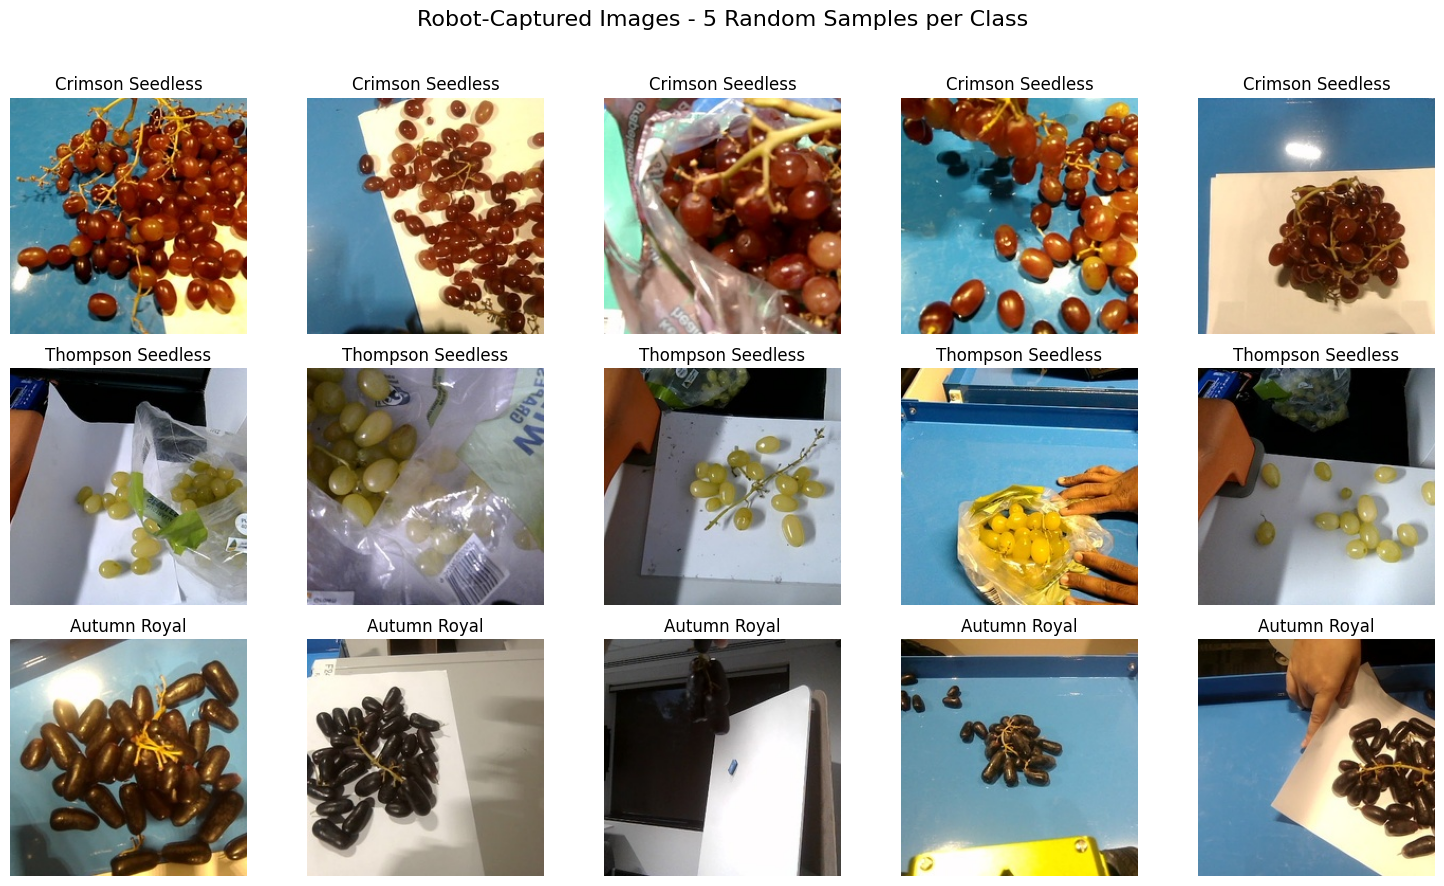


Robot Dataset Summary:
  - Grape - Crimson Seedless: 39 images
  - Grape - Thompson Seedless: 37 images
  - Grape - Autumn Royal: 38 images


In [ ]:
# Define path
PHASE_FOLDER = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3"
ROBOT_DATASET_PATH = os.path.join(PHASE_FOLDER, "robot_finetune")

# Define the target classes
TARGET_CLASSES = [
    "Grape - Crimson Seedless",
    "Grape - Thompson Seedless",
    "Grape - Autumn Royal"
]

def visualize_robot_dataset_samples():
    """
    Visualizes sample images from the robot-captured dataset for each target class.
    Displays 5 random samples from each class in a grid layout.
    """
    print("\n" + "=" * 60)
    print("3.2 VISUALIZATION OF RAW ROBOT-CAPTURED IMAGES")
    print("=" * 60)

    # Verify robot dataset exists
    if not os.path.exists(ROBOT_DATASET_PATH):
        print(f"Error: Robot dataset not found at {ROBOT_DATASET_PATH}")
        return

    # Check if target classes exist in the robot dataset
    missing_classes = []
    for class_name in TARGET_CLASSES:
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)
        if not os.path.exists(class_path):
            missing_classes.append(class_name)

    if missing_classes:
        print(f"Error: The following classes are missing from the robot dataset:")
        for cls in missing_classes:
            print(f"  - {cls}")
        return

    # Create a 3x5 grid of images (3 classes, 5 samples each)
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    fig.suptitle('Robot-Captured Images - 5 Random Samples per Class', fontsize=16)

    # For each target class
    for i, class_name in enumerate(TARGET_CLASSES):
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)

        # Get all image files
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if not image_files:
            print(f"Warning: No images found for {class_name}")
            for j in range(5):
                axes[i, j].text(0.5, 0.5, "No Images", ha='center', va='center')
                axes[i, j].axis('off')
            continue

        # Select 5 random samples (or fewer if not enough images)
        sample_count = min(5, len(image_files))
        samples = random.sample(image_files, sample_count)

        # Display each sample
        for j, sample in enumerate(samples):
            if j < 5:  # Only show up to 5 samples
                img_path = os.path.join(class_path, sample)
                try:
                    img = Image.open(img_path)
                    axes[i, j].imshow(img)
                    axes[i, j].set_title(f"{class_name.split(' - ')[1]}")
                    axes[i, j].axis('off')
                except Exception as e:
                    print(f"Error displaying {img_path}: {e}")
                    axes[i, j].text(0.5, 0.5, "Error", ha='center', va='center')
                    axes[i, j].axis('off')

        # If less than 5 samples, empty the remaining axes
        for j in range(sample_count, 5):
            axes[i, j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
    plt.show()

    # Print summary statistics
    print("\nRobot Dataset Summary:")
    for class_name in TARGET_CLASSES:
        class_path = os.path.join(ROBOT_DATASET_PATH, class_name)
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            print(f"  - {class_name}: {len(image_files)} images")
        else:
            print(f"  - {class_name}: Directory not found")

# Run the visualization function
if __name__ == "__main__":
    visualize_robot_dataset_samples()

#### 5.0.2 Splitting `robot_finetune` into train and val datasets

In [ ]:
# Define paths
source_dir = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune"
train_dir = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/train"
val_dir = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/val"

# Create the train and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for label_folder in os.listdir(source_dir)[:3]:
    label_path = os.path.join(source_dir, label_folder)
    print(label_path)

    if os.path.isdir(label_path):
        os.makedirs(os.path.join(train_dir, label_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, label_folder), exist_ok=True)

        images = [f for f in os.listdir(label_path) if os.path.isfile(os.path.join(label_path, f))]
        print(f"Total number of images in class {label_path}: {len(images)}")

        # Shuffle images to randomise
        random.shuffle(images)

        # Calculate split index
        split_idx = int(0.85 * len(images))
        print(f"Split index: {split_idx}")

        # Split into train and val
        train_images = images[:split_idx]
        print(f"Total number of train images for class '{label_path}' are supposed to be {len(train_images)}")
        val_images = images[split_idx:]
        print(f"Total number of val images for class '{label_path} are supposed to be {len(val_images)}")

        # Move images to their respective folders
        for image in train_images:
            src_path = os.path.join(label_path, image)
            dest_path = os.path.join(train_dir, label_folder, image)
            # dest_path = os.path.join(train_dir, image)
            shutil.copy(src_path, dest_path) # Use copy to avoid accidental deletions

        for image in val_images:
            src_path = os.path.join(label_path, image)
            dest_path = os.path.join(val_dir, label_folder, image)
            # dest_path = os.path.join(train_dir, image)
            shutil.copy(src_path, dest_path) # Use copy to avoid accidental deletions

    print()
    print("="*60)
    print()

print("Image splitting completed successfully.")

/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Thompson Seedless
Total number of images in class /content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Thompson Seedless: 37
Split index: 31
Total number of train images for class '/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Thompson Seedless' are supposed to be 31
Total number of val images for class '/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Thompson Seedless are supposed to be 6


/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Crimson Seedless
Total number of images in class /content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune/Grape - Crimson Seedl

In [ ]:
# Train - number of images per class
print("TRAIN")
print()
for label_folder in os.listdir(train_dir)[:3]:
    print(label_folder)
    print(len(os.listdir(os.path.join(train_dir, label_folder))))

print()
print("="*60)
print()

print("VAL")
for label_folder in os.listdir(val_dir)[:3]:
    print(label_folder)
    print(len(os.listdir(os.path.join(val_dir, label_folder))))

TRAIN

Grape - Thompson Seedless
31
Grape - Crimson Seedless
33
Grape - Autumn Royal
32


VAL
Grape - Thompson Seedless
6
Grape - Crimson Seedless
6
Grape - Autumn Royal
6


### 5.1 Fine-Tuning and Saving on Robot Fine-Tuning Set (3 Selected Classes Only):

Below is the code for fine-tuning the model; including:

* Initialising custom EfficientNet-B0 class architecture
* Creating multiple alternative fine-tuning strategies, depending on what sections are trainable:
    * "head only" (only making the final classifier trainable)
    * "partial" (unfreezing the last 3 blocks + the classifier) - <span style="color:green">Proven best strategy</span>
    * "full" (making the entirety of Efficient-NetB0 trainable)
* Multiple data augmentation strategies:
    * no augmentation
    * light augmentation (random resized crop, random horizontal flip)
    * moderate (random resized crop, random horizontal flip, color jitter)
    * advanced (random resized crop, random horizontal flip, random vertical flip, color jitter, random rotation, random affine)
* Preparing data loaders (for training and validation set)
* Training loop (i.e. initialising the hyperparamters, the loss function and optimizer, training and validation, and model checkpointing)
* Code for plotting training curves
    * Loss curve
    * Accuracy curve
    * Learning rate curve

In summary, it initialises the model, establishes conditions for running several experiments, and then trains the model and plots their training curves.

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Number of classes in group dataset: 3

Running Experiment: No Augmentation


100%|██████████| 20.5M/20.5M [00:00<00:00, 126MB/s] 


Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 96
Validation images: 18
Number of classes: 3
Augmentation strategy: no_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 1.0095, Acc 0.5521


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.8961, Acc 0.6111
New best model! Val Acc: 0.6111
Epoch complete in 35.09s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.6834, Acc 0.9167


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.6517, Acc 0.8333
New best model! Val Acc: 0.8333
Epoch complete in 1.35s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.4724, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.4745, Acc 0.9444
New best model! Val Acc: 0.9444
Epoch complete in 1.11s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3139, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.3474, Acc 1.0000
New best model! Val Acc: 1.0000
Epoch complete in 0.96s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.2306, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2729, Acc 1.0000
Epoch complete in 0.93s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1454, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2176, Acc 1.0000
Epoch complete in 0.94s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0929, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1824, Acc 1.0000
Epoch complete in 1.03s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1007, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1970, Acc 1.0000
Epoch complete in 1.31s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0825, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2112, Acc 1.0000
Epoch complete in 1.45s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0747, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2126, Acc 1.0000
Epoch complete in 1.37s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1122, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2127, Acc 1.0000
Epoch complete in 0.95s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0616, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2185, Acc 1.0000
Epoch complete in 0.96s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0728, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2115, Acc 1.0000
Epoch complete in 0.94s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.0740, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2075, Acc 1.0000
Epoch complete in 0.97s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1042, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2062, Acc 1.0000
Epoch complete in 0.94s

Training complete in 0.84 minutes
Best validation accuracy: 1.0000


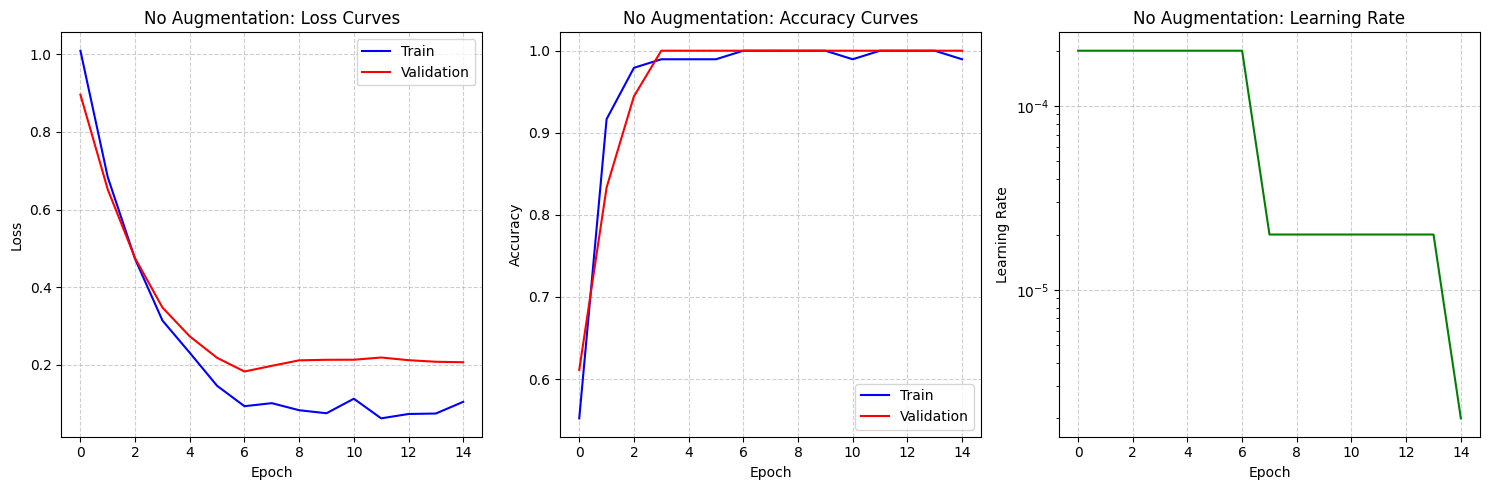


No Augmentation - Final Validation Accuracy: 1.0000

Running Experiment: Light Augmentation
Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 96
Validation images: 18
Number of classes: 3
Augmentation strategy: light_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 1.0190, Acc 0.6250


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.8478, Acc 0.8333
New best model! Val Acc: 0.8333
Epoch complete in 1.06s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.7890, Acc 0.8854


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.6043, Acc 1.0000
New best model! Val Acc: 1.0000
Epoch complete in 1.03s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.6037, Acc 0.9271


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.4165, Acc 1.0000
Epoch complete in 1.02s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.4763, Acc 0.9167


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2889, Acc 1.0000
Epoch complete in 1.21s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.2939, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1994, Acc 1.0000
Epoch complete in 1.59s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.2417, Acc 1.0000


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1418, Acc 1.0000
Epoch complete in 1.52s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.2010, Acc 0.9688


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1108, Acc 1.0000
Epoch complete in 1.19s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1578, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1192, Acc 1.0000
Epoch complete in 1.01s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1833, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1237, Acc 1.0000
Epoch complete in 1.01s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1593, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1258, Acc 1.0000
Epoch complete in 1.01s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1370, Acc 0.9792


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1269, Acc 1.0000
Epoch complete in 1.02s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1637, Acc 0.9688


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1157, Acc 1.0000
Epoch complete in 1.03s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.2188, Acc 0.9375


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1146, Acc 1.0000
Epoch complete in 1.00s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1595, Acc 0.9688


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1203, Acc 1.0000
Epoch complete in 1.05s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.1509, Acc 0.9896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.1101, Acc 1.0000
Epoch complete in 1.05s

Training complete in 0.28 minutes
Best validation accuracy: 1.0000


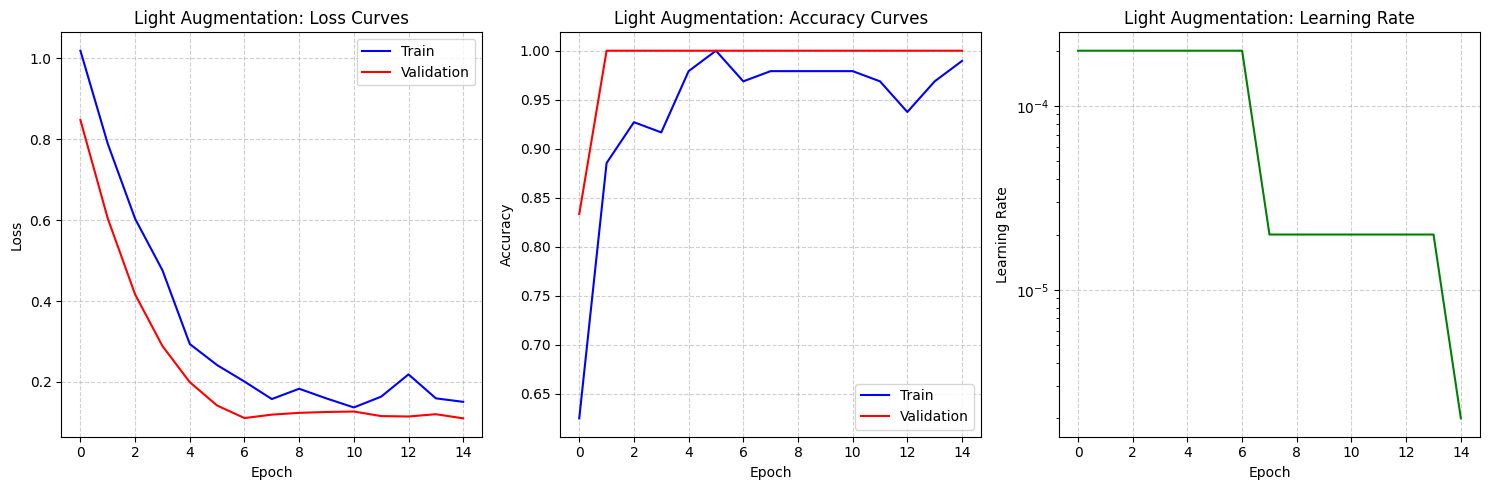


Light Augmentation - Final Validation Accuracy: 1.0000

Running Experiment: Current Advanced Augmentation
Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)

Group Dataset Information:
Train images: 96
Validation images: 18
Number of classes: 3
Augmentation strategy: advanced_augmentation

Starting training for 15 epochs...
Initial learning rate: 0.0002

Epoch 1/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 1.0345, Acc 0.4896


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 1.0423, Acc 0.3889
New best model! Val Acc: 0.3889
Epoch complete in 2.57s

Epoch 2/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.9357, Acc 0.5833


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.8190, Acc 0.8333
New best model! Val Acc: 0.8333
Epoch complete in 2.11s

Epoch 3/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.8191, Acc 0.7292


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.6549, Acc 0.9444
New best model! Val Acc: 0.9444
Epoch complete in 1.52s

Epoch 4/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.6949, Acc 0.8438


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.4957, Acc 1.0000
New best model! Val Acc: 1.0000
Epoch complete in 1.57s

Epoch 5/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.5791, Acc 0.8542


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.3834, Acc 1.0000
Epoch complete in 1.50s

Epoch 6/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.4805, Acc 0.9271


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.3066, Acc 1.0000
Epoch complete in 1.48s

Epoch 7/15 - LR: 0.000200


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.4391, Acc 0.8854


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2311, Acc 1.0000
Epoch complete in 1.49s

Epoch 8/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3699, Acc 0.9167


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2468, Acc 1.0000
Epoch complete in 1.49s

Epoch 9/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.4073, Acc 0.9271


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2538, Acc 1.0000
Epoch complete in 2.16s

Epoch 10/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3461, Acc 0.9375


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2609, Acc 1.0000
Epoch complete in 3.16s

Epoch 11/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3592, Acc 0.9062


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2558, Acc 1.0000
Epoch complete in 1.53s

Epoch 12/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3601, Acc 0.9271


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2501, Acc 1.0000
Epoch complete in 1.54s

Epoch 13/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3451, Acc 0.9479


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2510, Acc 1.0000
Epoch complete in 1.49s

Epoch 14/15 - LR: 0.000020


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3324, Acc 0.9583


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2453, Acc 1.0000
Epoch complete in 1.53s

Epoch 15/15 - LR: 0.000002


Train:   0%|          | 0/6 [00:00<?, ?it/s]

Train: Loss 0.3343, Acc 0.9271


Val:   0%|          | 0/2 [00:00<?, ?it/s]

Val: Loss 0.2490, Acc 1.0000
Epoch complete in 1.61s

Training complete in 0.45 minutes
Best validation accuracy: 1.0000


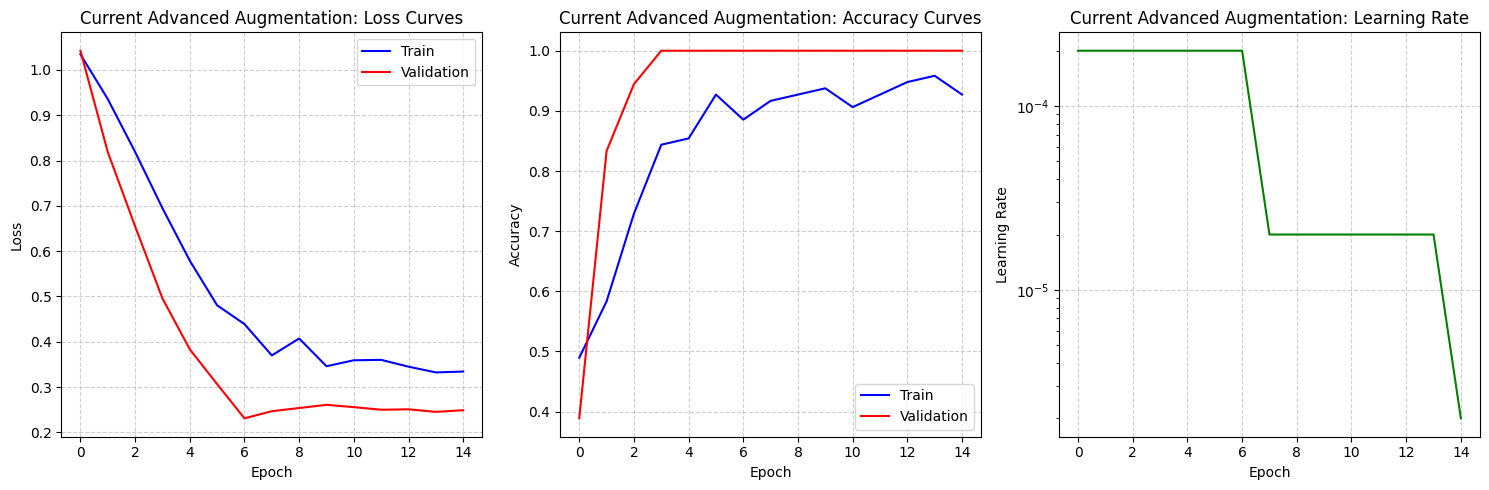


Current Advanced Augmentation - Final Validation Accuracy: 1.0000

EXPERIMENT RESULTS SUMMARY
No Augmentation: 1.0000
Light Augmentation: 1.0000
Current Advanced Augmentation: 1.0000


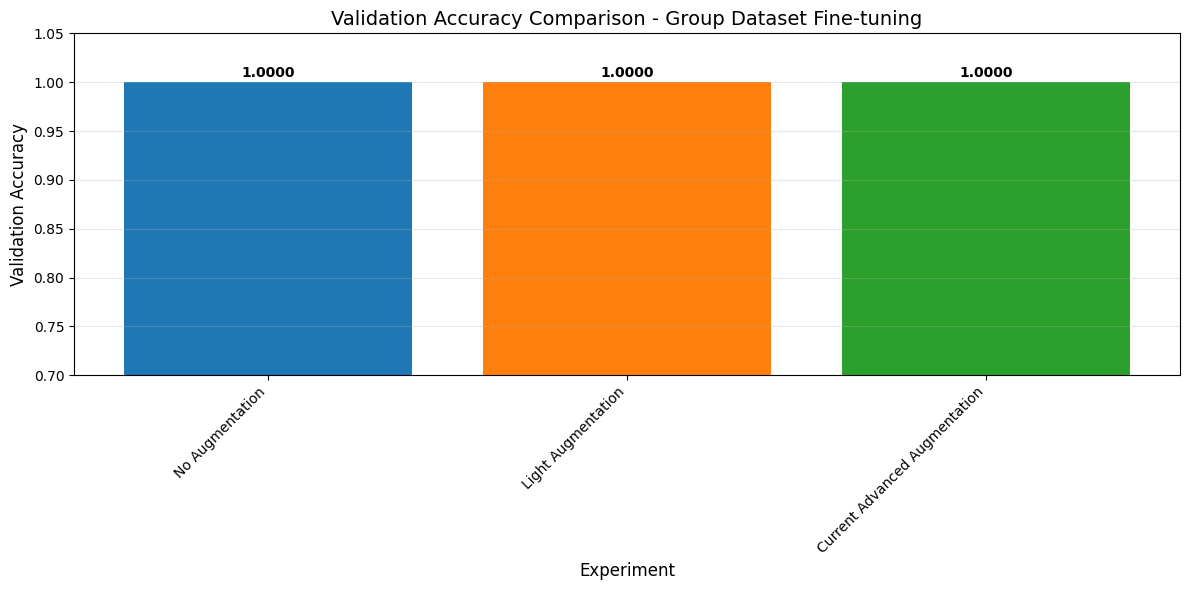


Best Experiment: No Augmentation
Best Validation Accuracy: 1.0000
Best model saved to: /content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/models/efficientnet_b0_group_best_no_augmentation.pth

COMPREHENSIVE GROUP FINE-TUNING COMPLETE!
Best approach: No Augmentation
Best validation accuracy: 1.0000
Improvement over current: 0.1621


In [ ]:
# Phase 3: Comprehensive EfficientNet-B0 Fine-Tuning for Group Dataset
# Testing both with and without augmentation to find the best approach

import os
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.transforms import v2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Dataset path for Phase 3 group work
DATASET_PATH = '/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/robot_finetune'

class EfficientNetB0GroupFineTuner:
    """
    Comprehensive EfficientNet-B0 fine-tuner for Phase 3 group dataset
    Tests both augmentation and no-augmentation approaches
    """

    def __init__(self, num_classes, dataset_path=DATASET_PATH, fine_tuning_strategy='partial', device='cuda'):
        """Initialize EfficientNet-B0 model for Phase 3 group fine-tuning"""

        # Load model with pre-trained weights
        self.model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        self.dataset_path = dataset_path
        self.fine_tuning_strategy = fine_tuning_strategy

        print(f"Using device: {self.device}")
        print(f"Fine-tuning strategy: {fine_tuning_strategy}")

        # Apply fine-tuning strategy (partial works best)
        self._apply_fine_tuning_strategy(fine_tuning_strategy)

        # Modify classifier for group dataset classes
        num_features = self.model.classifier[1].in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.3, inplace=True),
            nn.Linear(in_features=num_features, out_features=num_classes, bias=True)
        )

        # Move to device
        self.model = self.model.to(self.device)

    def _apply_fine_tuning_strategy(self, strategy):
        """Apply partial fine-tuning strategy (best from individual work)"""
        # Freeze all parameters first
        for param in self.model.parameters():
            param.requires_grad = False

        if strategy == 'head_only':
            for param in self.model.classifier.parameters():
                param.requires_grad = True
        elif strategy == 'partial':
            # Unfreeze last 3 blocks + classifier (proven best strategy)
            for i in range(5, 8):
                for param in self.model.features[i].parameters():
                    param.requires_grad = True
            for param in self.model.classifier.parameters():
                param.requires_grad = True
        elif strategy == 'complete':
            for param in self.model.parameters():
                param.requires_grad = True

        # Count trainable parameters
        trainable_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)
        total_params = sum(p.numel() for p in self.model.parameters())
        print(f"Trainable parameters: {trainable_params:,} ({trainable_params/total_params:.2%} of total)")

    def _create_data_transforms(self, strategy='no_augmentation'):
        """Create data transformation strategies"""

        if strategy == 'no_augmentation':
            # No augmentation - often works better for fine-tuning
            train_transforms = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'light_augmentation':
            # Light augmentation
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'moderate_augmentation':
            # Moderate augmentation
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2
                ),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        elif strategy == 'advanced_augmentation':
            # Advanced augmentation (like your current approach)
            train_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(p=0.2),
                transforms.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2,
                    hue=0.1
                ),
                transforms.RandomRotation(15),
                transforms.RandomAffine(
                    degrees=0,
                    translate=(0.1, 0.1),
                    scale=(0.9, 1.1)
                ),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )
            ])

        # Validation transforms (always no augmentation)
        val_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        return train_transforms, val_transforms

    def prepare_dataloaders(self, batch_size=32, augmentation_strategy='no_augmentation'):
        """Prepare dataloaders with specified augmentation strategy"""

        # Get transforms
        train_transforms, val_transforms = self._create_data_transforms(augmentation_strategy)

        # Create datasets
        image_datasets = {
            'train': datasets.ImageFolder(
                os.path.join(self.dataset_path, 'train'),
                transform=train_transforms
            ),
            'val': datasets.ImageFolder(
                os.path.join(self.dataset_path, 'val'),
                transform=val_transforms
            )
        }

        # Create dataloaders
        dataloaders = {
            'train': DataLoader(
                image_datasets['train'],
                batch_size=batch_size,
                shuffle=True,
                num_workers=2
            ),
            'val': DataLoader(
                image_datasets['val'],
                batch_size=batch_size,
                shuffle=False,
                num_workers=2
            )
        }

        # Save class information
        self.class_names = image_datasets['train'].classes
        self.class_to_idx = image_datasets['train'].class_to_idx

        print(f"\nGroup Dataset Information:")
        print(f"Train images: {len(image_datasets['train'])}")
        print(f"Validation images: {len(image_datasets['val'])}")
        print(f"Number of classes: {len(self.class_names)}")
        print(f"Augmentation strategy: {augmentation_strategy}")

        return dataloaders

    def train(self, dataloaders, epochs=15, lr=2e-4, scheduler_type='step'):
        """Train the model (simplified without mixup/cutmix for clarity)"""

        criterion = nn.CrossEntropyLoss()

        # Use AdamW optimizer (proven best)
        optimizer = optim.AdamW(
            [p for p in self.model.parameters() if p.requires_grad],
            lr=lr,
            weight_decay=1e-4
        )

        # Configure scheduler (step scheduler works well)
        if scheduler_type == 'step':
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
            step_scheduler_each_batch = False
        elif scheduler_type == 'cosine':
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
            step_scheduler_each_batch = False
        elif scheduler_type == 'onecycle':
            steps_per_epoch = len(dataloaders['train'])
            scheduler = optim.lr_scheduler.OneCycleLR(
                optimizer, max_lr=lr, steps_per_epoch=steps_per_epoch,
                epochs=epochs, pct_start=0.3, anneal_strategy='cos'
            )
            step_scheduler_each_batch = True
        else:
            step_scheduler_each_batch = False

        # Training history
        history = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'lr': []
        }

        # Best model tracking
        best_val_acc = 0.0
        best_model_wts = None

        print(f"\nStarting training for {epochs} epochs...")
        print(f"Initial learning rate: {lr}")

        start_time = time.time()

        # Training loop
        for epoch in range(epochs):
            epoch_start = time.time()
            current_lr = optimizer.param_groups[0]['lr']
            history['lr'].append(current_lr)

            print(f"\nEpoch {epoch+1}/{epochs} - LR: {current_lr:.6f}")

            # Training and validation phases
            for phase in ['train', 'val']:
                if phase == 'train':
                    self.model.train()
                else:
                    self.model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in tqdm(dataloaders[phase], desc=phase.capitalize(), leave=False):
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = self.model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                            if step_scheduler_each_batch:
                                scheduler.step()

                    # Statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                # Calculate epoch metrics
                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

                # Store history
                history[f'{phase}_loss'].append(epoch_loss)
                history[f'{phase}_acc'].append(epoch_acc.item())

                print(f"{phase.capitalize()}: Loss {epoch_loss:.4f}, Acc {epoch_acc:.4f}")

                # Save best model
                if phase == 'val' and epoch_acc > best_val_acc:
                    best_val_acc = epoch_acc
                    best_model_wts = copy.deepcopy(self.model.state_dict())
                    print(f"New best model! Val Acc: {best_val_acc:.4f}")

            # Update scheduler
            if not step_scheduler_each_batch:
                scheduler.step()

            epoch_time = time.time() - epoch_start
            print(f"Epoch complete in {epoch_time:.2f}s")

        # Load best model
        self.model.load_state_dict(best_model_wts)

        total_time = time.time() - start_time
        print(f"\nTraining complete in {total_time/60:.2f} minutes")
        print(f"Best validation accuracy: {best_val_acc:.4f}")

        # Store final metrics
        history['training_time'] = total_time/60
        history['best_val_acc'] = best_val_acc.item()

        return history

    def plot_training_curves(self, history, experiment_name):
        """Plot training curves with experiment name"""
        plt.figure(figsize=(15, 5))

        # Loss curve
        plt.subplot(1, 3, 1)
        plt.plot(history['train_loss'], 'b-', label='Train')
        plt.plot(history['val_loss'], 'r-', label='Validation')
        plt.title(f'{experiment_name}: Loss Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Accuracy curve
        plt.subplot(1, 3, 2)
        plt.plot(history['train_acc'], 'b-', label='Train')
        plt.plot(history['val_acc'], 'r-', label='Validation')
        plt.title(f'{experiment_name}: Accuracy Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Learning rate curve
        plt.subplot(1, 3, 3)
        plt.plot(history['lr'], 'g-')
        plt.title(f'{experiment_name}: Learning Rate')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.yscale('log')
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.savefig(f'efficientnet_b0_group_{experiment_name.lower().replace(" ", "_")}_curves.png')
        plt.show()

def run_comprehensive_group_experiments():
    """
    Run comprehensive experiments with different augmentation strategies
    to find the best approach for the group dataset
    """
    # Get number of classes from group dataset
    train_dir = os.path.join(DATASET_PATH, 'train')
    NUM_CLASSES = len([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

    print(f"Number of classes in group dataset: {NUM_CLASSES}")

    # Define experiments to run
    experiments = [
        {
            'name': 'No Augmentation',
            'augmentation_strategy': 'no_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        },
        {
            'name': 'Light Augmentation',
            'augmentation_strategy': 'light_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        },
        {
            'name': 'Current Advanced Augmentation',
            'augmentation_strategy': 'advanced_augmentation',
            'lr': 2e-4,
            'scheduler': 'step',
            'epochs': 15
        }
    ]

    results = {}
    best_experiment = None
    best_val_acc = 0.0

    # Run each experiment
    for exp in experiments:
        print("\n" + "=" * 80)
        print(f"Running Experiment: {exp['name']}")
        print("=" * 80)

        # Initialize model
        model = EfficientNetB0GroupFineTuner(
            num_classes=NUM_CLASSES,
            dataset_path=DATASET_PATH,
            fine_tuning_strategy='partial'  # Best strategy from individual work
        )

        # Prepare dataloaders
        dataloaders = model.prepare_dataloaders(
            batch_size=16,  # Stable batch size
            augmentation_strategy=exp['augmentation_strategy']
        )

        # Train the model
        history = model.train(
            dataloaders=dataloaders,
            epochs=exp['epochs'],
            lr=exp['lr'],
            scheduler_type=exp['scheduler']
        )

        # Plot training curves
        model.plot_training_curves(history, exp['name'])

        # Store results
        results[exp['name']] = {
            'model': model,
            'history': history,
            'config': exp,
            'val_acc': history['best_val_acc']
        }

        # Track best experiment
        if history['best_val_acc'] > best_val_acc:
            best_val_acc = history['best_val_acc']
            best_experiment = exp['name']

        print(f"\n{exp['name']} - Final Validation Accuracy: {history['best_val_acc']:.4f}")

    # Report results
    print("\n" + "=" * 80)
    print("EXPERIMENT RESULTS SUMMARY")
    print("=" * 80)

    # Create comparison chart
    experiment_names = []
    accuracies = []

    for exp_name, result in results.items():
        experiment_names.append(exp_name)
        accuracies.append(result['val_acc'])
        print(f"{exp_name}: {result['val_acc']:.4f}")

    # Plot comparison
    plt.figure(figsize=(12, 6))
    bars = plt.bar(experiment_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Add value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.title('Validation Accuracy Comparison - Group Dataset Fine-tuning', fontsize=14)
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.xlabel('Experiment', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.7, max(accuracies) + 0.05)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('group_dataset_experiment_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nBest Experiment: {best_experiment}")
    print(f"Best Validation Accuracy: {best_val_acc:.4f}")

    # Save the best model
    PHASE_FOLDER = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3"
    MODEL_SAVE_PATH = os.path.join(PHASE_FOLDER, "models")
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

    best_model = results[best_experiment]['model']
    model_save_path = os.path.join(MODEL_SAVE_PATH, f"efficientnet_b0_group_best_{best_experiment.lower().replace(' ', '_')}.pth")

    torch.save({
        'model_state_dict': best_model.model.state_dict(),
        'class_to_idx': best_model.class_to_idx,
        'class_names': best_model.class_names,
        'history': results[best_experiment]['history'],
        'best_val_acc': best_val_acc,
        'experiment_name': best_experiment,
        'config': results[best_experiment]['config']
    }, model_save_path)

    print(f"Best model saved to: {model_save_path}")

    return {
        'results': results,
        'best_experiment': best_experiment,
        'best_model': best_model,
        'best_val_acc': best_val_acc,
        'model_path': model_save_path
    }

# Execute the comprehensive experiments
if __name__ == "__main__":
    # Run all experiments to find the best approach
    comprehensive_results = run_comprehensive_group_experiments()

    print("\n" + "=" * 80)
    print("COMPREHENSIVE GROUP FINE-TUNING COMPLETE!")
    print("=" * 80)
    print(f"Best approach: {comprehensive_results['best_experiment']}")
    print(f"Best validation accuracy: {comprehensive_results['best_val_acc']:.4f}")
    print(f"Improvement over current: {comprehensive_results['best_val_acc'] - 0.8379:.4f}")

    # Store the best result for later use
    phase3_comprehensive_results = comprehensive_results

In the "no augmentation" setting, as the epochs increased, the validation loss remained higher than training loss, unlike the other two settings "light" and "advanced" augmentation. Training and validation accuracy also had the smallest gap between each other, unlike the other two settings. It ended up being the best performing setting, with most likely the best generalizability compared to the rest.

### 5.2 Evaluation on Robot Test Set (Same 3 Selected Classes), , Visualizations, Metrics and Comments on Results

- Here, we evaluate the new model on the same test set we used to evaluate the previous model.
    - Bar chart for comparing accuracy per label
    - Confusion matrix
- Our focus with fine-tuning and evaluation is only on the 3 selected classes.

Using device: cuda
Fine-tuning strategy: partial
Trainable parameters: 4,567,728 (86.37% of total)
Evaluating fine-tuned model on robot test set...
This represents the baseline accuracy after being fine-tuned on robot data.

EVALUATING FINE-TUNED MODEL ON ROBOT TEST SET
(Model trained on the 3 selected classes, tested on the same classes)

Model was trained on these classes:
  1: Grape - Autumn Royal
  2: Grape - Crimson Seedless
  3: Grape - Thompson Seedless

Processing Grape - Crimson Seedless (idx: 1)
Found 18 test images


Testing Grape - Crimson Seedless:   0%|          | 0/18 [00:00<?, ?it/s]


Processing Grape - Thompson Seedless (idx: 2)
Found 16 test images


Testing Grape - Thompson Seedless:   0%|          | 0/16 [00:00<?, ?it/s]


Processing Grape - Autumn Royal (idx: 0)
Found 17 test images


Testing Grape - Autumn Royal:   0%|          | 0/17 [00:00<?, ?it/s]


EVALUATION RESULTS

Overall Accuracy: 0.9804 (50/51)

Per-Class Results:
  Grape - Crimson Seedless: 0.9444 (17/18)
  Grape - Thompson Seedless: 1.0000 (16/16)
  Grape - Autumn Royal: 1.0000 (17/17)

Misclassifications: 1 total
Top 5 most confident errors:
  1. robot_crimson_seedless_006.jpg: Grape - Crimson Seedless → Grape - Autumn Royal (conf: 0.373)


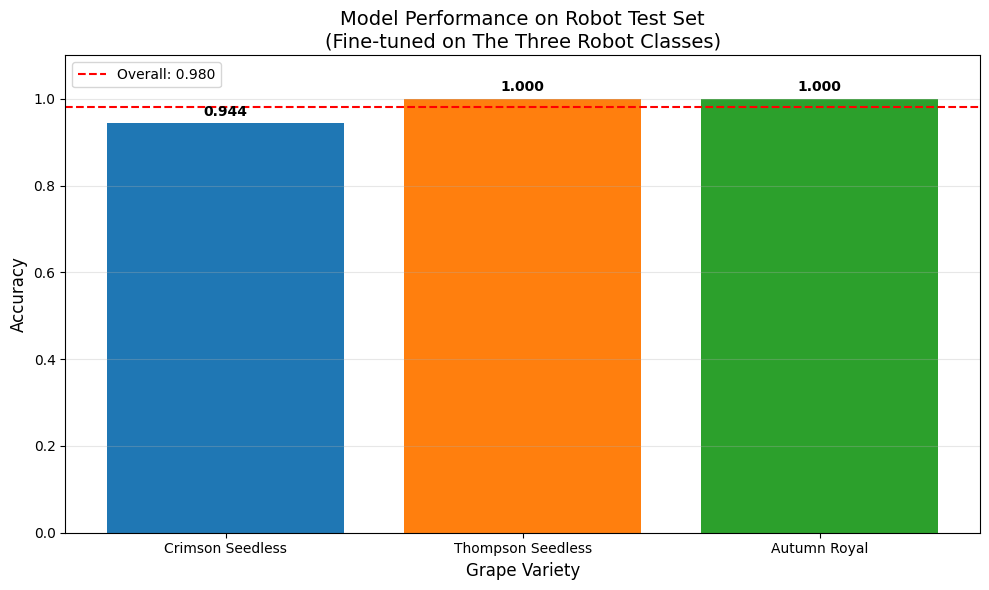

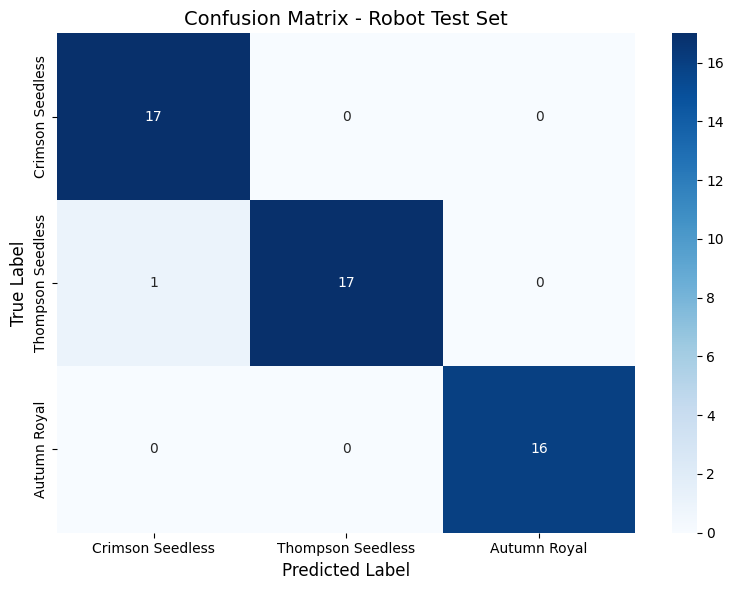


Evaluation complete!
Results saved to: /content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3/evaluation_results

Robot Test Evaluation Summary:
Overall Accuracy: 0.9804
Grape - Crimson Seedless: 0.9444
Grape - Thompson Seedless: 1.0000
Grape - Autumn Royal: 1.0000


In [ ]:
# Phase 3: Corrected Evaluation on Robot Test Set
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torch.nn import functional as F
from sklearn.metrics import classification_report, confusion_matrix
from tqdm.notebook import tqdm
from torchvision import transforms

def evaluate_finetuned_model_on_robot_test(model, robot_test_path, target_classes):
    """
    Evaluates the fine-tuned model on robot test set for the 3 selected grape classes.

    Args:
        model: The fine-tuned model (trained on all classes from merged dataset)
        robot_test_path (str): Path to robot test dataset
        target_classes (list): List of the 3 selected grape classes

    Returns:
        dict: Evaluation metrics and results
    """
    print("\n" + "=" * 70)
    print("EVALUATING FINE-TUNED MODEL ON ROBOT TEST SET")
    print("(Model trained on the 3 selected classes, tested on the same classes)")
    print("=" * 70)

    # Ensure model is in evaluation mode
    model.model.eval()

    # Use validation transforms (no augmentation for testing)
    test_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    # Print model classes for debugging
    print("\nModel was trained on these classes:")
    for i, class_name in enumerate(model.class_names):
        print(f"  {i+1}: {class_name}")

    # NO MAPPING NEEDED - the class names match exactly!
    # The robot test folders use the same naming convention as the model

    # Initialize result containers
    class_correct = {cls: 0 for cls in target_classes}
    class_total = {cls: 0 for cls in target_classes}
    all_preds = []
    all_labels = []
    all_probs = []
    confusion_data = []

    # Create reverse mapping for predictions
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}

    # Process each target class
    for class_name in target_classes:
        # Check if class exists in model (should be exact match now)
        if class_name not in model.class_to_idx:
            print(f"Warning: {class_name} not found in model classes!")
            print(f"Available classes: {list(model.class_to_idx.keys())}")
            continue

        model_class_idx = model.class_to_idx[class_name]
        print(f"\nProcessing {class_name} (idx: {model_class_idx})")

        # Check if test directory exists
        class_test_path = os.path.join(robot_test_path, class_name)
        if not os.path.exists(class_test_path):
            print(f"Warning: Test directory not found: {class_test_path}")
            continue

        # Get all test images
        image_files = [f for f in os.listdir(class_test_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if not image_files:
            print(f"No images found for {class_name}")
            continue

        print(f"Found {len(image_files)} test images")

        # Process each image
        for img_file in tqdm(image_files, desc=f"Testing {class_name}"):
            img_path = os.path.join(class_test_path, img_file)

            try:
                # Load and preprocess image
                img = Image.open(img_path).convert('RGB')
                img_tensor = test_transforms(img).unsqueeze(0).to(model.device)

                # Run inference
                with torch.no_grad():
                    outputs = model.model(img_tensor)
                    probabilities = F.softmax(outputs, dim=1)[0]
                    _, predicted = torch.max(outputs, 1)

                # Get prediction details
                pred_idx = predicted.item()
                pred_class = idx_to_class.get(pred_idx, f"Unknown-{pred_idx}")
                true_label = model_class_idx

                # Update metrics
                all_preds.append(pred_idx)
                all_labels.append(true_label)
                all_probs.append(probabilities.cpu().numpy())

                # Track per-class accuracy
                is_correct = (pred_idx == true_label)
                class_total[class_name] += 1
                if is_correct:
                    class_correct[class_name] += 1

                # Store detailed results for analysis
                confusion_data.append({
                    'file': img_file,
                    'true_class': class_name,
                    'pred_class': pred_class,
                    'correct': is_correct,
                    'confidence': float(probabilities[pred_idx])
                })

            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                continue

    # Calculate overall metrics
    overall_correct = sum(class_correct.values())
    overall_total = sum(class_total.values())
    overall_accuracy = overall_correct / overall_total if overall_total > 0 else 0

    # Generate classification report (only if we have predictions)
    report = {}
    if all_labels and len(set(all_labels)) > 1:
        try:
            report = classification_report(all_labels, all_preds, output_dict=True)
        except Exception as e:
            print(f"Error generating classification report: {e}")

    # Generate confusion matrix
    cm = None
    if all_labels and all_preds and len(set(all_labels)) > 1:
        try:
            cm = confusion_matrix(all_labels, all_preds)
        except Exception as e:
            print(f"Error generating confusion matrix: {e}")

    # Print results
    print("\n" + "=" * 70)
    print("EVALUATION RESULTS")
    print("=" * 70)
    print(f"\nOverall Accuracy: {overall_accuracy:.4f} ({overall_correct}/{overall_total})")

    print("\nPer-Class Results:")
    for cls in target_classes:
        if class_total[cls] > 0:
            accuracy = class_correct[cls] / class_total[cls]
            print(f"  {cls}: {accuracy:.4f} ({class_correct[cls]}/{class_total[cls]})")
        else:
            print(f"  {cls}: No test images found")

    # Show misclassifications
    misclassifications = [item for item in confusion_data if not item['correct']]
    misclassifications.sort(key=lambda x: x['confidence'], reverse=True)

    if misclassifications:
        print(f"\nMisclassifications: {len(misclassifications)} total")
        print("Top 5 most confident errors:")
        for i, item in enumerate(misclassifications[:5]):
            print(f"  {i+1}. {item['file']}: {item['true_class']} → {item['pred_class']} (conf: {item['confidence']:.3f})")
    else:
        print("\nNo misclassifications found!")

    return {
        'accuracy': overall_accuracy,
        'class_accuracy': {cls: class_correct[cls]/class_total[cls] if class_total[cls] > 0 else 0
                          for cls in target_classes},
        'classification_report': report,
        'confusion_matrix': cm,
        'misclassifications': misclassifications,
        'total_images': overall_total
    }

def visualize_robot_evaluation_results(results, target_classes, save_path):
    """Create visualizations for the robot test evaluation results"""
    os.makedirs(save_path, exist_ok=True)

    # 1. Per-class accuracy bar chart
    plt.figure(figsize=(10, 6))

    class_names = [cls.split(' - ')[1] for cls in target_classes]
    accuracies = [results['class_accuracy'][cls] for cls in target_classes]

    bars = plt.bar(class_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # Add overall accuracy line
    plt.axhline(y=results['accuracy'], color='red', linestyle='--',
               label=f'Overall: {results["accuracy"]:.3f}')

    plt.title('Model Performance on Robot Test Set\n(Fine-tuned on The Three Robot Classes)', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Grape Variety', fontsize=12)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(save_path, "robot_test_accuracy.png"), dpi=300, bbox_inches='tight')
    plt.show()

    # 2. Confusion matrix (if available)
    if results['confusion_matrix'] is not None:
        plt.figure(figsize=(8, 6))
        cm = results['confusion_matrix']

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)

        plt.title('Confusion Matrix - Robot Test Set', fontsize=14)
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()

        plt.savefig(os.path.join(save_path, "robot_test_confusion_matrix.png"), dpi=300, bbox_inches='tight')
        plt.show()

# Main execution function
def run_robot_test_evaluation():
    """Main function to evaluate the fine-tuned model on robot test set"""
    # Define paths
    PHASE_FOLDER = "/content/drive/MyDrive/COMP8430 - Advanced Computer Vision and Action/Major Project/Phase 3"
    ROBOT_TEST_PATH = os.path.join(PHASE_FOLDER, "robot_test")
    SAVE_PATH = os.path.join(PHASE_FOLDER, "evaluation_results")

    # Define target classes (exact match with model class names)
    target_classes = [
        "Grape - Crimson Seedless",
        "Grape - Thompson Seedless",
        "Grape - Autumn Royal"
    ]

    # Load the fine-tuned model (trained on the 3 robot classes)

    # Loading checkpoint
    model_filename = os.listdir(os.path.join(PHASE_FOLDER, "models"))[0]
    checkpoint_path = os.path.join(PHASE_FOLDER, f"models/{model_filename}")

    map_location = torch.device("cuda" if torch.cuda.is_available else 'cpu')
    checkpoint = torch.load(checkpoint_path, map_location=map_location)

    # Re-instantiating model
    model = EfficientNetB0GroupFineTuner(
        num_classes=len(target_classes),
        dataset_path=None, # Not needed for inference
        device=map_location
    )

    # Loading the weights
    model.model.load_state_dict(checkpoint['model_state_dict'])

    # Re-attaching a few of the other saved attributes
    if 'class_to_idx' in checkpoint:
        model.class_to_idx = checkpoint['class_to_idx']
    if 'class_names' in checkpoint:
        model.class_names = checkpoint['class_names']


    print("Evaluating fine-tuned model on robot test set...")
    print("This represents the baseline accuracy after being fine-tuned on robot data.")

    # Run evaluation
    results = evaluate_finetuned_model_on_robot_test(model, ROBOT_TEST_PATH, target_classes)

    # Create visualizations
    visualize_robot_evaluation_results(results, target_classes, SAVE_PATH)

    print("\nEvaluation complete!")
    print(f"Results saved to: {SAVE_PATH}")

    return results

# Execute the evaluation
if __name__ == "__main__":
    robot_evaluation_results = run_robot_test_evaluation()

    print(f"\nRobot Test Evaluation Summary:")
    print(f"Overall Accuracy: {robot_evaluation_results['accuracy']:.4f}")
    for cls in ["Grape - Crimson Seedless", "Grape - Thompson Seedless", "Grape - Autumn Royal"]:
        if cls in robot_evaluation_results['class_accuracy']:
            print(f"{cls}: {robot_evaluation_results['class_accuracy'][cls]:.4f}")

## **6. Summary of Observations and Future Directions**

The comparative analysis between the model fine-tuned on the full set of classes and the model fine-tuned specifically on the three selected grape classes: Crimson Seedless, Thompson Seedless, and Autumn Royal, yields several important insights regarding model performance, generalisation, and the challenges of fine-grained classification in real-world settings.

First and most notably, **targeted fine-tuning on the three classes resulted in a substantial performance improvement**. The overall test accuracy increased from **50.98% (26/51)** for the model fine-tuned on all classes to **98.04% (50/51)** for the model fine-tuned on the specific three classes—a remarkable **92.31% improvement**. This outcome reinforces the hypothesis that, in fine-grained scenarios with high intra-class similarity, focused domain adaptation can significantly enhance model robustness and accuracy on real-world test data.

Secondly, the experiments with different augmentation strategies consistently demonstrated that **the model performed best when no additional augmentations were applied**. While augmentation is a common technique for enhancing generalisation, in this specific context—where the robot-captured images already introduce inherent variations in lighting, angles, and perspectives—further augmentation appeared to introduce unnecessary noise, potentially degrading performance. This finding highlights the importance of **carefully aligning augmentation strategies with the characteristics of the target deployment domain**.

Thirdly, the fine-tuning strategy comparison revealed that **partially unfreezing the EfficientNet-B0 model—by selectively training the last few layers while keeping the early layers frozen—offered the best balance between accuracy and computational efficiency**. This approach achieved superior results compared to both fully frozen models (where only the classifier is trained) and fully unfrozen models (which risk overfitting on small datasets). The success of partial fine-tuning aligns with best practices in transfer learning, particularly for tasks involving limited domain-specific data.

In summary, these results underscore several key takeaways for future work:
- **Targeted fine-tuning on a small set of domain-relevant classes can dramatically improve performance**, but it may limit the model's generalisability to new or unseen classes.
- **Augmentation strategies must be tailored to the deployment context**; indiscriminate augmentation may not always yield benefits, especially when natural data variability is already present.
- **Partial fine-tuning remains a practical and effective approach for balancing model adaptability and training efficiency** in resource-constrained environments.

Future research should explore **hybrid fine-tuning approaches** that combine the benefits of targeted adaptation with broader generalisation, potentially through techniques such as **multi-task learning** or **continual learning frameworks**. Additionally, further analysis of failure cases such as the persistent confusion between visually similar classes can inform the development of more robust models for fine-grained, real-world classification tasks.


**THANK YOU FOR SPENDING TIME READING AND MARKING OUR GROUP WORK!!**